<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; "> P9 - Analyse des ventes pour Lapage </h1></div>

<u>**Remarque :**</u>  
Pour des raisons de lisibilité des parties ont été masquées.
Elles peuvent être démasquées directement sur le Notebook .ipynb

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Import des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Désactivation des Warnings déjà lus si nécessaire</h3>
</div>

##### <u>*DESACTIVATIONS DE WARNINGS déjà lu pour LISISBILITE :*</u>

Source :
https://saturncloud.io/blog/how-to-disable-warnings-in-jupyter-notebook/

https://docs.python.org/fr/3/library/warnings.html

default => Show all warnings (even those ignored by default)
ignore => Ignore all warnings
error => Convert all warnings to errors
error::ResourceWarning => Treat ResourceWarning messages as errors
default::DeprecationWarnig => Show DeprecationWarning messages
ignore,default:::mymodule => Only report warnings triggered by "mymodule"
error:::mymodule => Convert warnings to errors in "mymodule"

In [1]:
# import warnings

In [2]:
# Suppress all warnings

#warnings.filterwarnings('ignore')

In [3]:
# Restore the warning behaviour to default : Show all warnings (even those ignored by default)

#warnings.filterwarnings('ignore')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Import des librairies</h3>
</div>

In [4]:
#Import de la librairie expression régulières
import re

In [5]:
#Import de la librairie Numpy
import numpy as np

In [6]:
#Import de la librairie Pandas
import pandas as pd

In [7]:
#Import de scipy.stats
import scipy.stats as st

##### **Pour les Graphiques :**

In [8]:
#Import de la librairie matplotlib.pyplot
import matplotlib.pyplot as plt

In [9]:
#Import de seaborn 
import seaborn as sns

In [10]:
#IMPORT
import matplotlib.dates as mdates


In [11]:
sns.set_theme(style='dark', palette='muted')
#plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'firebrick','axes.titlecolor':'firebrick','figure.titlesize':16})
plt.rcParams.update({'axes.labelcolor':'navy','axes.titlecolor':'navy'})

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Import de Fonctions personnelles </h3>
</div>

### FONCTION PERSONNELLE D'ANALYSE DE FICHIERS :

In [12]:
# FONCTION PERSONNELLE D'ANALYSE DE FICHIERS :

def Description_Fichier_Tableau_avc_ValBlanches(Data):
    """
    fonction permettant d'analyser un Dataframe DF.
    Elle prend en entrée le dataframe DF.
    Elle nécessite d'avoir chargé la librairie des expressions regulières : import re
    Et renvoie en sortie un dataframe DF2 avec pour chacune des colonnes de DF, les informations suivantes :
    'Type': type de la colonne
    'Nb lignes' : nbre de lignes total de la colonne
    'Valeurs non-vides' : nbre de valeurs non-vides dans la colonne au sens de la fonction pandas.Series.notna()
    'Valeurs vides' : nbre de valeurs vides dans la colonne au sens de la fonction pandas.Series.isna()
    'Valeurs distinctes' : nbre de valeurs vides dans la colonne au sens de la fonction pandas.Series.unique()
    'Valeurs blanches' : nbre de valeurs blanches dans la colonne au sens de le regular expression r"\A[\s]*$"
    c'est à dire au sens de uniquement une nombres quelconque de caractères blancs y compris aucun ''

    """

    
    re2 = r"\A[\s]*$"
    FICHIER = pd.DataFrame(Data)
    #création d'un DataFrame qui va contenir les colonnes du Fichier en Index, 
    #et la description des lignes dans les colonnes
    Tab_Descriptif = pd.DataFrame(index = FICHIER.columns, 
                                  columns=['Type','Nb lignes',
                                           'Valeurs non-vides','Valeurs vides',
                                           'Valeurs distinctes','Valeurs blanches'])

    #remplissage des lignes
    for elt in FICHIER.columns :
        col_string = (FICHIER[elt]).astype('string')
        Tab_Descriptif.loc[elt,:] = [FICHIER[elt].dtypes, len(FICHIER[elt]) , 
                                     FICHIER[elt].notna().sum() ,FICHIER[elt].isna().sum(),
                                     len(FICHIER[elt].unique()),col_string.str.match(re2).sum() ]

    #print(Tab_Descriptif)
    return Tab_Descriptif
    

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\matth\AppData\Local\Temp\ipykernel_9252\2493595125.py:4: SyntaxWarning: invalid escape sequence '\A'
  """


L'alerte ne vaut que pour le texte de la description de fonction!

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - IMPORT DU FICHIER PREPARE POUR L'ANALYSE DES PROFILS CLIENTS </h3>
</div>

In [13]:
#Importation du fichier customers.csv
df_analyse_O1_O2_BtC = pd.read_csv("df_analyse_O1_O2_BtC.csv")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - ANALYSE DES COMPORTEMENTS CLIENTS </h2>
</div>

objectif : mieux comprendre le comportement de nos clients en ligne

##### <u>**5 corrélations pour étudier le profil de nos clients :**</u>  
-	le lien entre le genre d’un client et les catégories des livres acheté,  
-	le lien entre l'âge des clients et le montant total des achats,  
-	le lien entre l'âge des clients et la fréquence d’achat,  
-	le lien entre l'âge des clients et la taille du panier moyen,  
-	le lien entre l'âge des clients et la catégorie des livres achtés.  


<u>Remarque : Source utile pours la réalisation des tests statistique :</u>  
 le tableau récapitulatif d’XLSTA :  
https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use 



##### **IMPORTS POUR LE TRAVAIL STATISTIQUE :**

In [14]:
from scipy.stats import norm

In [15]:
from scipy.stats import shapiro

In [16]:
from scipy.stats import spearmanr

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.0 - Travaillons sur un fichier BtC avec uniquement les clients ayant acheté au moins une fois :</h3>
</div>

Ca n'a pas de sens d'étudier les catégories de livres achetés ou le montant total ou la fréquence ou la taille du panier pour des clients qui n'ont jamais acheté.  
Je vais donc utiliser le fichier df_analyse_O1_O2_transactions_1_1 des transactions (qui inclut les clients ayant achetés; et les produits ayant été achetés).

In [17]:
df_analyse_O1_O2_BtC.head(2)

transaction_id session_id                        date         day client_id  \
0         t_1818      s_908  2021-03-02 21:57:33.862118  2021-03-02    c_1004   
1       t_334688   s_167174  2022-02-18 16:40:10.068303  2022-02-18    c_1011   

  sex  birth id_prod  price  categ  age  
0   m   1973     0_0   3.75      0   49  
1   f   1999     0_0   3.75      0   23

In [18]:
df_analyse_O1_O2_BtC.dtypes

transaction_id     object
session_id         object
date               object
day                object
client_id          object
sex                object
birth               int64
id_prod            object
price             float64
categ               int64
age                 int64
dtype: object

In [19]:
#Retypons les colonnes comme à la sortie du fichier :
df_analyse_O1_O2_BtC = df_analyse_O1_O2_BtC.astype({'transaction_id' : 'string',
                                                    'session_id' : 'string', 
                                                    'date': 'datetime64[ns]', 
                                                    'day': 'datetime64[ns]', 
                                                    'client_id': 'string', 
                                                    'sex': 'string',
                                                    'birth': 'Int64', 
                                                    'id_prod': 'string',
                                                    'price': 'float64',
                                                    'categ': 'string',
                                                    'age': 'Int64'
                                                   })

In [20]:
Description_Fichier_Tableau_avc_ValBlanches(df_analyse_O1_O2_BtC)

Type Nb lignes Valeurs non-vides Valeurs vides  \
transaction_id  string[python]    640734            640734             0   
session_id      string[python]    640734            640734             0   
date            datetime64[ns]    640734            640734             0   
day             datetime64[ns]    640734            640734             0   
client_id       string[python]    640734            640734             0   
sex             string[python]    640734            640734             0   
birth                    Int64    640734            640734             0   
id_prod         string[python]    640734            640734             0   
price                  float64    640734            640734             0   
categ           string[python]    640734            640734             0   
age                      Int64    640734            640734             0   

               Valeurs distinctes Valeurs blanches  
transaction_id             640734                0  
session_id                 322466                0  
date                       640615                0  
day                           730                0  
client_id                    8596                0  
sex                             2                0  
birth                          76                0  
id_prod                      3262                0  
price                        1440                0  
categ                           3                0  
age                            76                0

In [21]:
df_analyse_O1_O2_BtC.shape

(640734, 11)

In [22]:
df_analyse_O1_O2_BtC.dtypes

transaction_id    string[python]
session_id        string[python]
date              datetime64[ns]
day               datetime64[ns]
client_id         string[python]
sex               string[python]
birth                      Int64
id_prod           string[python]
price                    float64
categ             string[python]
age                        Int64
dtype: object

In [23]:
df_analyse_O1_O2_BtC.columns

Index(['transaction_id', 'session_id', 'date', 'day', 'client_id', 'sex',
       'birth', 'id_prod', 'price', 'categ', 'age'],
      dtype='object')

In [24]:
#df_analyse_O1_O2_BtC.to_csv("df_analyse_O1_O2_BtC.csv",index=False)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.1 - Corrélation Genre / catégories des livres achetés (2 VAR QUAL) :</h3>
</div>

##### <u>**ANALYSE DU TYPE DE VARIABLES :**</u>

In [25]:
df_analyse_O1_O2_BtC['sex'].unique()

<StringArray>
['m', 'f']
Length: 2, dtype: string

In [26]:
df_analyse_O1_O2_BtC['categ'].unique()

<StringArray>
['0', '1', '2']
Length: 3, dtype: string

<u>ANALYSE DU TYPE DE VARIABLES :</u>  
2 variables QUALITATIVES (2*3 catégories ):  
- 'sex' : 'm','f'
- 'categ' : 0, 1, 2

##### <u>**NIVEAU DE L'ANALYSE :**</u>    
Une même personne va acheter des livres de différentes catagories dans différentes proportions.  
Je ne peux donc pas regarder LA catégorie de livre acheté par client.  
Je vais donc plutôt me placer à un niveau(granularité) de la transaction.  
Et donc je ne vais pas faire de regroupement préalable.

In [27]:
Ordre_categ = df_analyse_O1_O2_BtC['categ'].unique()

# Générer une palette 'muted' avec autant de couleurs que de catégories
couleurs_muted_categ = sns.color_palette("muted", len(Ordre_categ))

# Associer chaque produit à une couleur fixe dans un dictionnaire
palette_fixe_categ = dict(zip(Ordre_categ, couleurs_muted_categ))

In [28]:
#Ordre_genre = np.sort(df_analyse_O1_O2_transactions_1_1['sex'].unique())
Ordre_genre = ['m','f']


# Générer une palette 'muted' avec autant de couleurs que de catégories
couleurs_muted_genre = sns.color_palette("muted", len(Ordre_genre))

# Associer chaque produit à une couleur fixe dans un dictionnaire
palette_fixe_genre = dict(zip(Ordre_genre, couleurs_muted_genre))

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.1.1 - Etude des distributions Genre et Catégories :</h4>
</div>

##### **Genre**

##### TEST:

<Axes: xlabel='sex', ylabel='Count'>

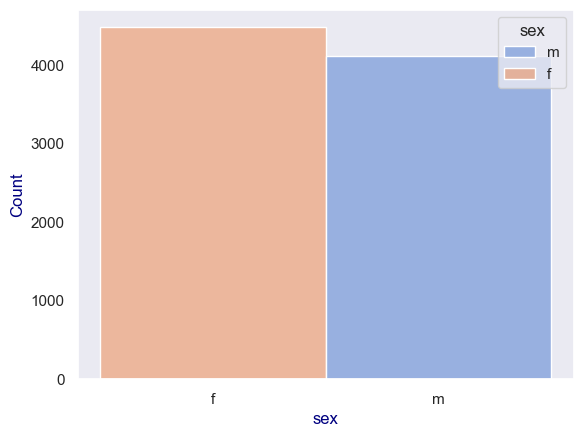

In [29]:
#histogramme des genres des clients ayant acheté
df_graph = (df_analyse_O1_O2_BtC.groupby(by=['sex'])
                              .agg(
                                   nb_clients = pd.NamedAgg(column='client_id',aggfunc='nunique')
                                  )
                              .reset_index()
                             )

sns.histplot(data=df_graph.sort_values('sex'),x='sex',weights='nb_clients', hue='sex',palette=palette_fixe_genre,hue_order=Ordre_genre)

##### FIN TEST:

In [30]:
df_graph = (df_analyse_O1_O2_BtC.groupby(by=['client_id','sex'])
                              .agg(
                                   nb_transactions = pd.NamedAgg(column='transaction_id',aggfunc='nunique')
                                  )
                              .reset_index()
                             )

df_graph.head()

client_id sex  nb_transactions
0       c_1   m               43
1      c_10   m               58
2     c_100   m                8
3    c_1000   f              126
4    c_1001   m              103

In [31]:
df_graph.shape

(8596, 3)

**Pour rappel : Histogramme des densité de genre parmis les clients**

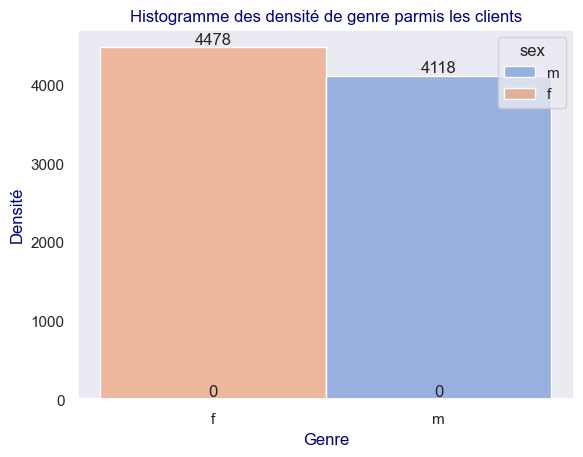

In [32]:
#POur RAPPEL
#histogramme des densité de genre parmis les clients
df_graph = (df_analyse_O1_O2_BtC.groupby(by=['client_id','sex'])
                              .agg(nb_transactions = pd.NamedAgg(column='transaction_id',aggfunc='nunique'))
                              .reset_index()
                             )

ax = sns.histplot(data=df_graph.sort_values('sex'),x='sex', hue='sex',palette=palette_fixe_genre,hue_order=Ordre_genre)

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title("Histogramme des densité de genre parmis les clients")
plt.ylabel("Densité")
plt.xlabel("Genre")
plt.show()

In [33]:
df_analyse_O1_O2_BtC.head(2)

transaction_id session_id                       date        day client_id  \
0         t_1818      s_908 2021-03-02 21:57:33.862118 2021-03-02    c_1004   
1       t_334688   s_167174 2022-02-18 16:40:10.068303 2022-02-18    c_1011   

  sex  birth id_prod  price categ  age  
0   m   1973     0_0   3.75     0   49  
1   f   1999     0_0   3.75     0   23

In [34]:
df_analyse_O1_O2_BtC.shape

(640734, 11)

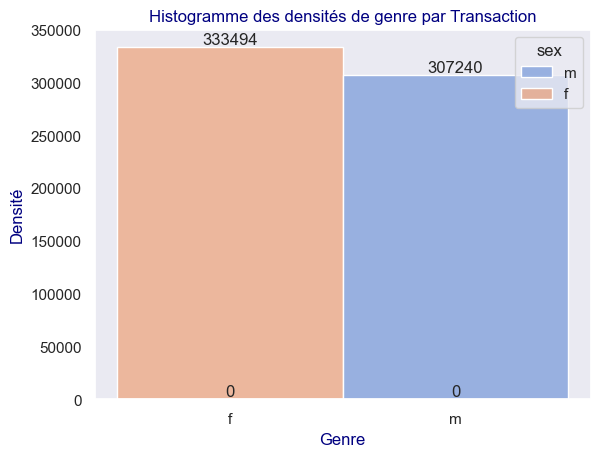

In [35]:
#histogramme des densité de genre par Transaction

ax = sns.histplot(data=df_analyse_O1_O2_BtC.sort_values('sex'),x='sex', hue='sex',palette=palette_fixe_genre,hue_order=Ordre_genre)

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title("Histogramme des densités de genre par Transaction")
plt.ylabel("Densité")
plt.xlabel("Genre")
plt.show()

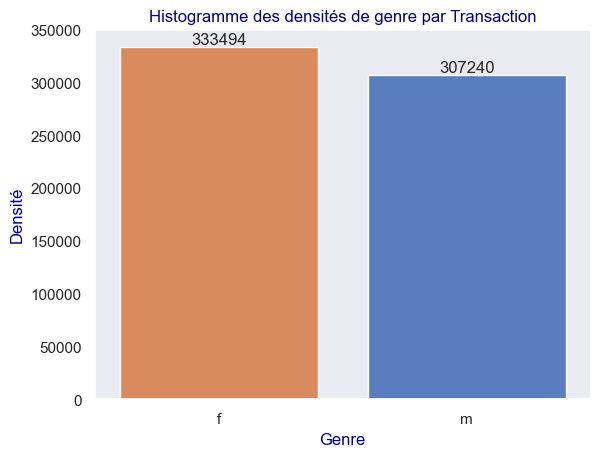

In [36]:
#histogramme des densité de genre par Transaction

df_graph = (df_analyse_O1_O2_BtC.groupby(by=['sex'])
                              .agg(nb_transactions = pd.NamedAgg(column='transaction_id',aggfunc='nunique'))
                              .reset_index()
                             )

ax = sns.barplot(data=df_graph,
                 x='sex',
                 y='nb_transactions',
                 hue='sex',
                 palette=palette_fixe_genre,hue_order=Ordre_genre)

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title("Histogramme des densités de genre par Transaction")
plt.ylabel("Densité")
plt.xlabel("Genre")
plt.show()

##### **Catégorie**

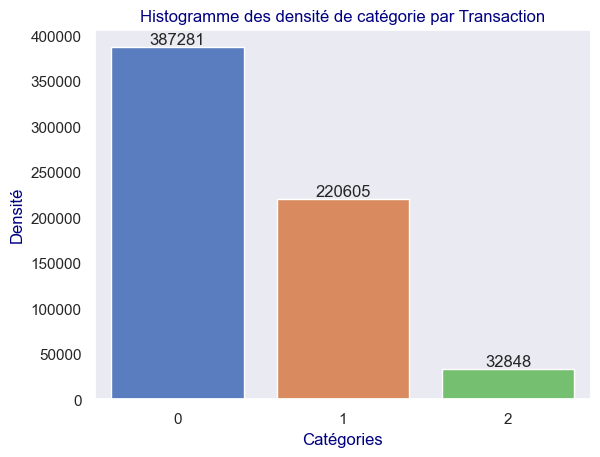

In [37]:
#histogramme de la densité des catégories dans les transactions

df_graph = (df_analyse_O1_O2_BtC.groupby(by=['categ'])
                              .agg(nb_transactions = pd.NamedAgg(column='transaction_id',aggfunc='nunique'))
                              .reset_index()
                             )

ax = sns.barplot(data=df_graph,
                 x='categ',
                 y='nb_transactions',
                 hue='categ',
                 palette=palette_fixe_categ,
                 hue_order=Ordre_categ)

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title("Histogramme des densité de catégorie par Transaction")
plt.ylabel("Densité")
plt.xlabel("Catégories")
plt.show()

**VISUALISATION BIVARIEE**

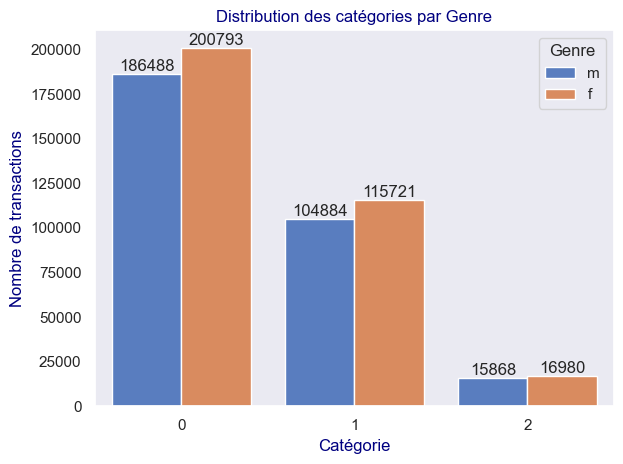

In [38]:
ax = sns.countplot(data=df_analyse_O1_O2_BtC, 
              x='categ', 
              hue='sex',
              palette = palette_fixe_genre,
              hue_order= Ordre_genre
             )

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title('Distribution des catégories par Genre')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=0)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

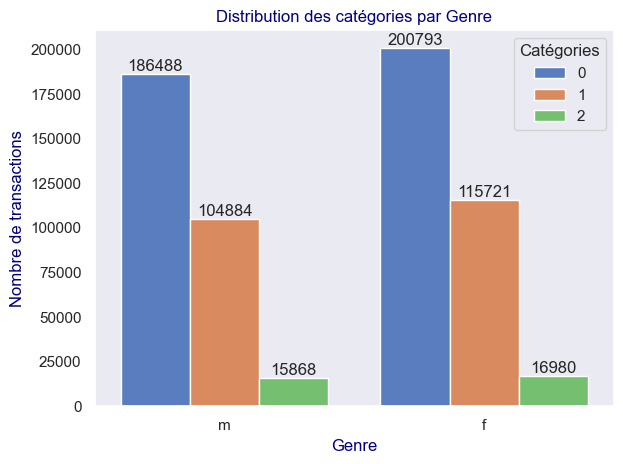

In [39]:
ax = sns.countplot(data=df_analyse_O1_O2_BtC, 
              x='sex', 
              hue='categ',
              palette = palette_fixe_categ,
              hue_order= Ordre_categ
             )

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title('Distribution des catégories par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=0)
plt.legend(title='Catégories')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.1.2 - Création du Tableau de Contingence :</h4>
</div>

##### **CREATION D'UNE TABLE DE CONTINGENCE A MA FACON :**

In [40]:
df_categ_par_genre = pd.pivot_table(data=df_analyse_O1_O2_BtC[['sex','categ']],
                                          index=['sex'],
                                          columns=['categ'],
                                          aggfunc=len)
df_categ_par_genre

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868

##### **FIN CREATION D'UNE TABLE DE CONTINGENCE A MA FACON :**

In [41]:
# Créer le tableau de contingence
contingency_table_categ_genre = pd.crosstab(df_analyse_O1_O2_BtC['sex'],
                                            df_analyse_O1_O2_BtC['categ'])
display(contingency_table_categ_genre)

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868

In [42]:
# Créer le tableau de contingence EN PCT par Colonne
contingency_table_categ_genre_pct_col = pd.crosstab(df_analyse_O1_O2_BtC['sex'],
                                            df_analyse_O1_O2_BtC['categ'],
                                                   normalize='columns')
display(contingency_table_categ_genre_pct_col)

categ         0         1         2
sex                                
f      0.518469  0.524562  0.516926
m      0.481531  0.475438  0.483074

In [43]:
# Créer le tableau de contingence EN PCT par ligne
contingency_table_categ_genre_pct_raw = pd.crosstab(df_analyse_O1_O2_BtC['sex'],
                                                    df_analyse_O1_O2_BtC['categ'],
                                                   normalize='index')
display(contingency_table_categ_genre_pct_raw)

categ         0         1         2
sex                                
f      0.602089  0.346996  0.050915
m      0.606978  0.341375  0.051647

In [44]:
# Créer le tableau de contingence EN PCT du total
contingency_table_categ_genre_pct_all = pd.crosstab(df_analyse_O1_O2_BtC['sex'],
                                                    df_analyse_O1_O2_BtC['categ'],
                                                    normalize='all')
display(contingency_table_categ_genre_pct_all)

categ         0         1         2
sex                                
f      0.313380  0.180607  0.026501
m      0.291054  0.163694  0.024765

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.1.3 - Visualisation du Tableau de Contingence :</h4>
</div>

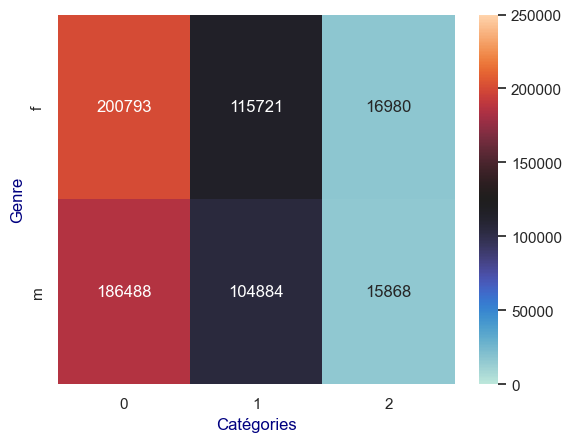

In [45]:
#HEATMAP de la fréquence des catégories par Genre des transactions (en effectifs)
sns.heatmap(contingency_table_categ_genre,annot=True,fmt='.0f',center=125_000,vmin=0,vmax=250_000)
plt.xlabel('Catégories')
plt.ylabel('Genre')
plt.show()

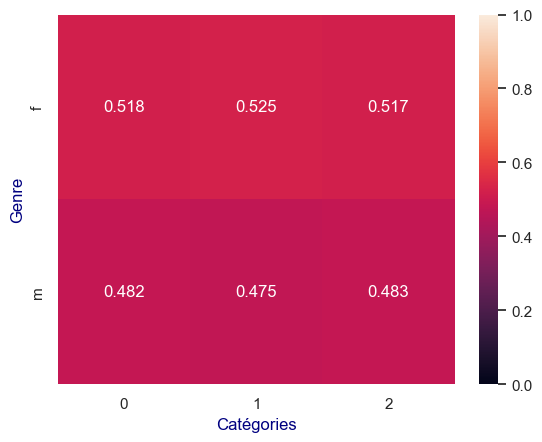

In [46]:
#HEATMAP de la fréquence des catégories par Genre des transactions (en fréquence de la catégorie)
sns.heatmap(contingency_table_categ_genre_pct_col,annot=True,fmt='.3f',vmin=0,vmax=1)
plt.xlabel('Catégories')
plt.ylabel('Genre')
plt.show()

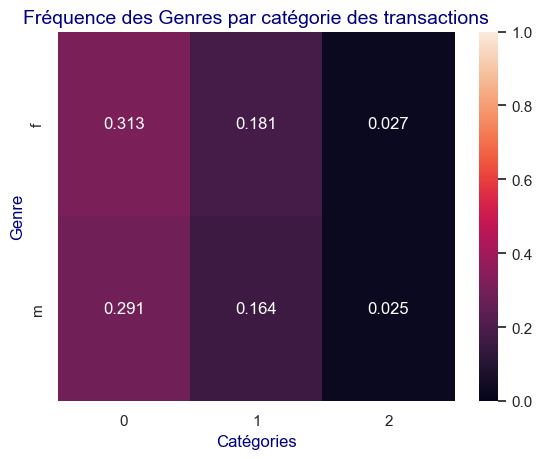

In [47]:
#HEATMAP de la fréquence des catégories par Genre des transactions (en fréquence du total)
sns.heatmap(contingency_table_categ_genre_pct_all,annot=True,fmt='.3f',vmin=0,vmax=1)
plt.xlabel('Catégories')
plt.ylabel('Genre')
plt.title("Fréquence des Genres par catégorie des transactions",fontdict={'fontsize' : 14, 'color':'navy'})
plt.show()

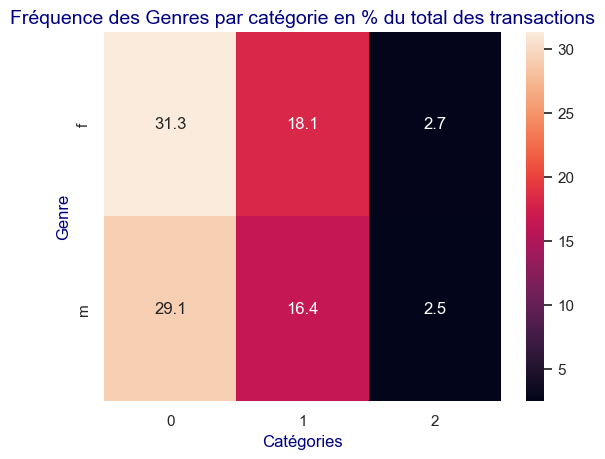

In [48]:
#HEATMAP de la fréquence des catégories par Genre des transactions (en fréquence du total) en %
sns.heatmap(contingency_table_categ_genre_pct_all*100,annot=True,fmt='.1f')
plt.xlabel('Catégories')
plt.ylabel('Genre')
plt.title("Fréquence des Genres par catégorie en % du total des transactions",fontdict={'fontsize' : 14, 'color':'navy'})
plt.show()

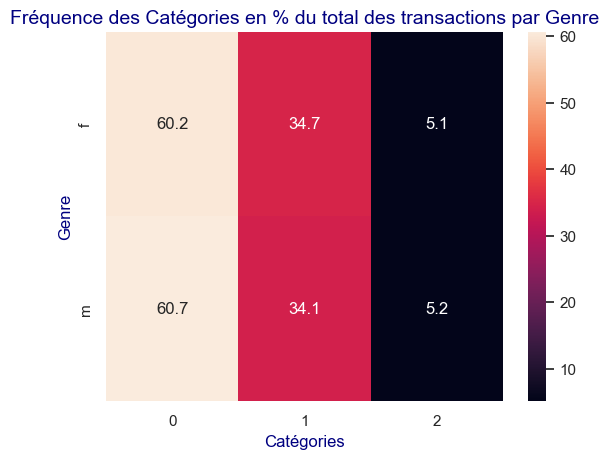

In [49]:
#HEATMAP de la fréquence des catégories par Genre des transactions en % du Genre
sns.heatmap(contingency_table_categ_genre_pct_raw*100,annot=True,fmt='.1f')
plt.xlabel('Catégories')
plt.ylabel('Genre')
plt.title("Fréquence des Catégories en % du total des transactions par Genre",fontdict={'fontsize' : 14, 'color':'navy'})
plt.show()

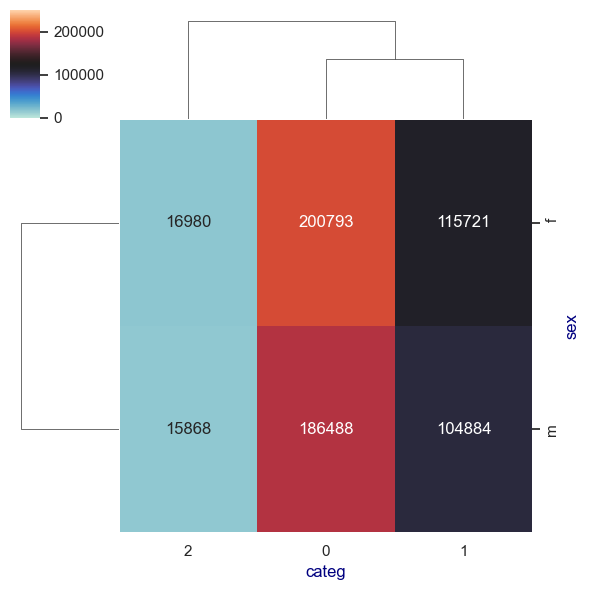

In [50]:
sns.clustermap(contingency_table_categ_genre,annot=True,fmt='.0f',center=125_000,vmin=0,vmax=250_000,figsize=(6,6))
#plt.xlabel('Catégories')
#plt.ylabel('Genre')
plt.show()

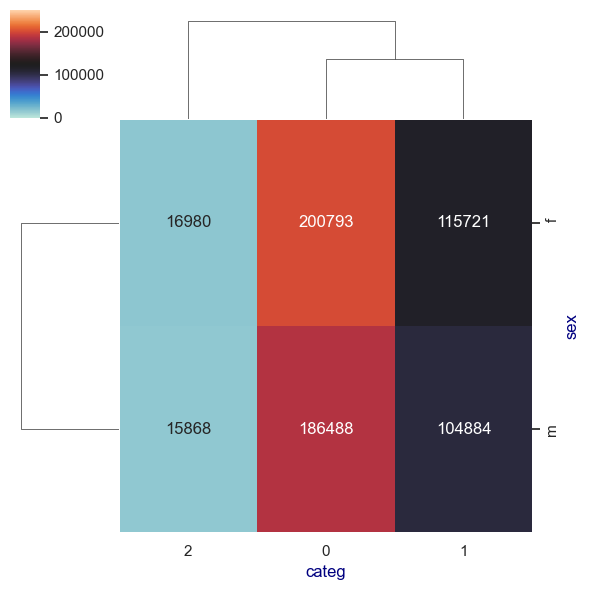

In [51]:
sns.clustermap(contingency_table_categ_genre,annot=True,fmt='.0f',center=125_000,vmin=0,vmax=250_000,figsize=(6,6))
#plt.xlabel('Catégories')
#plt.ylabel('Genre')
plt.show()

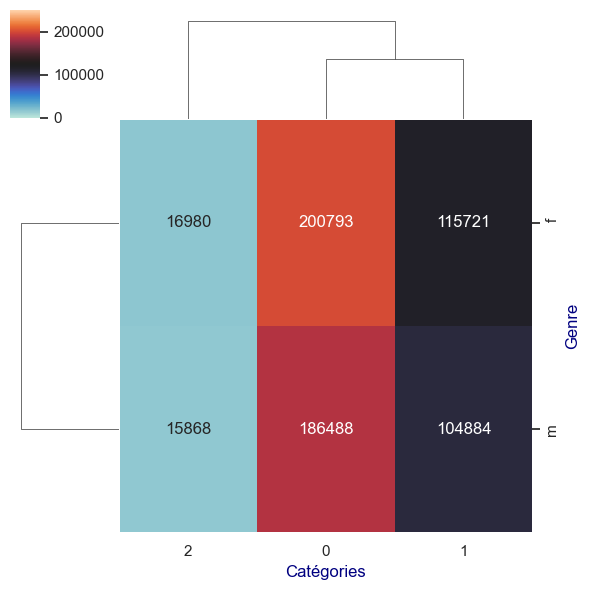

In [52]:
cg = sns.clustermap(contingency_table_categ_genre,
                    annot=True,
                    fmt='.0f',
                    center=125_000,
                    vmin=0,
                    vmax=250_000,
                    figsize=(6,6))

# Modification des labels des axes de la heatmap principale
cg.ax_heatmap.set_xlabel("Catégories")
cg.ax_heatmap.set_ylabel("Genre")

plt.show()

plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.1.4 - Effectuons le test du Chi-2 (et complément V de Cramer):</h4>
</div>

##### <font color='green'><u>**TEST du CHI-2 :**</u></font>

**RAPPEL sur le Test du Chi-2 :**
>Conditions:  
	- 2 données qual  =>OK  
	- expériences indépendantes =>OK    
	- recherche d'association (H0 pas d'association var indépendantes, H1 : association catégorielle) => OK  
	- échantillons suffisamment grands (chaque catégorie doit avoir une fréquence théorique attendue d'au moins 5). => OK (voir ci-dessous dans les Fréquences attendues)  
	(fréquences théoriques = fréquences que l'on aurait dû observer si H0 était vraie)  
	- utilisé principalement quand les données sont sous forme de tableaux de contingence (2x3, 3x3, etc.).  =>OK  
	(remarque possible en 2*2mais moins précis que Fisher dans ce cas)  

>Calcul du Chi 2 :  
mesure la somme des carrés des écarts entre les fréquences observées et les fréquences attendues, rapportée aux fréquences attendues.  

>Calcul du degré de liberté (r−1)×(c−1)  

>Calcul du Chi2 et du ddl permette dans un tableau d'estimer p  

>Vérifier p-value inf à 0,05 (H0 rejetée; H1 validé =>relation)  

ici:  
H0 : La catégorie achetée est indépendante du Genre  
H1 : La catégorie achetée dépend du Genre  

In [53]:
from scipy.stats import chi2_contingency
#import numpy as np

def verifier_validite_chi2(table_contingence):
    # Appliquer le test du Chi² pour obtenir les effectifs attendus
    chi2, p, dof, expected = chi2_contingency(table_contingence)

    print("Effectifs attendus :\n", pd.DataFrame(expected, 
                                                 index=table_contingence.index, 
                                                 columns=table_contingence.columns))
    
    # Vérification des conditions
    cellules_total = expected.size
    cellules_sous_5 = np.sum(expected < 5)
    cellule_min = np.min(expected)

    print(f"\nNombre total de cellules : {cellules_total}")
    print(f"Cellules avec effectif attendu < 5 : {cellules_sous_5}")
    print(f"Effectif attendu minimum : {cellule_min:.2f}")

    if cellule_min < 1:
        print("\n❌ Le test du Chi² n'est **pas valide** (une cellule a un effectif attendu < 1).")
    elif cellules_sous_5 / cellules_total > 0.2:
        print("\n⚠️ Le test du Chi² est **à éviter** (plus de 20% des cellules ont un effectif attendu < 5).")
    else:
        print("\n✅ Les conditions sont remplies pour utiliser le test du Chi².")


In [54]:
verifier_validite_chi2(contingency_table_categ_genre)

Effectifs attendus :
 categ              0              1             2
sex                                              
f      201574.896625  114822.131914  17096.971461
m      185706.103375  105782.868086  15751.028539

Nombre total de cellules : 6
Cellules avec effectif attendu < 5 : 0
Effectif attendu minimum : 15751.03

✅ Les conditions sont remplies pour utiliser le test du Chi².


In [55]:
#from scipy.stats import chi2_contingency

# Calculer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_categ_genre)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

Statistique Chi-2: 22.66856665178056
Valeur p: 1.1955928116587024e-05
Degrés de liberté: 2
Fréquences attendues:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


**Comment interpréter ces résultats ?**  
•	Statistique Chi-2 :  
La statistique Chi-2 de 22.67 indique la somme des écarts au carré entre les fréquences observées et attendues.  
•	Valeur p :  
**La valeur p de 1.2*10^-5 est inférieure au seuil de 0.05**, indiquant que l'hypothèse nulle H0 est peu probable et donc rejetée.  
Cette distribution ne semble pas être dûe au hasard.  
**=>Et la catégorie achetée et le Genre ne son pas indépendants.**  

##### <font color='green'><u>**LE V de CRAMER (Pour aller plus loin et identifier la force de l'association)**</u></font>

<u>Le V de Cramér (adapté aux tableaux de contingence de taille > 2×2) :</u>  

Pour quantifier l’intensité de la relation (au-delà de sa seule existence), on peu ts'appuyer sur le calcul du V de Cramer.  
>Un V de Cramér proche de 0 = relation faible  
Un V proche de 1 = relation forte

In [56]:
#import numpy as np
#from scipy.stats import chi2_contingency

# Tableau de contingence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_categ_genre)

# V de Cramér
n = np.sum(contingency_table_categ_genre.values)
phi2 = chi2_stat / n
r, k = contingency_table_categ_genre.shape
cramer_v = np.sqrt(phi2 / min(r - 1, k - 1))

print(f"V de Cramér : {cramer_v:.3f}")


V de Cramér : 0.006


**OBSERVATION :**  
•	**V de Cramér :**  
Le V de Cramer est proche de 0  
**=>Et l'association est donc faible.**

##### <font color='green'><u>**BILAN**</u></font>

In [57]:
#from scipy.stats import chi2_contingency

# Calculer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_categ_genre)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

# V de Cramér
n = np.sum(contingency_table_categ_genre.values)
phi2 = chi2_stat / n
r, k = contingency_table_categ_genre.shape
cramer_v = np.sqrt(phi2 / min(r - 1, k - 1))

print(f"V de Cramér : {cramer_v:.3f}")


Statistique Chi-2: 22.66856665178056
Valeur p: 1.1955928116587024e-05
Degrés de liberté: 2
Fréquences attendues:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]
V de Cramér : 0.006


<u>**Comment interpréter ces résultats ?**</u>  
•	**Statistique Chi-2 :**  
La statistique Chi-2 de 22.67 indique la somme des écarts au carré entre les fréquences observées et attendues.  

•	**Valeur p :**  
**La valeur p de 1.2*10^-5 est inférieure au seuil de 0.05**, indiquant que l'hypothèse nulle H0 est peu probable et donc rejetée.  
Cette distribution ne semble pas être dûe au hasard.  
**=>la catégorie achetée et le Genre ne son pas indépendants.**  

•	**V de Cramér :**  
Le V de Cramer est proche de 0  
**=>Et l'association est donc faible.**

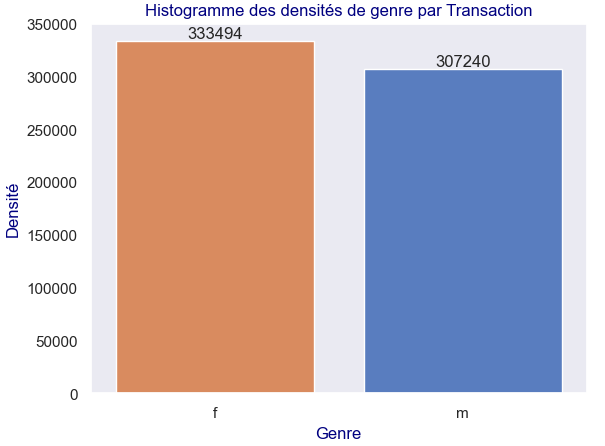

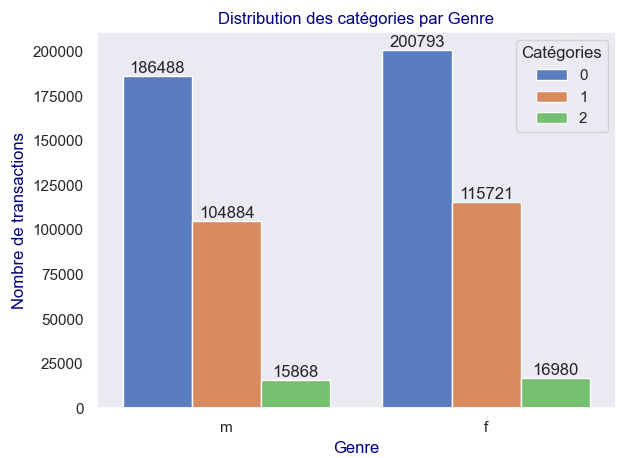

<u>**OBSERVATIONS**</u>  
En effet avec aussi peu de données, on peut regarder les tendances :  

Nb de transactions :  
f : 333_494  
m : 307_240  
f/m = 1.085  
  
categ 0 :  
f : 200793  
m :  186488  
f/m = 1.077 (au lieu de 1.085) -1 pt de %age de décalage  

categ 1 :  
f : 115721  
m : 104884  
f/m = 1.103 (au lieu de 1.085) +2 pt de %age de décalage  

categ 2 :  
f : 16980  
m :  15868  
f/m = 1.070 (au lieu de 1.085) -1.5 pt de %age de décalage  


In [58]:
df_graph = (df_analyse_O1_O2_BtC.groupby(by=['sex'])
                              .agg(nb_transactions = pd.NamedAgg(column='transaction_id',aggfunc='nunique'))
#                              .reset_index()
                             )
df_graph

nb_transactions
sex                 
f             333494
m             307240

In [59]:
contingency_table_categ_genre

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868

In [60]:
print(f"Nb de Transactions :")
print("-------------------")
print(f" f : {df_graph['nb_transactions']['f']} ")
print(f" m : {df_graph['nb_transactions']['m']} ")
print(f" f/m= : {round((df_graph['nb_transactions']['f'])/(df_graph['nb_transactions']['m']),3)} ")
print()

for cat in contingency_table_categ_genre.columns :
    print(f" categorie {cat} :")
    print("-------------------")
    print(f" f : {contingency_table_categ_genre[cat]['f']} ")
    print(f" m : {contingency_table_categ_genre[cat]['m']} ")
    print(f" f/m= : {round((contingency_table_categ_genre[cat]['f'])/(contingency_table_categ_genre[cat]['m']),3)} ")
    print()

Nb de Transactions :
-------------------
 f : 333494 
 m : 307240 
 f/m= : 1.085 

 categorie 0 :
-------------------
 f : 200793 
 m : 186488 
 f/m= : 1.077 

 categorie 1 :
-------------------
 f : 115721 
 m : 104884 
 f/m= : 1.103 

 categorie 2 :
-------------------
 f : 16980 
 m : 15868 
 f/m= : 1.07 



<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.1.5 - Etude de Corélation avec automatisation des choix  :</h4>
</div>

##### **FONCTION D'AUTOMATISATION DES CHOIX DE TEST POUR CORRELATION 2 VAR QUALITATIVES :**

In [61]:
#import pandas as pd
#import scipy.stats as st
#import numpy as np

def cramers_v(chi2_stat, contingency_table):
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    return np.sqrt(chi2_stat / (n * k)) if k > 0 else np.nan

def interpretation_v_cramer(v):
    if v < 0.1:
        return "Association très faible"
    elif v < 0.3:
        return "Association faible"
    elif v < 0.5:
        return "Association modérée"
    else:
        return "Association forte"

def test_relation_qual_qual(df, var_qual_1, var_qual_2, alpha=0.05):
    """
    Analyse statistique automatisée entre deux variables qualitatives.
    Applique automatiquement : test de Fisher, Chi2 avec ou sans correction, ou autre.
    Affiche les choix et retourne un DataFrame résumé.
    """

    print(f"\n--- Analyse statistique entre {var_qual_1} et {var_qual_2} ---\n")

    # 1. Tableau de contingence
    table = pd.crosstab(df[var_qual_1], df[var_qual_2])
    print("📊 Tableau de contingence :\n")
    print(table, "\n")

    shape = table.shape
    n_total = table.values.sum()

    # 2. Détermination du test à utiliser
    test_choisi = ""
    p_value = np.nan
    stat = np.nan
    v_cramer = np.nan
    odds_ratio = np.nan
    conclusion_significativite = ""
    interpretation_force = ""

    if shape == (2, 2):
        print("Tableau 2x2 détecté.")
        expected = st.contingency.expected_freq(table.values)

        if np.any(expected < 5):
            print("⚠️ Fréquences attendues < 5 → petit échantillon.")
            test_choisi = "Fisher exact"
            odds_ratio, p_value = st.fisher_exact(table.values)
            stat = odds_ratio
            print(f"✅ Test de Fisher exact sélectionné.")
            print(f"  Odds Ratio = {odds_ratio:.4f}")
            print(f"  p-value    = {p_value:.4f}")
        else:
            print("✅ Fréquences attendues suffisantes.")
            test_choisi = "Chi2 avec correction de Yates"
            stat, p_value, _, _ = st.chi2_contingency(table, correction=True)
            print(f"✅ Test du Chi2 avec correction de Yates sélectionné.")
            print(f"  Statistique Chi2 = {stat:.4f}")
            print(f"  p-value          = {p_value:.4f}")
            v_cramer = cramers_v(stat, table)
            interpretation_force = interpretation_v_cramer(v_cramer)
            print(f"  ➤ V de Cramér     = {v_cramer:.4f} → {interpretation_force}")

    else:
        print(f"Tableau {shape[0]}x{shape[1]} détecté.")
        stat, p_value, dof, expected = st.chi2_contingency(table, correction=False)
        if np.any(expected < 5):
            print("⚠️ Certaines fréquences attendues sont < 5 → prudence avec le Chi2.")
            test_choisi = "Chi2 (échantillon faible, interprétation prudente)"
        else:
            print("✅ Toutes les fréquences attendues sont ≥ 5.")
            test_choisi = "Chi2 classique"
        print(f"  Statistique Chi2 = {stat:.4f}")
        print(f"  p-value          = {p_value:.4f}")
        v_cramer = cramers_v(stat, table)
        interpretation_force = interpretation_v_cramer(v_cramer)
        print(f"  ➤ V de Cramér     = {v_cramer:.4f} → {interpretation_force}")

    # 3. Conclusion
    if p_value < alpha:
        conclusion_significativite = "Relation significative ✅"
    else:
        conclusion_significativite = "Pas de relation significative ❌"

    print("\n🧾 Conclusion statistique (p-value) :", conclusion_significativite)
    if not np.isnan(v_cramer):
        print("🧾 Interprétation du V de Cramér   :", interpretation_force)

    # 4. Résumé structuré
    df_resultats = pd.DataFrame({
        "var_1": [var_qual_1],
        "var_2": [var_qual_2],
        "test_utilise": [test_choisi],
        "statistique": [stat],
        "p_value": [p_value],
        "v_cramer": [v_cramer],
        "interpretation_v_cramer": [interpretation_force],
        "significatif (selon p-value)": [conclusion_significativite]
    })

    return df_resultats


In [62]:
#import pandas as pd
#import scipy.stats as st
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt

def cramers_v(chi2_stat, contingency_table):
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    return np.sqrt(chi2_stat / (n * k)) if k > 0 else np.nan

def interpretation_v_cramer(v):
    if v < 0.1:
        return "Association très faible"
    elif v < 0.3:
        return "Association faible"
    elif v < 0.5:
        return "Association modérée"
    else:
        return "Association forte"

def test_relation_qual_qual_et_visualisation(df, var_qual_1, var_qual_2, alpha=0.05):
    """
    Analyse statistique automatisée entre deux variables qualitatives, avec visualisation du tableau.
    Affiche les choix de test, les résultats, le V de Cramér, et retourne un DataFrame résumé.
    """
    print(f"\n--- Analyse statistique entre {var_qual_1} et {var_qual_2} ---\n")

    # 1. Tableau de contingence
    table = pd.crosstab(df[var_qual_1], df[var_qual_2])
    print("📊 Tableau de contingence :\n")
    print(table, "\n")

    shape = table.shape
    n_total = table.values.sum()

    # 2. Détermination du test à utiliser
    test_choisi = ""
    p_value = np.nan
    stat = np.nan
    v_cramer = np.nan
    odds_ratio = np.nan
    conclusion_significativite = ""
    interpretation_force = ""

    if shape == (2, 2):
        print("Tableau 2x2 détecté.")
        expected = st.contingency.expected_freq(table.values)

        if np.any(expected < 5):
            print("⚠️ Fréquences attendues < 5 → petit échantillon.")
            test_choisi = "Fisher exact"
            odds_ratio, p_value = st.fisher_exact(table.values)
            stat = odds_ratio
            print(f"✅ Test de Fisher exact sélectionné.")
            print(f"  Odds Ratio = {odds_ratio:.4f}")
            print(f"  p-value    = {p_value:.4f}")
        else:
            print("✅ Fréquences attendues suffisantes.")
            test_choisi = "Chi2 avec correction de Yates"
            stat, p_value, _, _ = st.chi2_contingency(table, correction=True)
            print(f"✅ Test du Chi2 avec correction de Yates sélectionné.")
            print(f"  Statistique Chi2 = {stat:.4f}")
            print(f"  p-value          = {p_value:.4f}")
            v_cramer = cramers_v(stat, table)
            interpretation_force = interpretation_v_cramer(v_cramer)
            print(f"  ➤ V de Cramér     = {v_cramer:.4f} → {interpretation_force}")

    else:
        print(f"Tableau {shape[0]}x{shape[1]} détecté.")
        stat, p_value, dof, expected = st.chi2_contingency(table, correction=False)
        if np.any(expected < 5):
            print("⚠️ Certaines fréquences attendues sont < 5 → prudence avec le Chi2.")
            test_choisi = "Chi2 (échantillon faible, interprétation prudente)"
        else:
            print("✅ Toutes les fréquences attendues sont ≥ 5.")
            test_choisi = "Chi2 classique"
        print(f"  Statistique Chi2 = {stat:.4f}")
        print(f"  p-value          = {p_value:.4f}")
        v_cramer = cramers_v(stat, table)
        interpretation_force = interpretation_v_cramer(v_cramer)
        print(f"  ➤ V de Cramér     = {v_cramer:.4f} → {interpretation_force}")

    # 3. Conclusion
    if p_value < alpha:
        conclusion_significativite = "Relation significative ✅"
    else:
        conclusion_significativite = "Pas de relation significative ❌"

    print("\n🧾 Conclusion statistique (p-value) :", conclusion_significativite)
    if not np.isnan(v_cramer):
        print("🧾 Interprétation du V de Cramér   :", interpretation_force)

    # 4. Visualisation
    plt.figure(figsize=(8, 6))
    sns.heatmap(table, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Tableau de contingence : {var_qual_1} vs {var_qual_2}")
    plt.ylabel(var_qual_1)
    plt.xlabel(var_qual_2)
    plt.tight_layout()
    plt.show()

    # 5. Résumé structuré
    df_resultats = pd.DataFrame({
        "var_1": [var_qual_1],
        "var_2": [var_qual_2],
        "test_utilise": [test_choisi],
        "statistique": [stat],
        "p_value": [p_value],
        "v_cramer": [v_cramer],
        "interpretation_v_cramer": [interpretation_force],
        "significatif (selon p-value)": [conclusion_significativite]
    })

    return df_resultats


##### **APPLICATION D'UNE FONCTION D'APPLICATION DES TESTS 1QUAL-1QUAL :**

In [63]:
test_relation_qual_qual(df=df_analyse_O1_O2_BtC,var_qual_1='sex',var_qual_2='categ')


--- Analyse statistique entre sex et categ ---

📊 Tableau de contingence :

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868 

Tableau 2x3 détecté.
✅ Toutes les fréquences attendues sont ≥ 5.
  Statistique Chi2 = 22.6686
  p-value          = 0.0000
  ➤ V de Cramér     = 0.0059 → Association très faible

🧾 Conclusion statistique (p-value) : Relation significative ✅
🧾 Interprétation du V de Cramér   : Association très faible


var_1  var_2    test_utilise  statistique   p_value  v_cramer  \
0   sex  categ  Chi2 classique    22.668567  0.000012  0.005948   

   interpretation_v_cramer significatif (selon p-value)  
0  Association très faible     Relation significative ✅

In [64]:
#test_relation_qual_qual_et_visualisation(df=df_analyse_O1_O2_BtC,var_qual_1='sex',var_qual_2='categ')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.2 - Corrélation Age / Montant Total des Achats :</h3>
</div>

##### <u>**NIVEAU DE L'ANALYSE :**</u>    
Comme on cherche à regarder le profil Client.  
Pour les Etudes de corrélation 6.2, 6.3 et 6.4,  
je fais le choix de me placer au niveau(granularité) d'un client (avec un regroupement du montant total d'achat sur 2 ans de chaque client).  

Remarque dans le 6.2bis, 6.3bis, et 6.4bis,  
afin de compléter mon étude, en regroupant en moyenne par age, je fais refaire un niveau de granularité d'un client moyen de tel ou tel âge.  
Ces études bis ne prennent donc pas en compte le poids des effectifs de chacune des tranches.  
Il serait aussi possible de faire une étude en tranche avec un cumul des achats pagé d'un certain âge,  
Cela serait intéressant pour prendre en compte la taille des effectifs, mais par contre cela ne correspondrait plus à un portrait robot d'un client de tel ou tel âge, ce qui semble correspondre à la définition de profil client.

In [65]:
df_Profil_Client_Achat_1_1 = (df_analyse_O1_O2_BtC.groupby(by=['client_id','age'])
                              .agg(total_achat = pd.NamedAgg(column='price',aggfunc='sum'),
                                   nb_sessions = pd.NamedAgg(column='session_id',aggfunc='nunique')
                                  )
                              .reset_index()
                             )

df_Profil_Client_Achat_1_1
                              

client_id  age  total_achat  nb_sessions
0          c_1   67       629.02           34
1         c_10   66      1353.60           34
2        c_100   30       254.85            5
3       c_1000   56      2291.88           94
4       c_1001   40      1823.85           47
...        ...  ...          ...          ...
8591     c_995   67       189.41            9
8592     c_996   52      1637.34           80
8593     c_997   28      1490.01           24
8594     c_998   21      2822.22           24
8595     c_999   58       701.40           42

[8596 rows x 4 columns]

In [66]:
df_Profil_Client_Achat_1_1.shape

(8596, 4)

In [67]:
df_Profil_Client_Achat_1_1.columns

Index(['client_id', 'age', 'total_achat', 'nb_sessions'], dtype='object')

In [68]:
df_Profil_Client_Achat_1_1.dtypes

client_id      string[python]
age                     Int64
total_achat           float64
nb_sessions             int64
dtype: object

In [69]:
df_Profil_Client_Achat_1_1 = df_Profil_Client_Achat_1_1.astype({'nb_sessions':'Int64'})
df_Profil_Client_Achat_1_1.dtypes

client_id      string[python]
age                     Int64
total_achat           float64
nb_sessions             Int64
dtype: object

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2.1 - Etude des distributions Age et Total Achat :</h4>
</div>

In [70]:
# Extraire les colonnes pertinentes
age = df_Profil_Client_Achat_1_1['age']
total_achat = df_Profil_Client_Achat_1_1['total_achat']

##### **Age**

In [71]:
age.describe()

count       8596.0
mean     43.739646
std      16.910542
min           18.0
25%           30.0
50%           43.0
75%           56.0
max           93.0
Name: age, dtype: Float64

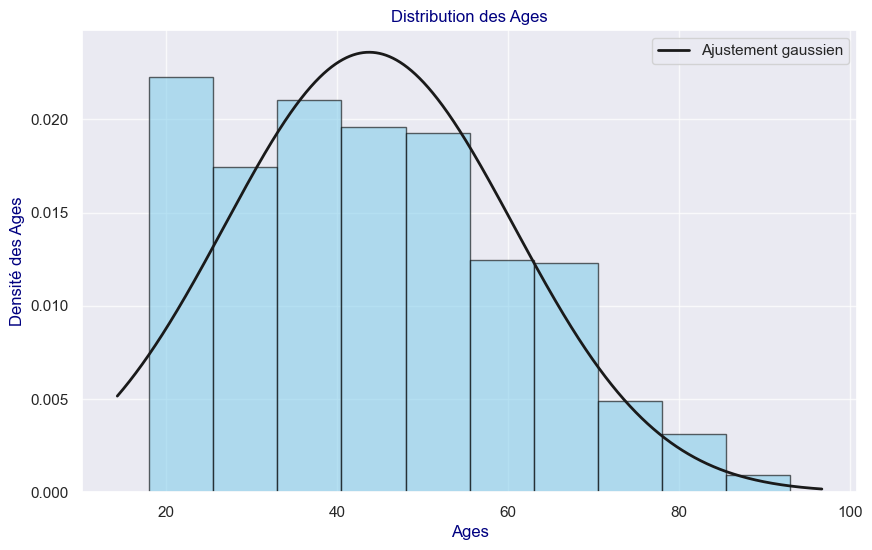

In [72]:
#Visualisation de la distribution des ages :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

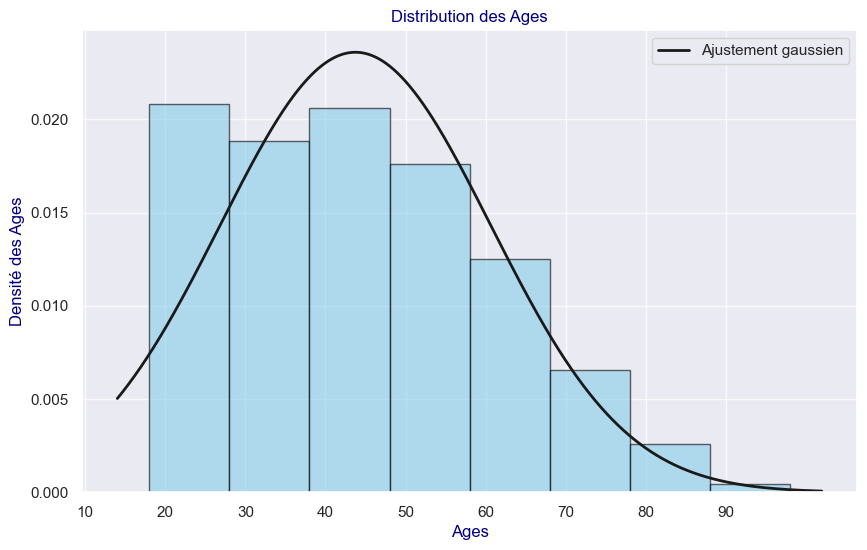

In [73]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=8,range=(18,98), density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

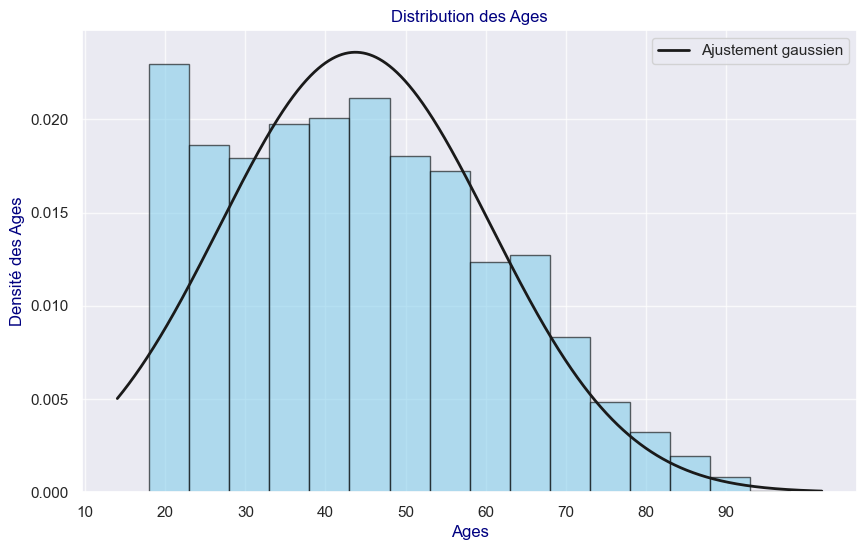

In [74]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=16,range=(18,98), density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Les dépenses pourraient être distribuées normalement (avec une nuance pour les premières tranches).

##### **Total Achat**

In [75]:
total_achat.describe()

count    8596.000000
mean     1296.343300
std       958.404544
min         6.310000
25%       562.645000
50%      1045.585000
75%      1796.015000
max      5285.820000
Name: total_achat, dtype: float64

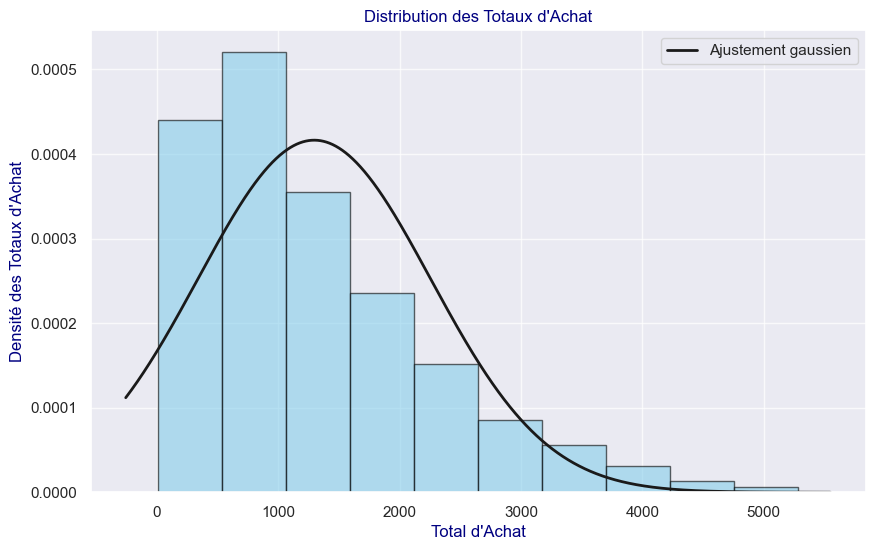

In [76]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(total_achat, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(total_achat)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(total_achat))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution des Totaux d'Achat")
plt.xlabel("Total d'Achat")
plt.ylabel("Densité des Totaux d'Achat")
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Les Totaux d'Achat pourraient être distribuées normalement (avec une nuance pour les premières tranches).

###### **Testons la Normalité : Test de Shapiro : Données supérieurs à 2_000 Test de Shapiro pas adapté**

In [77]:
#Testons la Normalité des Ages :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne 'budget voyage annuel'
#age = df['age'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(age)

# Afficher les résultats
print("Taille de mon échantillon:", len(age))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(age))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 8596
Statistique du test de Shapiro-Wilk : 0.9697306402580121
Valeur p : 4.615340399594849e-39
ShapiroResult(statistic=0.9697306402580121, pvalue=4.615340399594849e-39)

Les données ne suivent pas une distribution normale (on rejette H0)


D:\Programmes2\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)
D:\Programmes2\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


L'age ne suit pas un distribution normale (probablement à cause des premières tranches par curiosité on pourrait refaire les tests avec les ages supérieurs à 25 ans.  
En effet peut-être que des mineurs trichent et se mettent à 18 ans pour pouvoir commander ? ce qui agrandit cette tranche.  
En tout cas dans cette distribution coplète pas de Normalité.

In [78]:
#Testons la Normalité des Totaux d'Achat :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne Total d'Achat
#total_achat = df['age'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(total_achat)

# Afficher les résultats
print("Taille de mon échantillon:", len(total_achat))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(total_achat))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 8596
Statistique du test de Shapiro-Wilk : 0.9042872733458418
Valeur p : 1.4824486626352822e-58
ShapiroResult(statistic=0.9042872733458418, pvalue=1.4824486626352822e-58)

Les données ne suivent pas une distribution normale (on rejette H0)


Les données de Total d'Achat ne suivent pas un distribution normale !

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 8596 (bien supérieur à 2_000) :**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

In [79]:
from scipy.stats import kstest, zscore

# Chargement des données
#age = df_Profil_Client_Achat_1_1['age']
#total_achat = df_Profil_Client_Achat_1_1['total_achat']

# Centrage-réduction des séries (normalisation)
age_norm = zscore(age)
total_achat_norm = zscore(total_achat)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age, p_value_age = kstest(age_norm, 'norm')
ks_stat_achat, p_value_achat = kstest(total_achat_norm, 'norm')

# Affichage des résultats
print("Test K-S pour 'age' :")
print(f"  KS statistic = {ks_stat_age:.4f}, p-value = {p_value_age:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

print("\nTest K-S pour 'total_achat' :")
print(f"  KS statistic = {ks_stat_achat:.4f}, p-value = {p_value_achat:.4f}")
if p_value_achat < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

Test K-S pour 'age' :
  KS statistic = 0.0640, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.

Test K-S pour 'total_achat' :
  KS statistic = 0.1059, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


POur l'age et pour total_achat,  
Nous rejetons H0 et donc la normalité (p_value<0.05)

###### **Visualisation des données avec un Q-Q plot :**

<u>Qu’est-ce qu’un Q-Q plot (Quantile-Quantile plot) ?</u>  
Un Q-Q plot est une visualisation graphique utilisée pour comparer la distribution d’un échantillon à une distribution théorique (généralement une loi normale).  

**Principe :**  
Chaque point du graphique représente un quantile de ta distribution observée en fonction du quantile correspondant de la distribution théorique (ici la normale).  
Si tes données suivent la loi normale : les points doivent s’aligner approximativement sur une droite diagonale (la ligne de référence).  
Les écarts à la ligne signalent une déviation par rapport à la loi normale.  
👉 C’est un outil visuel complémentaire aux tests statistiques (comme Shapiro ou K-S).  

**Exemple de lecture :**
Si les points s'écartent en S de la diagonale → distribution asymétrique.  
Si les queues s’éloignent (en haut ou bas) → présence d’outliers ou de leptokurtose.  
Si tout est aligné → distribution proche de la normale.

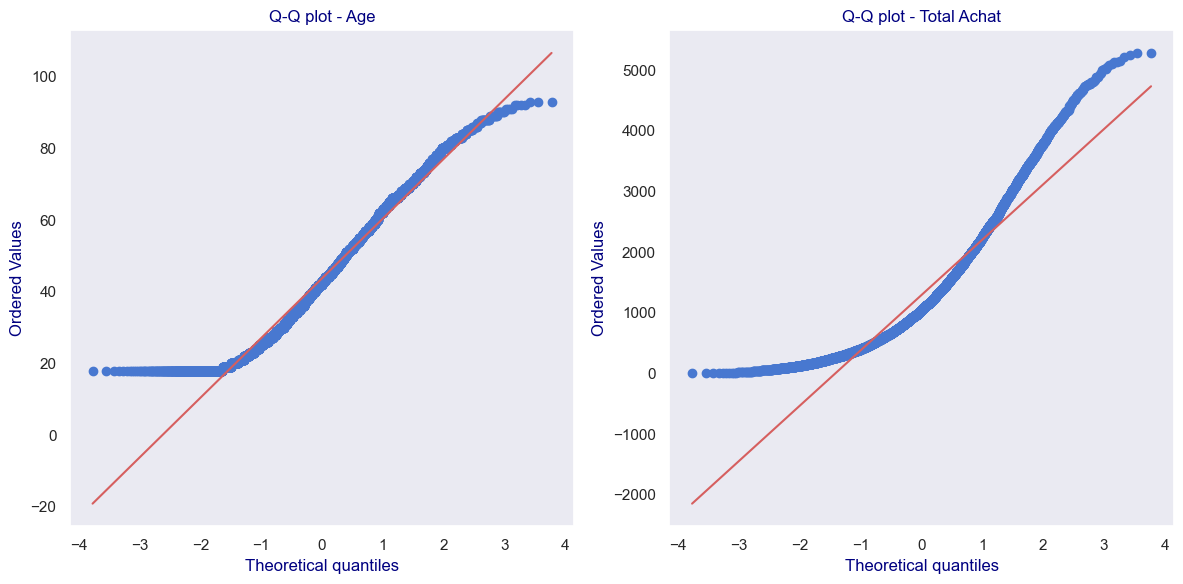

In [80]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age = df_Profil_Client_Achat_1_1['age'].dropna()
#total_achat = df_Profil_Client_Achat_1_1['total_achat'].dropna()

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age")

# Q-Q plot pour 'total_achat'
st.probplot(total_achat, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Total Achat")

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2.2 - Visualisation de la Tendance Total d'Achat par Age :</h4>
</div>

Remarque :  
Il y a trop de points on pourrait regrouper par tranches. 
Mais à ce moment là il ne faut plus faire un scatterplot et une régression linéaire car on ne se base plus sur des vraies points !  
Mieux vaut faire un histogramme?

<Axes: xlabel='age', ylabel='total_achat'>

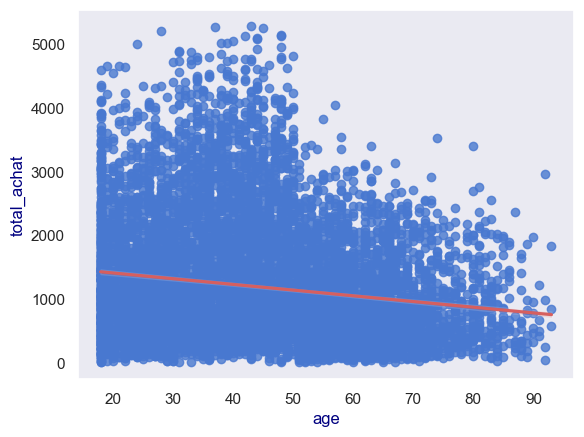

In [81]:
# Visualisation de la tendance
sns.regplot(x=age, y=total_achat, robust=True, line_kws=dict(color="r"))

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2.3 - Choix du test :</h4>
</div>

Rappel des conditions pour le Test de Spearman :  
- Les variables doivent être quantitatives : => OK
- Les données doivent être indépendantes : => on peut supposer que une expérience(ligne) client/Totald'Achat est indépendante d'une autre;  
  
- Les données n'ont pas besoin d' une distribution normale=>OK

- La relation entre les variables doit être monotone pas forcément linéaire. (en vrai c'est ce qu'on cherche à vérifier, mais selon la 1ère visualisation, ça part bien).

>Conditions :  
	-2 var quant  
	- expériences indépendantes  
	- Pas de nécessité de Normalité  
	- relation monotone pas forcément linéaire (H0 : pas de correl ; H1 : correl lin)  
  
>calcul de coefficient de corrélation ρ (rho), qui varie entre -1 et 1 :  
•	ρ = 1 : Corrélation positive parfaite.  
•	ρ= −1 : Corrélation négative parfaite.  
•	ρ= 0 : Aucune corrélation.  
  
>p-value inf à 0,05 (H0 rejetée)  

In [82]:
#Test de Spearman

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age
#total_achat

# Visualisation de la tendance déjà fait
#sns.regplot(x=age, y=total_achat, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age, total_achat)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.18453796132936023
Valeur p: 1.0214367541092694e-66


##### **OBSERVATIONS :**
la p-value est inférieure à 0.05, et donc l'hypothèse H0 (pas de relation est rejetée).  

Le coefficient de corrélation de Spearman est négatif (-0.18) : ce qui signifie que plus on est agé moins on dépense.  
Cependant le coefficient de corrélation de Spearman est faible (moins de 0.3 en valeur absolue), donc cette corrélation est très faible.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2.4 - Etude recentrée sur les 30_70 ans :</h4>
</div>

##### **Etudions la tranche 30-70 sans les extrêmes**

In [83]:
mask_age_30_70 = (30<=df_Profil_Client_Achat_1_1['age'])&(df_Profil_Client_Achat_1_1['age']<70)
age_30_70 = df_Profil_Client_Achat_1_1.loc[mask_age_30_70,'age']
total_achat_30_70 = df_Profil_Client_Achat_1_1.loc[mask_age_30_70,'total_achat']

###### **age_30_70**

In [84]:
age_30_70.describe()

count       5867.0
mean     47.473496
std      10.948837
min           30.0
25%           38.0
50%           46.0
75%           56.0
max           69.0
Name: age, dtype: Float64

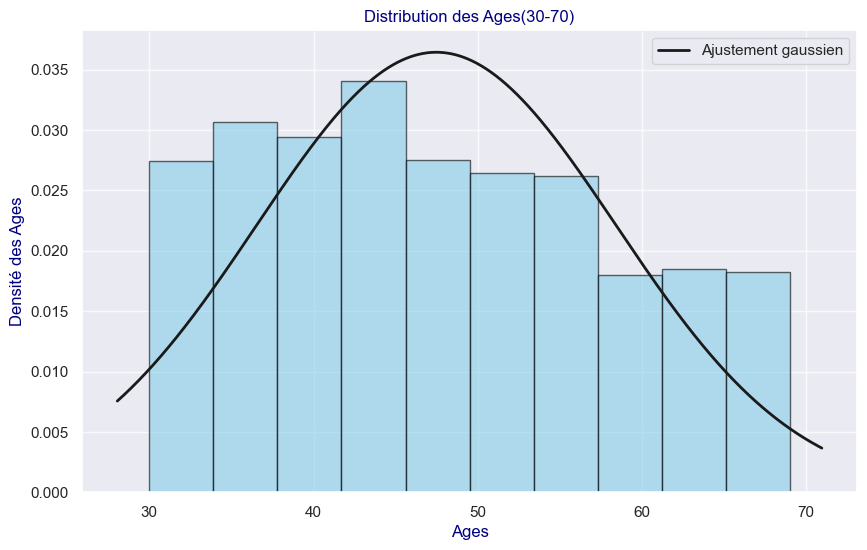

In [85]:
#Visualisation de la distribution des age_30_70 :

plt.figure(figsize=(10, 6))
plt.hist(age_30_70, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age_30_70)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age_30_70))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages(30-70)')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

**OBSERVATION :**
La répartition des ages ne respecte définitivement pas une loi Normale, les effectifs des Ages sont trop homogènes.  
On n'a pas un centre plus fourni et des extrémités moins fournie.  
Il ne semble pas qu'en restreignant l'étude des ages on n'obtiendra une distribution Normale.  
Par contre on peut quand même regarder avec ce que le Test de Spearmann (et pas Pearson car pas de normalité) donnera sur cet effectif.

###### **total_achat_30_70**

In [86]:
total_achat_30_70.describe()

count    5867.000000
mean     1320.707423
std       986.824398
min         6.310000
25%       564.775000
50%      1056.980000
75%      1825.565000
max      5285.820000
Name: total_achat, dtype: float64

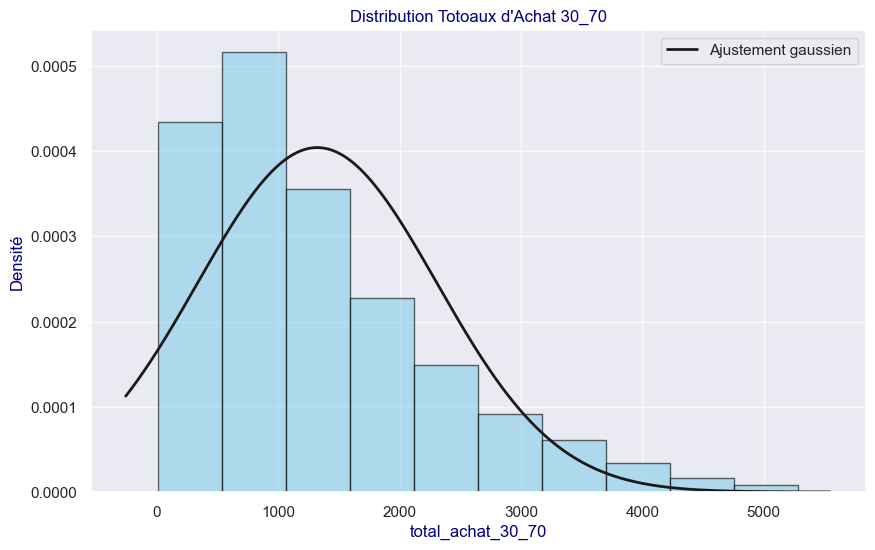

In [87]:
#Visualisation de la distribution des age_30_70 :

plt.figure(figsize=(10, 6))
plt.hist(total_achat_30_70, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(total_achat_30_70)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(total_achat_30_70))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution Totoaux d'Achat 30_70")
plt.xlabel('total_achat_30_70')
plt.ylabel('Densité')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

###### **Test de Kolomogorov-Smirnov**

In [88]:
from scipy.stats import kstest, zscore

# Chargement des données
#age_30_70
#total_achat_30_70

# Centrage-réduction des séries (normalisation)
age_30_70_norm = zscore(age_30_70)
total_achat_30_70_norm = zscore(total_achat_30_70)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age, p_value_age = kstest(age_30_70_norm, 'norm')
ks_stat_achat, p_value_achat = kstest(total_achat_30_70_norm, 'norm')

# Affichage des résultats
print("Test K-S pour 'age_30_70' :")
print(f"  KS statistic = {ks_stat_age:.4f}, p-value = {p_value_age:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

print("\nTest K-S pour 'total_achat_30_70' :")
print(f"  KS statistic = {ks_stat_achat:.4f}, p-value = {p_value_achat:.4f}")
if p_value_achat < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

Test K-S pour 'age_30_70' :
  KS statistic = 0.0687, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.

Test K-S pour 'total_achat_30_70' :
  KS statistic = 0.1099, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


###### Visualisation des données avec un Q-Q plot 30_70

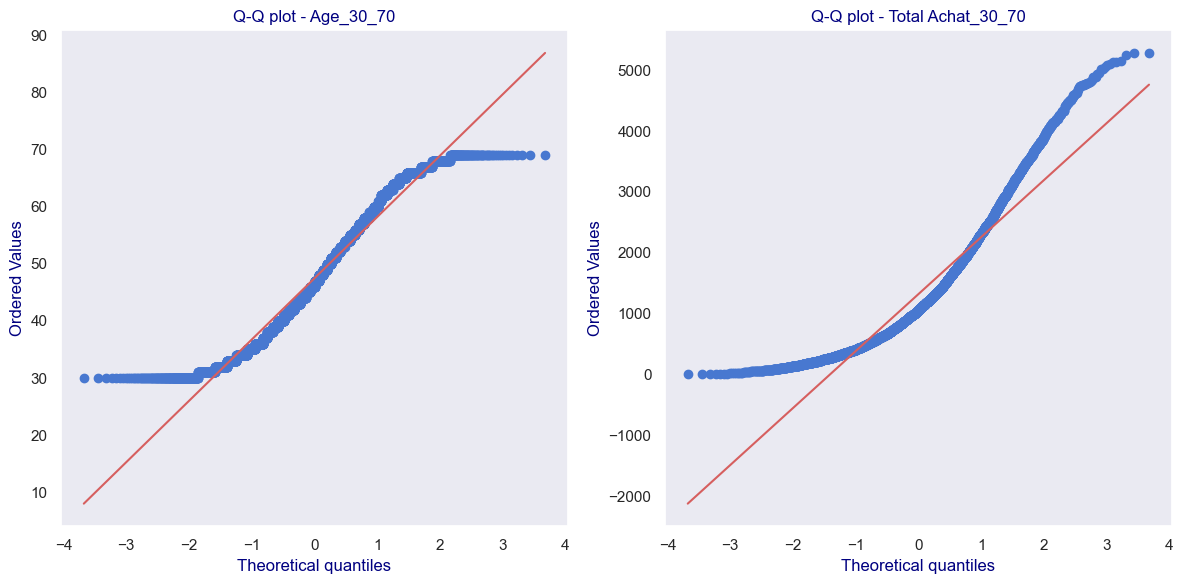

In [89]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age_30_70'
#total_achat_30_70

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age_30_70, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age_30_70")

# Q-Q plot pour 'total_achat'
st.probplot(total_achat_30_70, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Total Achat_30_70")

plt.tight_layout()
plt.show()

##### **Visualisation de la Tendance Total d'Achat par Age 30_70:**

<Axes: xlabel='age', ylabel='total_achat'>

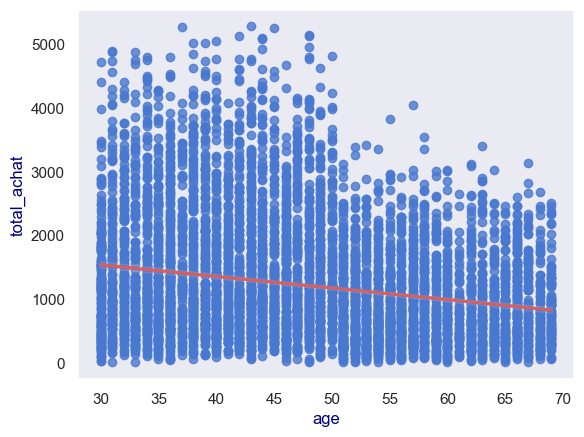

In [90]:
# Visualisation de la tendance pour 30_70
sns.regplot(x=age_30_70, y=total_achat_30_70, robust=True, line_kws=dict(color="r"))

##### **Test de Spearman 30_70**

In [91]:
#Test de Spearman_30_70

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age_30_70
#total_achat_30_70

# Visualisation de la tendance déjà fait
#sns.regplot(x=age_30_70, y=total_achat_30_70, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age_30_70, total_achat_30_70)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.23441387093509342
Valeur p: 4.6546429645030695e-74


**OBSERVATIONS COMPLEMENTAIRES :**  
Les résultats sont similaires à ceux de l'ensemble de la population :  
p-value inf à 0.05 => H0 rejeté (absence de relation est rejetée) ce n'est pas du au hasard.  

Coeff de Spearman négatif : corrélation monotone négative mais faible.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2.5 - Etude automatisée (2 var quant) :</h4>
</div>

In [92]:
#import pandas as pd
#import scipy.stats as st
#import numpy as np

def test_correlation_auto(df, var_quant_1, var_quant_2, alpha=0.05):
    """
    Test automatique de corrélation entre deux variables quantitatives, avec choix du test
    (Pearson ou Spearman) selon la normalité des données. Retourne un DataFrame structuré.
    """

    results = {}

    print(f"\n--- Analyse de la relation entre {var_quant_1} et {var_quant_2} ---\n")

    for var in [var_quant_1, var_quant_2]:
        data = df[var].dropna()
        n = len(data)

        if n <= 5000:
            stat, p = st.shapiro(data)
            test = "Shapiro-Wilk"
        else:
            mean = np.mean(data)
            std = np.std(data)
            data_norm = (data - mean) / std
            stat, p = st.kstest(data_norm, 'norm')
            test = "Kolmogorov-Smirnov"

        normal = p > alpha
        results[f"{var}_normalite"] = normal
        results[f"{var}_p_value_normalite"] = p
        results[f"{var}_test_normalite"] = test
        results[f"{var}_n"] = n

        status = "✅ Normale" if normal else "❌ Non normale"
        print(f"{var} : n = {n} | Test = {test} | p = {p:.4f} => {status}")

    # Choix du test de corrélation
    if results[f"{var_quant_1}_normalite"] and results[f"{var_quant_2}_normalite"]:
        print("\n✅ Les deux variables sont normales → Test de Pearson sélectionné.")
        test_type = "Pearson"
        corr, p_corr = st.pearsonr(df[var_quant_1], df[var_quant_2])
    else:
        print("\n❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.")
        test_type = "Spearman"
        corr, p_corr = st.spearmanr(df[var_quant_1], df[var_quant_2])

    conclusion = "Corrélation significative ✅" if p_corr < alpha else "Corrélation non significative ❌"

    print(f"\nTest de corrélation : {test_type}")
    print(f"  Coefficient : {corr:.4f}")
    print(f"  p-value     : {p_corr:.4f}")
    print(f"  ➤ Conclusion : {conclusion}")

    # Résumé structuré
    df_resultat = pd.DataFrame({
        "var_1": [var_quant_1],
        "var_2": [var_quant_2],
        "test_corr_utilise": [test_type],
        "correlation": [corr],
        "p_value_corr": [p_corr],
        "var_1_normale": [results[f"{var_quant_1}_normalite"]],
        "p_var_1_normalite": [results[f"{var_quant_1}_p_value_normalite"]],
        "test_var_1_normalite": [results[f"{var_quant_1}_test_normalite"]],
        "n_var_1": [results[f"{var_quant_1}_n"]],
        "var_2_normale": [results[f"{var_quant_2}_normalite"]],
        "p_var_2_normalite": [results[f"{var_quant_2}_p_value_normalite"]],
        "test_var_2_normalite": [results[f"{var_quant_2}_test_normalite"]],
        "n_var_2": [results[f"{var_quant_2}_n"]],
        "conclusion": [conclusion]
    })

    return df_resultat


In [93]:
#import matplotlib.pyplot as plt
#import seaborn as sns

def test_correlation_auto_et_visualisation(df, var_quant_1, var_quant_2, alpha=0.05):
    """
    Même logique que test_correlation_auto, mais ajoute une visualisation graphique :
    scatterplot + droite de régression si Pearson, courbe de tendance sinon.
    """

    df_resultat = test_correlation_auto(df, var_quant_1, var_quant_2, alpha)

    # Visualisation
    print("\n📈 Visualisation de la relation entre les deux variables...\n")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var_quant_1, y=var_quant_2, alpha=0.7)

    if df_resultat["test_corr_utilise"][0] == "Pearson":
        sns.regplot(data=df, x=var_quant_1, y=var_quant_2, scatter=False, color='red', label='Régression linéaire')
    else:
        # Tendance non paramétrique (LOWESS)
        sns.regplot(data=df, x=var_quant_1, y=var_quant_2, scatter=False, color='orange', lowess=True, label='Tendance (lowess)')

    plt.title(f"{var_quant_1} vs {var_quant_2}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_resultat


In [94]:
test_correlation_auto(df_Profil_Client_Achat_1_1,var_quant_1 = 'age',var_quant_2 = 'total_achat')


--- Analyse de la relation entre age et total_achat ---

age : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale
total_achat : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.1845
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅


var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  total_achat          Spearman    -0.184538  1.021437e-66   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False       4.921419e-31   Kolmogorov-Smirnov     8596   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False       2.110729e-84   Kolmogorov-Smirnov     8596   

                    conclusion  
0  Corrélation significative ✅


--- Analyse de la relation entre age et total_achat ---

age : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale
total_achat : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.1845
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅

📈 Visualisation de la relation entre les deux variables...



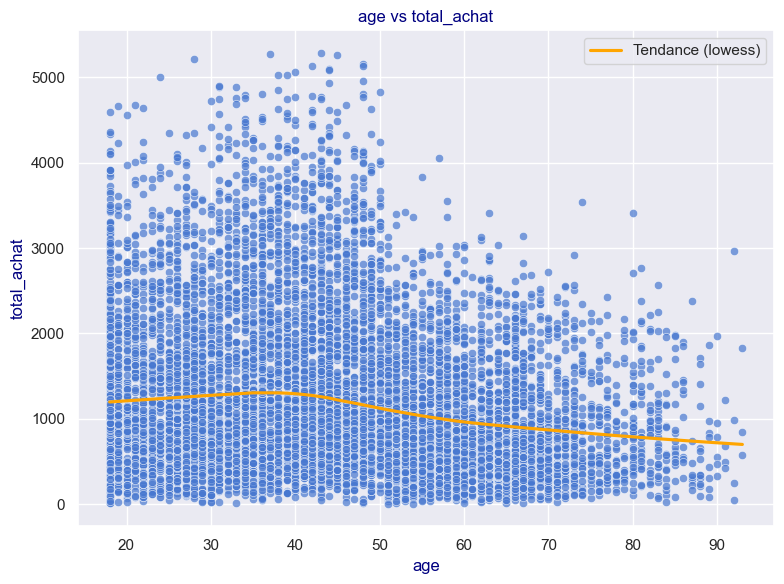

var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  total_achat          Spearman    -0.184538  1.021437e-66   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False       4.921419e-31   Kolmogorov-Smirnov     8596   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False       2.110729e-84   Kolmogorov-Smirnov     8596   

                    conclusion  
0  Corrélation significative ✅

In [95]:
test_correlation_auto_et_visualisation(df_Profil_Client_Achat_1_1,var_quant_1 = 'age',var_quant_2 = 'total_achat')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.3 - Corrélation Age / fréquence d'Achat :</h3>
</div>

In [96]:
df_Profil_Client_Achat_1_1.head(3)
                              

client_id  age  total_achat  nb_sessions
0       c_1   67       629.02           34
1      c_10   66      1353.60           34
2     c_100   30       254.85            5

In [97]:
df_Profil_Client_Achat_1_1.shape

(8596, 4)

In [98]:
df_Profil_Client_Achat_1_1.columns

Index(['client_id', 'age', 'total_achat', 'nb_sessions'], dtype='object')

In [99]:
# Extraire les colonnes pertinentes
#age = df_Profil_Client_Achat_1_1['age'] #deja extraite
nb_sessions = df_Profil_Client_Achat_1_1['nb_sessions']

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3.1 - Etude des distributions Age et Fréquence d'Achat(Nb de sessions) :</h4>
</div>

##### **Age**

In [100]:
age.describe()

count       8596.0
mean     43.739646
std      16.910542
min           18.0
25%           30.0
50%           43.0
75%           56.0
max           93.0
Name: age, dtype: Float64

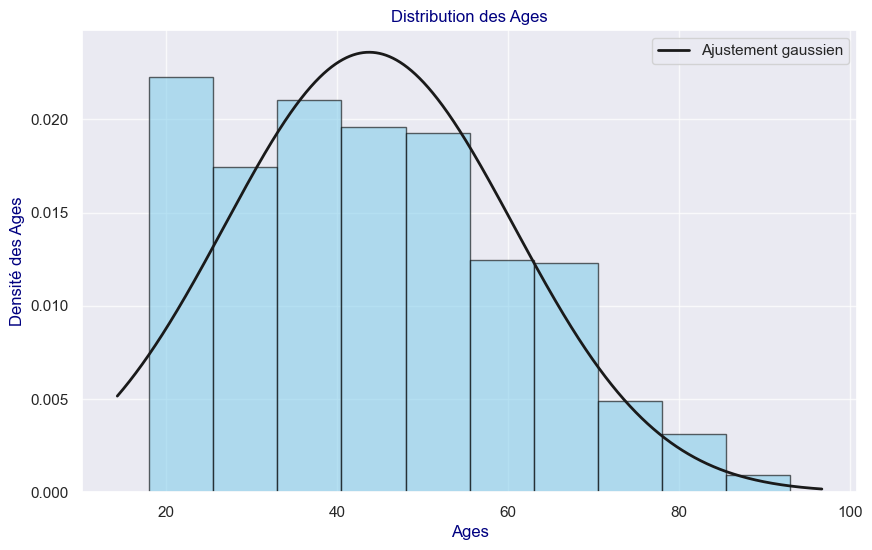

In [101]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Les dépenses pourraient être distribuées normalement (avec une nuance pour les premières tranches).

##### **Nombre de Sessions**

In [102]:
nb_sessions.describe()

count       8596.0
mean     37.513495
std      30.898817
min            1.0
25%           15.0
50%           27.0
75%           50.0
max          167.0
Name: nb_sessions, dtype: Float64

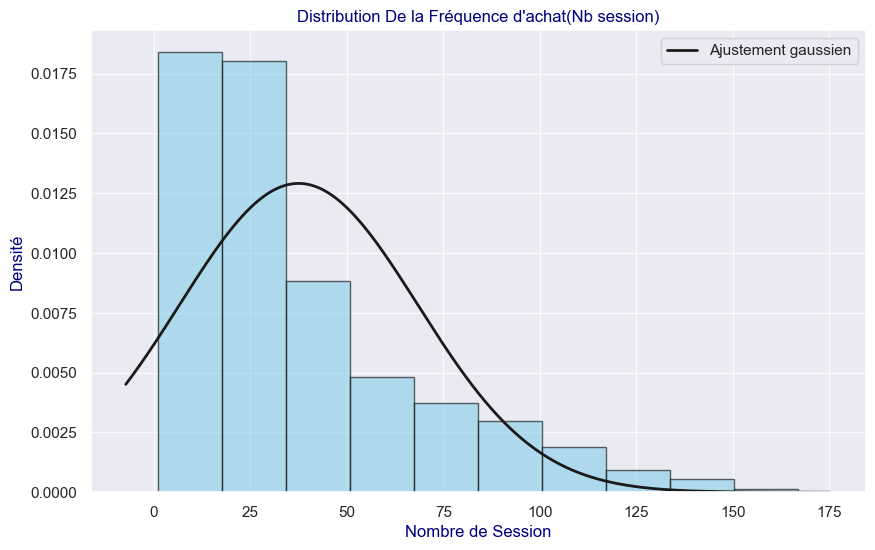

In [103]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(nb_sessions, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(nb_sessions)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(nb_sessions))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution De la Fréquence d'achat(Nb session)")
plt.xlabel("Nombre de Session")
plt.ylabel("Densité")
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

La Fréquence d'Achat ne semble pas être distribuée normalement.

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 8617 (bien supérieur à 2_000) :**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

In [104]:
from scipy.stats import kstest, zscore

# Chargement des données
#age = df_Profil_Client_Achat_1_1['age']
#nb_sessions = df_Profil_Client_Achat_1_1['nb_sessions']

# Centrage-réduction des séries (normalisation)
age_norm = zscore(age)
total_achat_norm = zscore(nb_sessions)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age, p_value_age = kstest(age_norm, 'norm')
ks_stat_sessions, p_value_sessions = kstest(nb_sessions, 'norm')

# Affichage des résultats
print("Test K-S pour 'age' :")
print(f"  KS statistic = {ks_stat_age:.4f}, p-value = {p_value_age:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

print("\nTest K-S pour 'nb_sessions' :")
print(f"  KS statistic = {ks_stat_sessions:.4f}, p-value = {p_value_sessions:.4f}")
if p_value_achat < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

Test K-S pour 'age' :
  KS statistic = 0.0640, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.

Test K-S pour 'nb_sessions' :
  KS statistic = 0.9900, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


POur l'age et pour nb_sessions,  
Nous rejetons H0 et donc la normalité (p_value<0.05)

###### **Visualisation des données avec un Q-Q plot :**

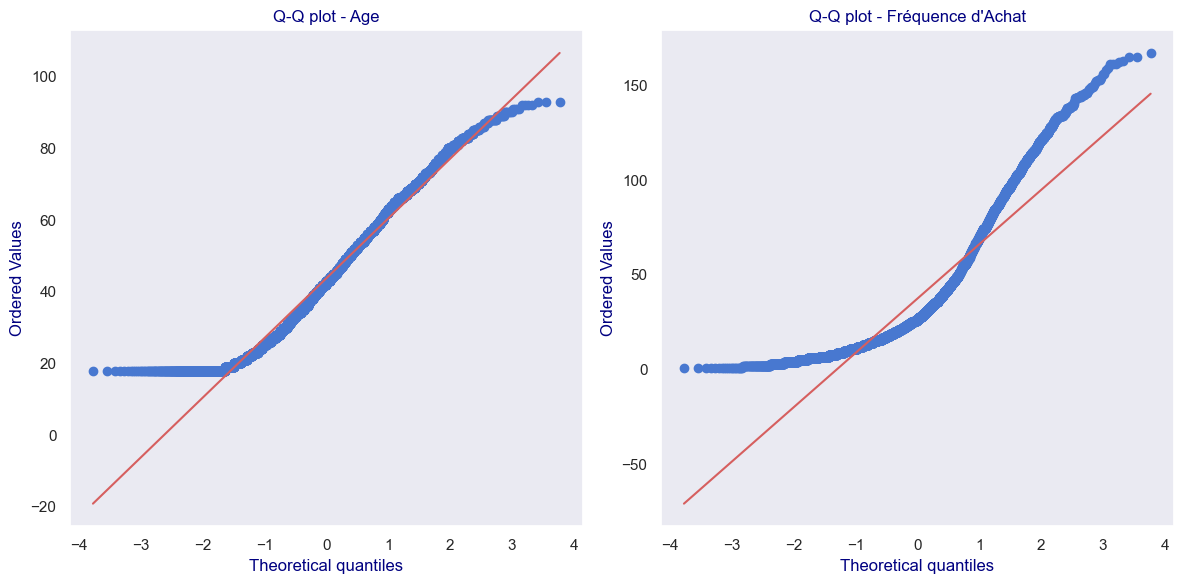

In [105]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age = df_Profil_Client_Achat_1_1['age'].dropna()
#nb_sessions = df_Profil_Client_Achat_1_1['nb_sessions'].dropna()

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age")

# Q-Q plot pour 'total_achat'
st.probplot(nb_sessions, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Fréquence d'Achat")

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3.2 - Visualisation de la Tendance Fréquence d'Achat par Age :</h4>
</div>

Remarque :  
Il y a trop de points on pourrait regrouper par tranches.  
Mais à ce moment là il ne faut plus faire un scatterplot et une régression linéaire car on ne se base plus sur des vraies points !  
Mieux vaut faire un histogramme?

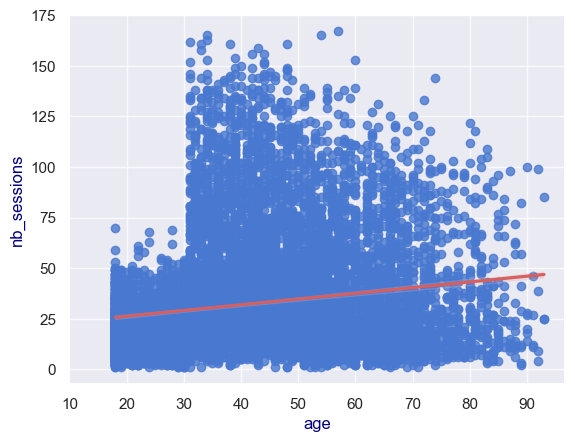

In [106]:
# Visualisation de la tendance
sns.regplot(x=age, y=nb_sessions, robust=True, line_kws=dict(color="r"))
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

##### **OBSERVATIONS :**  
On n'a pas du tout l'impression d'avoir une corrélation (peut être quand même une fréquence d'acaht plsu élévée entre 30 et 50 ans.  
On a un phénomène étonnant de seuil après 31 ou 32 ans ou le nb de session explose d'un coup.  
Ce qui peut être expliqué par le fait que c'est un âge ou on commence à êter stabilisé et avoir un métier qui nous donne plus de liberté d'achat.  
La présence d'enfant aussi qui implique l'achat pour toute la famille (et notamment de beaucoup de livres d'enfants).

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3.3 - Choix du test :</h4>
</div>

Rappel des conditions pour le Test de Spearman :  
- Les variables doivent être quantitatives : => OK
- Les données doivent être indépendantes : => on peut supposer que une expérience(ligne) client/Fqce d'Achat est indépendante d'une autre;  
  
- Les données n'ont pas besoin d' une distribution normale=>OK

- La relation entre les variables doit être monotone pas forcément linéaire. (en vrai c'est ce qu'on cherche à vérifier, mais selon la 1ère visualisation, ça part bien).

>Conditions :  
	-2 var quant  
	- expériences indépendantes  
	- Pas de nécessité de Normalité  
	- relation monotone pas forcément linéaire (H0 : pas de correl ; H1 : correl lin)  
  
>calcul de coefficient de corrélation ρ (rho), qui varie entre -1 et 1 :  
•	ρ = 1 : Corrélation positive parfaite.  
•	ρ= −1 : Corrélation négative parfaite.  
•	ρ= 0 : Aucune corrélation.  
  
>p-value inf à 0,05 (H0 rejetée)  

In [107]:
#Test de Spearman

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age
#nb_sessions

# Visualisation de la tendance déjà fait
#sns.regplot(x=age, y=nb_sessions, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age, nb_sessions)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: 0.21196373259671872
Valeur p: 6.629168433162815e-88


##### **OBSERVATIONS :**
la p-value est inférieure à 0.05, et donc l'hypothèse H0 (pas de relation est rejetée).  

Le coefficient de corrélation de Spearman est positif (+0.21) : ce qui signifie que plus on est agé plus on fait de dépense.  
Cependant le coefficient de corrélation de Spearman est faible (moins de 0.3 en valeur absolue), donc cette corrélation est très faible.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3.4 - Etude recentrée sur les 30_70 ans :</h4>
</div>

##### **Etudions la tranche 30-70 sans les extrêmes**

In [108]:
#mask_age_30_70 = (30<=df_Profil_Client_Achat_1_1['age'])&(df_Profil_Client_Achat_1_1['age']<70)
#age_30_70 = df_Profil_Client_Achat_1_1.loc[mask_age_30_70,'age']
nb_sessions_30_70 = df_Profil_Client_Achat_1_1.loc[mask_age_30_70,'nb_sessions']

###### **age_30_70**

déjà faite

**OBSERVATION :**
La répartition des ages ne respecte définitivement pas une loi Normale, les effectifs des Ages sont trop homogènes.  
On n'a pas un centre plus fourni et des extrémités moins fournie.  
Il ne semble pas qu'en restreignant l'étude des ages on n'obtiendra une distribution Normale.  
Par contre on peut quand même regarder avec ce que le Test de Spearmann (et pas Pearson car pas de normalité) donnera sur cet effectif.

###### **nb_sessions_30_70**

In [109]:
nb_sessions_30_70.describe()

count       5867.0
mean     44.101244
std      33.123224
min            1.0
25%           19.0
50%           34.0
75%           63.0
max          167.0
Name: nb_sessions, dtype: Float64

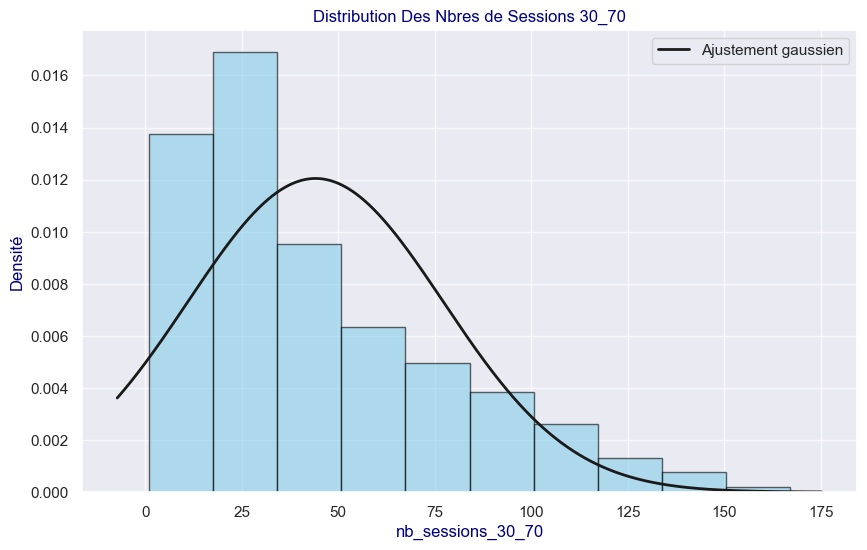

In [110]:
#Visualisation de la distribution des nb_sessions_30_70 :

plt.figure(figsize=(10, 6))
plt.hist(nb_sessions_30_70, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(nb_sessions_30_70)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(nb_sessions_30_70))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution Des Nbres de Sessions 30_70")
plt.xlabel('nb_sessions_30_70')
plt.ylabel('Densité')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

**OBSERVATIONS :**  
La distribution des Nbre de Sessions pour les 30_70 ne semble pas respecter une distribution normale non plus.

###### **Test de Kolomogorov-Smirnov**

In [111]:
from scipy.stats import kstest, zscore

# Chargement des données
#age_30_70
#

# Centrage-réduction des séries (normalisation)
age_30_70_norm = zscore(age_30_70)
nb_sessions_30_70_norm = zscore(nb_sessions_30_70)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age, p_value_age = kstest(age_30_70_norm, 'norm')
ks_stat_achat, p_value_achat = kstest(nb_sessions_30_70_norm, 'norm')

# Affichage des résultats
print("Test K-S pour 'age_30_70' :")
print(f"  KS statistic = {ks_stat_age:.4f}, p-value = {p_value_age:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

print("\nTest K-S pour 'nb_sessions_30_70' :")
print(f"  KS statistic = {ks_stat_achat:.4f}, p-value = {p_value_achat:.4f}")
if p_value_achat < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

Test K-S pour 'age_30_70' :
  KS statistic = 0.0687, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.

Test K-S pour 'nb_sessions_30_70' :
  KS statistic = 0.1284, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


###### Visualisation des données avec un Q-Q plot 30_70

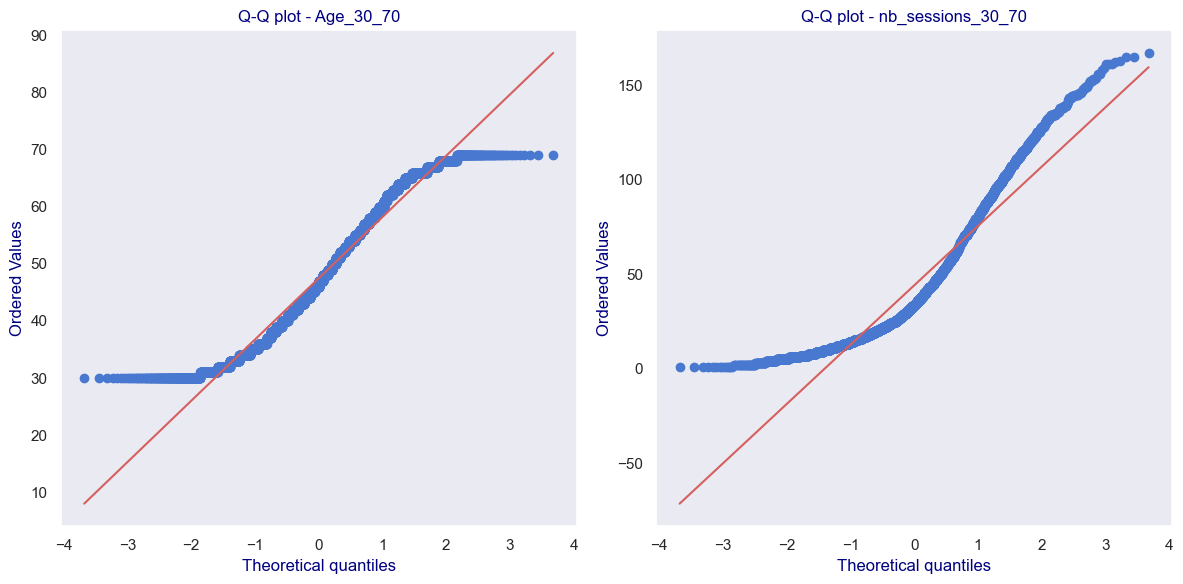

In [112]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age_30_70'
#nb_sessions_30_70

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age_30_70, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age_30_70")

# Q-Q plot pour 'Nbr de sessions
st.probplot(nb_sessions_30_70, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - nb_sessions_30_70")

plt.tight_layout()
plt.show()

##### **Visualisation de la Tendance Fréquence d'Achat par Age 30_70:**

<Axes: xlabel='age', ylabel='nb_sessions'>

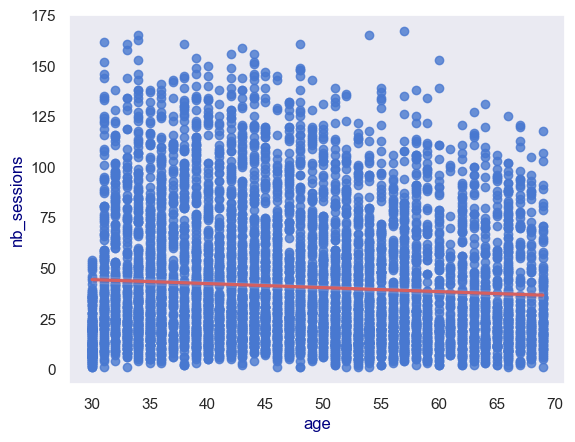

In [113]:
# Visualisation de la tendance pour 30_70
sns.regplot(x=age_30_70, y=nb_sessions_30_70, robust=True, line_kws=dict(color="r"))

##### **Test de Spearman 30_70**

In [114]:
#Test de Spearman_30_70

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age_30_70
#nb_sessions_30_70

# Visualisation de la tendance déjà fait
#sns.regplot(x=age_30_70, y=nb_sessions_30_70, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age_30_70, nb_sessions_30_70)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.07565629161253432
Valeur p: 6.549838611527994e-09


**OBSERVATIONS COMPLEMENTAIRES :**  
Les résultats sont similaires à ceux de l'ensemble de la population :  
p-value inf à 0.05 => H0 rejeté (absence de relation est rejetée) ce n'est pas du au hasard.  

Coeff de Spearman négatif : corrélation monotone négative mais faible.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3.5 - Etude automatisée (2 var quant) :</h4>
</div>

In [115]:
test_correlation_auto(df_Profil_Client_Achat_1_1,var_quant_1 = 'age',var_quant_2 = 'nb_sessions')


--- Analyse de la relation entre age et nb_sessions ---

age : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale
nb_sessions : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : 0.2120
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅


var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  nb_sessions          Spearman     0.211964  6.629168e-88   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False       4.921419e-31   Kolmogorov-Smirnov     8596   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False      1.124821e-174   Kolmogorov-Smirnov     8596   

                    conclusion  
0  Corrélation significative ✅


--- Analyse de la relation entre age et nb_sessions ---

age : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale
nb_sessions : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : 0.2120
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅

📈 Visualisation de la relation entre les deux variables...



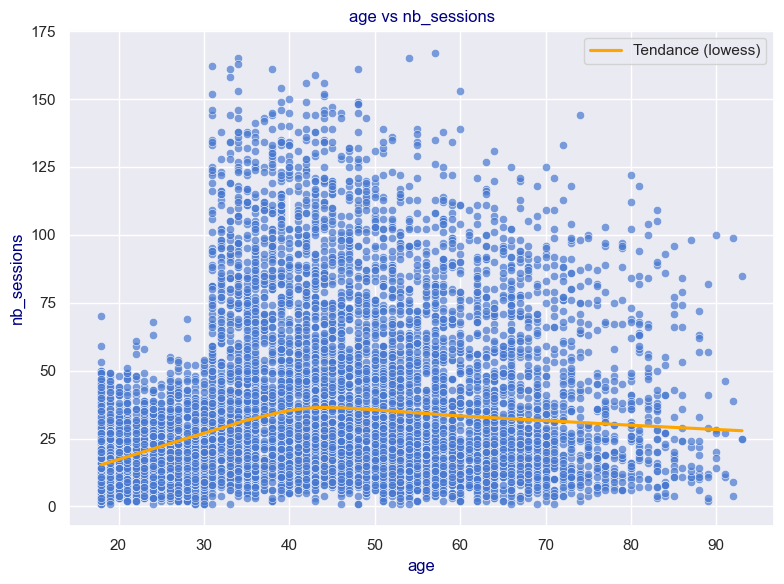

var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  nb_sessions          Spearman     0.211964  6.629168e-88   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False       4.921419e-31   Kolmogorov-Smirnov     8596   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False      1.124821e-174   Kolmogorov-Smirnov     8596   

                    conclusion  
0  Corrélation significative ✅

In [116]:
test_correlation_auto_et_visualisation(df_Profil_Client_Achat_1_1,var_quant_1 = 'age',var_quant_2 = 'nb_sessions')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.4 - Corrélation Age / Taille du Panier Moyen :</h3>
</div>

In [117]:
df_Profil_Client_Achat_1_1.head(3)

client_id  age  total_achat  nb_sessions
0       c_1   67       629.02           34
1      c_10   66      1353.60           34
2     c_100   30       254.85            5

In [118]:
df_Profil_Client_Achat_1_1['nb_sessions'].describe()

count       8596.0
mean     37.513495
std      30.898817
min            1.0
25%           15.0
50%           27.0
75%           50.0
max          167.0
Name: nb_sessions, dtype: Float64

In [119]:
df_Profil_Client_Achat_1_1['panier_moyen'] = np.where(df_Profil_Client_Achat_1_1['nb_sessions'] == 0,
                                                      np.nan,  # ou 0 selon la logique métier
                                                      df_Profil_Client_Achat_1_1['total_achat'] / df_Profil_Client_Achat_1_1['nb_sessions']
                                                     )
df_Profil_Client_Achat_1_1.head(3)

client_id  age  total_achat  nb_sessions  panier_moyen
0       c_1   67       629.02           34     18.500588
1      c_10   66      1353.60           34     39.811765
2     c_100   30       254.85            5     50.970000

In [120]:
df_Profil_Client_Achat_1_1.shape

(8596, 5)

In [121]:
df_Profil_Client_Achat_1_1.columns

Index(['client_id', 'age', 'total_achat', 'nb_sessions', 'panier_moyen'], dtype='object')

In [122]:
# Extraire les colonnes pertinentes
#age = df_Profil_Client_Achat_1_1['age'] #deja extraite
panier_moyen = df_Profil_Client_Achat_1_1['panier_moyen']

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4.1 - Etude des distributions Age et Taille du Panier Moyen :</h4>
</div>

##### **Age**

In [123]:
age.describe()

count       8596.0
mean     43.739646
std      16.910542
min           18.0
25%           30.0
50%           43.0
75%           56.0
max           93.0
Name: age, dtype: Float64

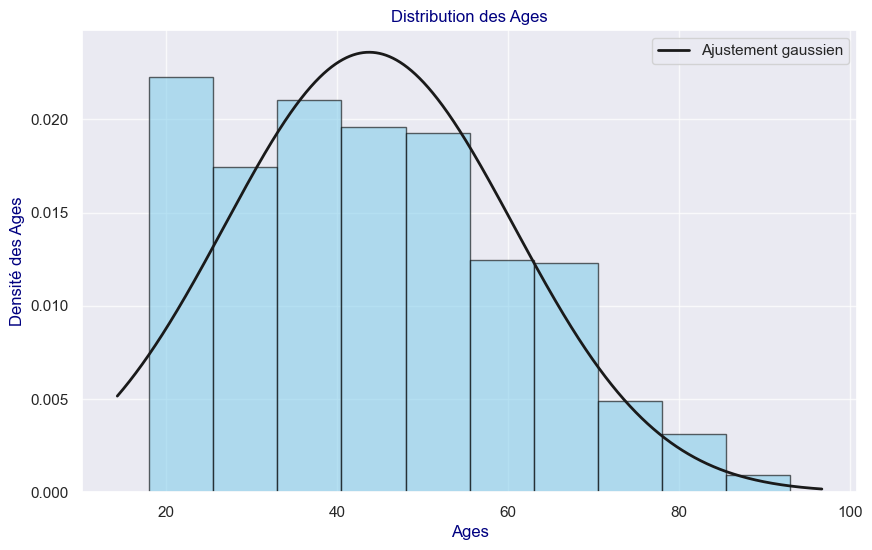

In [124]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Les dépenses pourraient être distribuées normalement (avec une nuance pour les premières tranches).

##### **Taille du Panier Moyen**

In [125]:
panier_moyen.describe()

count    8596.000000
mean       40.402796
std        22.764016
min         4.150000
25%        25.755467
50%        32.339000
75%        48.313393
max       259.422500
Name: panier_moyen, dtype: float64

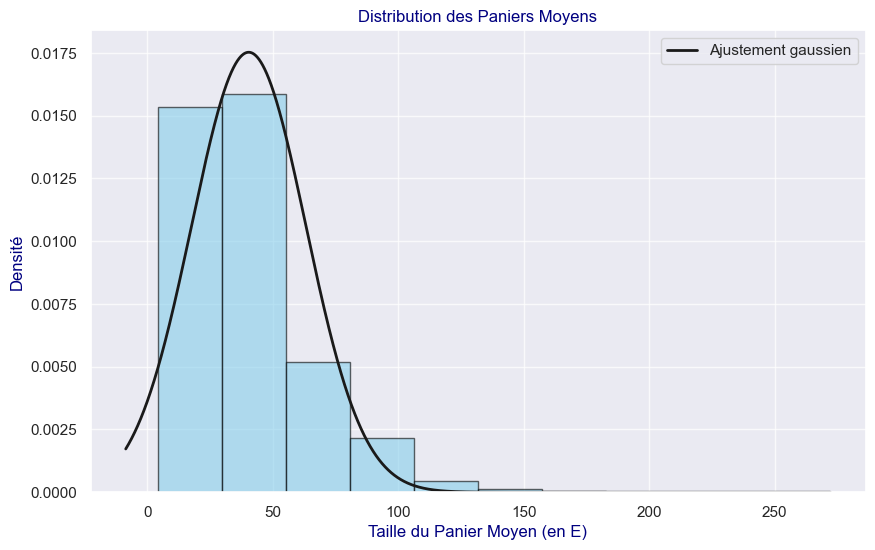

In [126]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(panier_moyen, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(panier_moyen)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(panier_moyen))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution des Paniers Moyens")
plt.xlabel("Taille du Panier Moyen (en E)")
plt.ylabel("Densité")
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

La Taille des paniers moyenrs ne semble pas être distribuée normalement.

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 8596 (bien supérieur à 2_000) :**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

In [127]:
from scipy.stats import kstest, zscore

# Chargement des données
#age = df_Profil_Client_Achat_1_1['age']
#panier_moyen = df_Profil_Client_Achat_1_1['panier_moyen']

# Centrage-réduction des séries (normalisation)
age_norm = zscore(age)
total_achat_norm = zscore(panier_moyen)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age, p_value_age = kstest(age_norm, 'norm')
ks_stat_panier_moy, p_value_panier_moy = kstest(panier_moyen, 'norm')

# Affichage des résultats
print("Test K-S pour 'age' :")
print(f"  KS statistic = {ks_stat_age:.4f}, p-value = {p_value_age:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

print("\nTest K-S pour 'panier_moyen' :")
print(f"  KS statistic = {ks_stat_panier_moy:.4f}, p-value = {p_value_panier_moy:.4f}")
if p_value_achat < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

Test K-S pour 'age' :
  KS statistic = 0.0640, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.

Test K-S pour 'panier_moyen' :
  KS statistic = 1.0000, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


POur l'age et pour panier_moyen,  
Nous rejetons H0 et donc la normalité (p_value<0.05)

###### **Visualisation des données avec un Q-Q plot :**

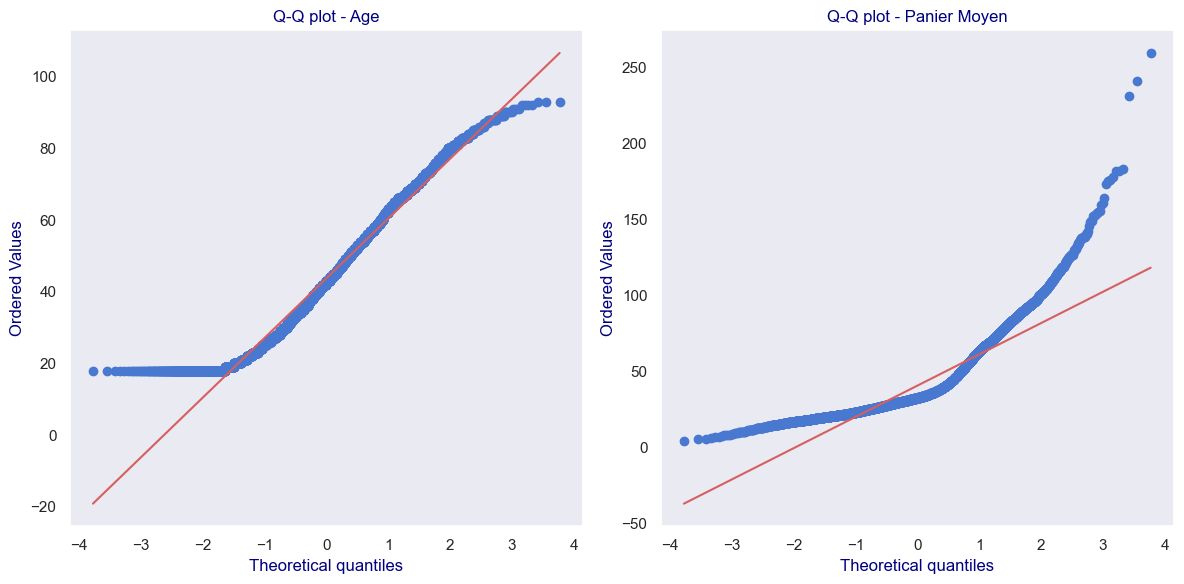

In [128]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age = df_Profil_Client_Achat_1_1['age'].dropna()
#panier_moyen = df_Profil_Client_Achat_1_1['panier_moyen'].dropna()

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age")

# Q-Q plot pour 'total_achat'
st.probplot(panier_moyen, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Panier Moyen")

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4.2 - Visualisation de la Tendance du Panier MOyen :</h4>
</div>

Remarque :  
Il y a trop de points on pourrait regrouper par tranches.  
Mais à ce moment là il ne faut plus faire un scatterplot et une régression linéaire car on ne se base plus sur des vraies points !  
Mieux vaut faire un histogramme?

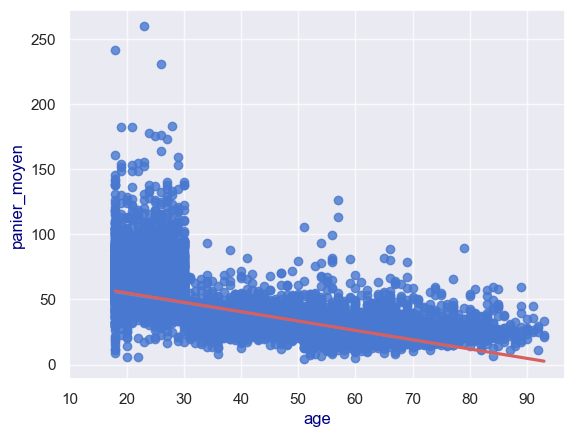

In [129]:
# Visualisation de la tendance
sns.regplot(x=age, y=panier_moyen, robust=True, line_kws=dict(color="r"))
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

##### **OBSERVATIONS :**  
On a encore une fois un phénomène très différent enrte 18 et 30 ans et entre 30 ans et plus.  
On n'a pas de corrélation globale.  
Peut-être une légère tendance à a voir un panier moyen plus faible lorsque l'age augmente

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4.3 - Choix du test :</h4>
</div>

Rappel des conditions pour le Test de Spearman :  
- Les variables doivent être quantitatives : => OK
- Les données doivent être indépendantes : => on peut supposer que une expérience(ligne) client/Fqce d'Achat est indépendante d'une autre;  
  
- Les données n'ont pas besoin d' une distribution normale=>OK

- La relation entre les variables doit être monotone pas forcément linéaire. (en vrai c'est ce qu'on cherche à vérifier, mais selon la 1ère visualisation, ça part bien).

>Conditions :  
	-2 var quant  
	- expériences indépendantes  
	- Pas de nécessité de Normalité  
	- relation monotone pas forcément linéaire (H0 : pas de correl ; H1 : correl lin)  
  
>calcul de coefficient de corrélation ρ (rho), qui varie entre -1 et 1 :  
•	ρ = 1 : Corrélation positive parfaite.  
•	ρ= −1 : Corrélation négative parfaite.  
•	ρ= 0 : Aucune corrélation.  
  
>p-value inf à 0,05 (H0 rejetée)  

In [130]:
#Test de Spearman

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age
#panier_moyen

# Visualisation de la tendance déjà fait
#sns.regplot(x=age, y=panier_moyen, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age, panier_moyen)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.7005505575689295
Valeur p: 0.0


##### **OBSERVATIONS :**
la p-value est inférieure à 0.05, et donc l'hypothèse H0 (pas de relation est rejetée).  

Le coefficient de corrélation de Spearman est négatif (-0.70) : ce qui signifie que plus on est agé plus la taile du panier est faible.  
Avec une valeur absolue de 0.7 la tendance est cette fois-ci assez nette.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4.4 - Etude recentrée sur les 30_70 ans :</h4>
</div>

##### **Etudions la tranche 30-70 sans les extrêmes**

In [131]:
#mask_age_30_70 = (30<=df_Profil_Client_Achat_1_1['age'])&(df_Profil_Client_Achat_1_1['age']<70)
#age_30_70 = df_Profil_Client_Achat_1_1.loc[mask_age_30_70,'age']
panier_moyen_30_70 = df_Profil_Client_Achat_1_1.loc[mask_age_30_70,'panier_moyen']

###### **age_30_70**

déjà faite

**OBSERVATION :**
La répartition des ages ne respecte définitivement pas une loi Normale, les effectifs des Ages sont trop homogènes.  
On n'a pas un centre plus fourni et des extrémités moins fournie.  
Il ne semble pas qu'en restreignant l'étude des ages on n'obtiendra une distribution Normale.  
Par contre on peut quand même regarder avec ce que le Test de Spearmann (et pas Pearson car pas de normalité) donnera sur cet effectif.

###### **panier_moyen_30_70**

In [132]:
panier_moyen_30_70.describe()

count    5867.000000
mean       31.561541
std        11.709061
min         4.150000
25%        24.689019
50%        29.924889
75%        35.203387
max       140.440000
Name: panier_moyen, dtype: float64

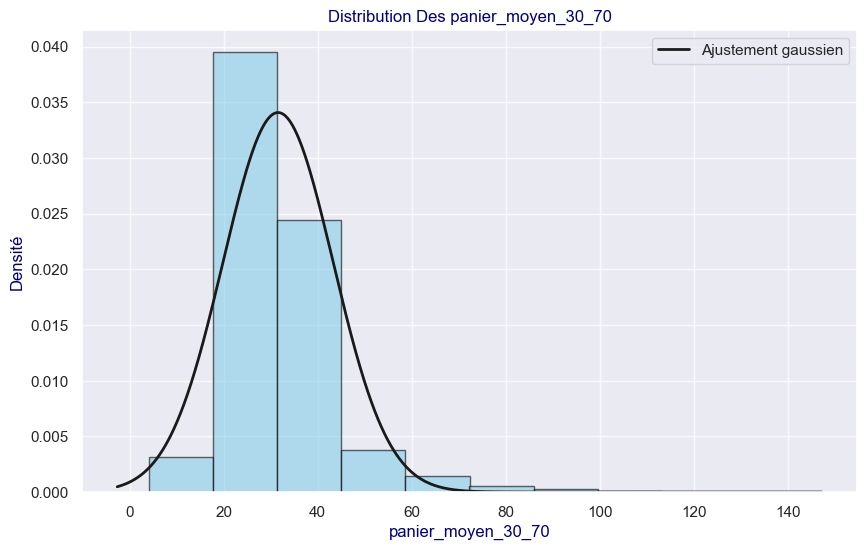

In [133]:
#Visualisation de la distribution des nb_sessions_30_70 :

plt.figure(figsize=(10, 6))
plt.hist(panier_moyen_30_70, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(panier_moyen_30_70)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(panier_moyen_30_70))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution Des panier_moyen_30_70")
plt.xlabel('panier_moyen_30_70')
plt.ylabel('Densité')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

**OBSERVATIONS :**  
La distribution des Paniers moyens pour les 30_70 pourrait respecter une distribution normale .

###### **Test de Kolomogorov-Smirnov**

In [134]:
from scipy.stats import kstest, zscore

# Chargement des données
#age_30_70
#

# Centrage-réduction des séries (normalisation)
age_30_70_norm = zscore(age_30_70)
panier_moyen_30_70_norm = zscore(panier_moyen_30_70)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age, p_value_age = kstest(age_30_70_norm, 'norm')
ks_stat_achat, p_value_achat = kstest(panier_moyen_30_70_norm, 'norm')

# Affichage des résultats
print("Test K-S pour 'age_30_70' :")
print(f"  KS statistic = {ks_stat_age:.4f}, p-value = {p_value_age:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

print("\nTest K-S pour 'panier_moyen_30_70' :")
print(f"  KS statistic = {ks_stat_achat:.4f}, p-value = {p_value_achat:.4f}")
if p_value_achat < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")

Test K-S pour 'age_30_70' :
  KS statistic = 0.0687, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.

Test K-S pour 'panier_moyen_30_70' :
  KS statistic = 0.1316, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


###### Visualisation des données avec un Q-Q plot 30_70

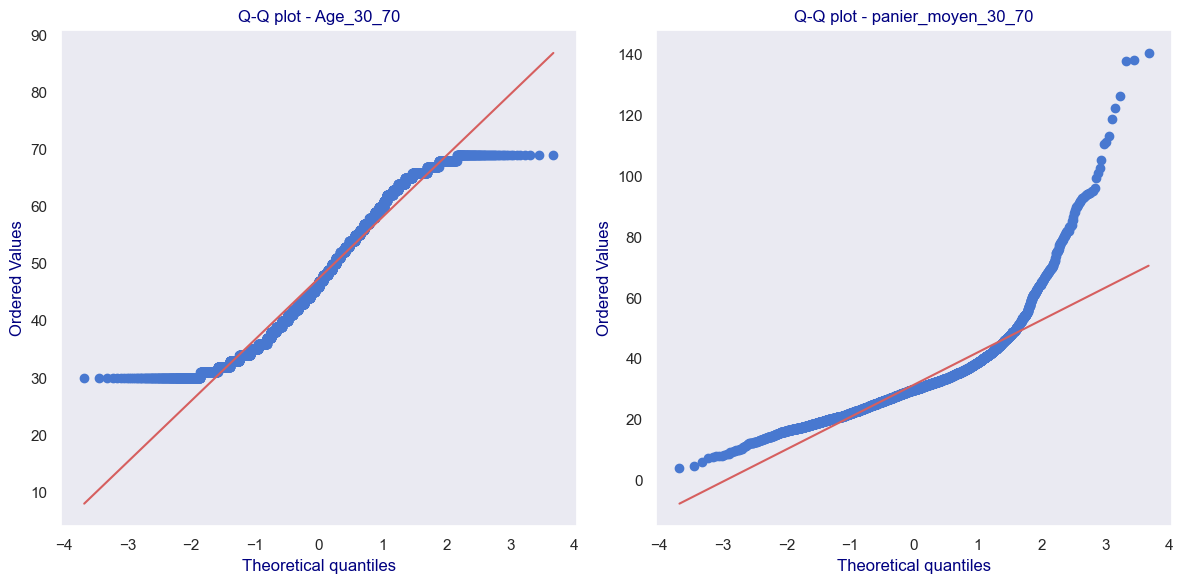

In [135]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age_30_70'
#panier_moyen_30_70

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age_30_70, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age_30_70")

# Q-Q plot pour 'panier_moyen_30_70
st.probplot(panier_moyen_30_70, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - panier_moyen_30_70")

plt.tight_layout()
plt.show()

Les paniers moyens élévés sont trop nombreux pour représenter une distribution normale.

##### **Visualisation de la Tendance du Panier Moyen par Age 30_70:**

<Axes: xlabel='age', ylabel='panier_moyen'>

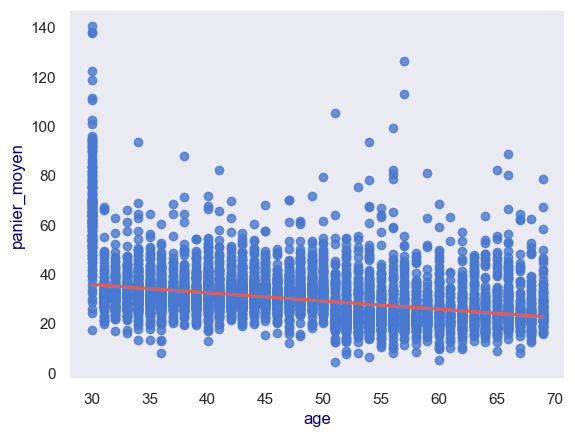

In [136]:
# Visualisation de la tendance pour 30_70
sns.regplot(x=age_30_70, y=panier_moyen_30_70, robust=True, line_kws=dict(color="r"))

##### **Test de Spearman 30_70**

In [137]:
#Test de Spearman_30_70

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age_30_70
#panier_moyen_30_70

# Visualisation de la tendance déjà fait
#sns.regplot(x=age_30_70, y=panier_moyen_30_70, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age_30_70, panier_moyen_30_70)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.44061636782389607
Valeur p: 2.987421727801453e-277


**OBSERVATIONS COMPLEMENTAIRES :**  
Les résultats sont similaires à ceux de l'ensemble de la population :  
p-value inf à 0.05 => H0 rejeté (absence de relation est rejetée) ce n'est pas du au hasard.  

Coeff de Spearman négatif : petite corrélation monotone négative (mais pas nulle); cependant moins marquée que celle de l'ensemble de la population

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4.5 - Etude automatisée (2 var quant) :</h4>
</div>

In [138]:
test_correlation_auto(df_Profil_Client_Achat_1_1,var_quant_1 = 'age',var_quant_2 = 'panier_moyen')


--- Analyse de la relation entre age et panier_moyen ---

age : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale
panier_moyen : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.7006
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅


var_1         var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  panier_moyen          Spearman    -0.700551           0.0   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False       4.921419e-31   Kolmogorov-Smirnov     8596   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False      3.966926e-265   Kolmogorov-Smirnov     8596   

                    conclusion  
0  Corrélation significative ✅


--- Analyse de la relation entre age et panier_moyen ---

age : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale
panier_moyen : n = 8596 | Test = Kolmogorov-Smirnov | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.7006
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅

📈 Visualisation de la relation entre les deux variables...



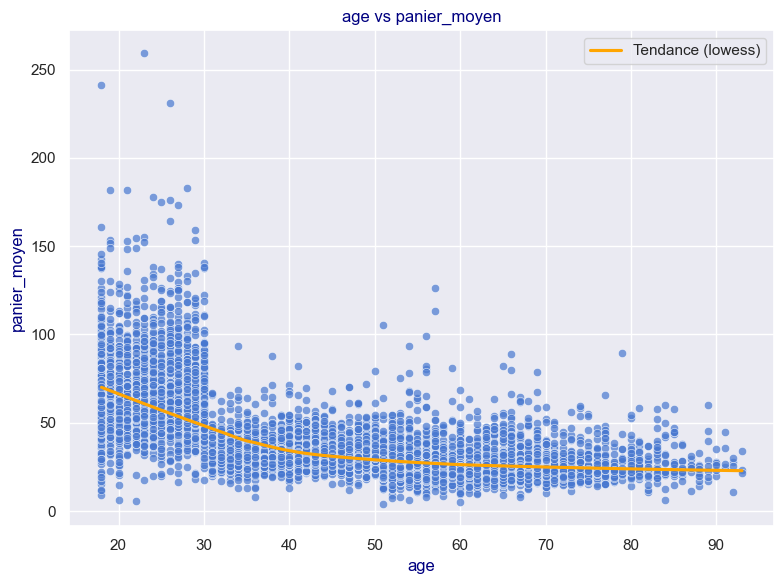

var_1         var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  panier_moyen          Spearman    -0.700551           0.0   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False       4.921419e-31   Kolmogorov-Smirnov     8596   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False      3.966926e-265   Kolmogorov-Smirnov     8596   

                    conclusion  
0  Corrélation significative ✅

In [139]:
test_correlation_auto_et_visualisation(df_Profil_Client_Achat_1_1,var_quant_1 = 'age',var_quant_2 = 'panier_moyen')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.2bis 6.3bis 6.4 bis - Etude en Age Moyen :</h3>
</div>

In [140]:
df_Profil_Client_Achat_1_1.head(2)

client_id  age  total_achat  nb_sessions  panier_moyen
0       c_1   67       629.02           34     18.500588
1      c_10   66      1353.60           34     39.811765

In [141]:
df_Profil_Client_Achat_1_1.columns

Index(['client_id', 'age', 'total_achat', 'nb_sessions', 'panier_moyen'], dtype='object')

In [142]:
df_Profil_Client_Achat_1_1.shape

(8596, 5)

In [143]:
df_Profil_Client_Achat_1_1.dtypes

client_id       string[python]
age                      Int64
total_achat            float64
nb_sessions              Int64
panier_moyen           float64
dtype: object

##### **CREATION d'un DATAFRAME par AGE MOYEN**

In [144]:
df_Profil_Client_Achat_1_1_Age_Moyen = (df_Profil_Client_Achat_1_1.groupby(by=['age'],observed=False)
                                          .agg(total_achat = pd.NamedAgg(column='total_achat',aggfunc='mean'),
                                               nb_sessions = pd.NamedAgg(column='nb_sessions',aggfunc='mean'),
                                               panier_moyen = pd.NamedAgg(column='panier_moyen',aggfunc='mean')
                                               )
                                          .reset_index()
                                          )

display(df_Profil_Client_Achat_1_1_Age_Moyen)

age  total_achat  nb_sessions  panier_moyen
0    18  1410.567849    20.036613     68.622298
1    19  1246.075103    18.034483     70.850664
2    20  1288.219517    18.386207     66.962174
3    21  1449.868560       19.904     73.567231
4    22  1230.794706    18.205882     66.718397
..  ...          ...          ...           ...
71   89   684.728750       29.625     32.248574
72   90   843.196667         34.5     26.661763
73   91   703.862500         24.0     33.002654
74   92  1062.805000        37.75     23.574847
75   93  1083.280000         45.0     26.108047

[76 rows x 4 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.2bis - Corrélation Age / Montant Total des Achats en Age Moyen :</h3>
</div>

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2bis.1 - Etude des distributions Age et Total Achat :</h4>
</div>

In [145]:
# Extraire les colonnes pertinentes
age = df_Profil_Client_Achat_1_1_Age_Moyen['age']
total_achat = df_Profil_Client_Achat_1_1_Age_Moyen['total_achat']

##### **Age**

In [146]:
age.describe()

count         76.0
mean          55.5
std      22.083176
min           18.0
25%          36.75
50%           55.5
75%          74.25
max           93.0
Name: age, dtype: Float64

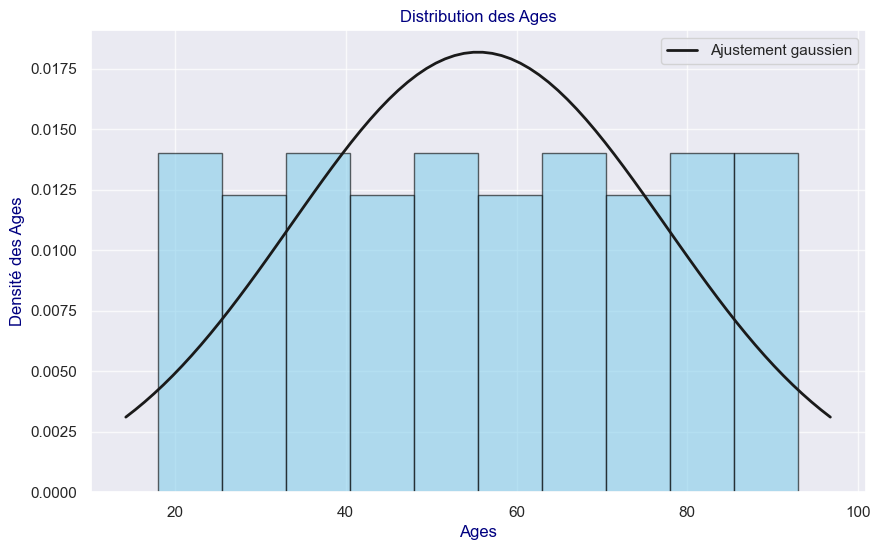

In [147]:
#Visualisation de la distribution des ages :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

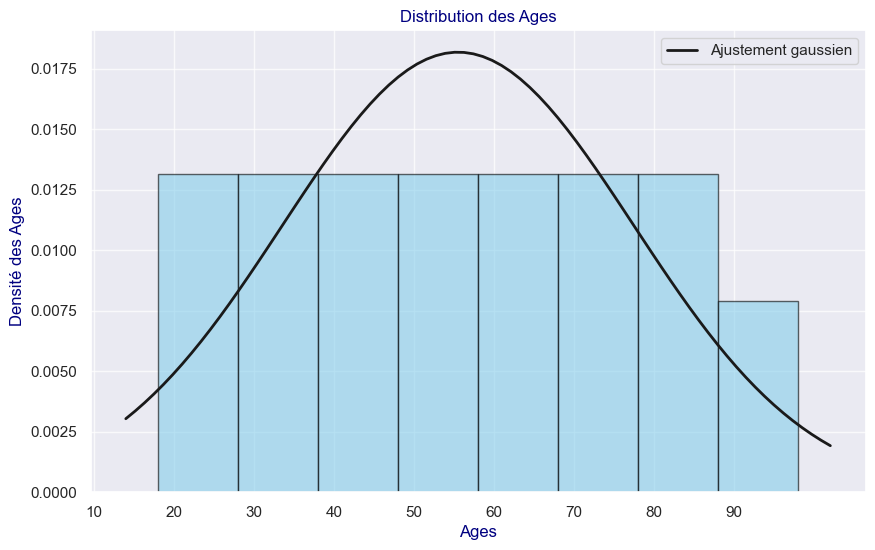

In [148]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=8,range=(18,98), density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

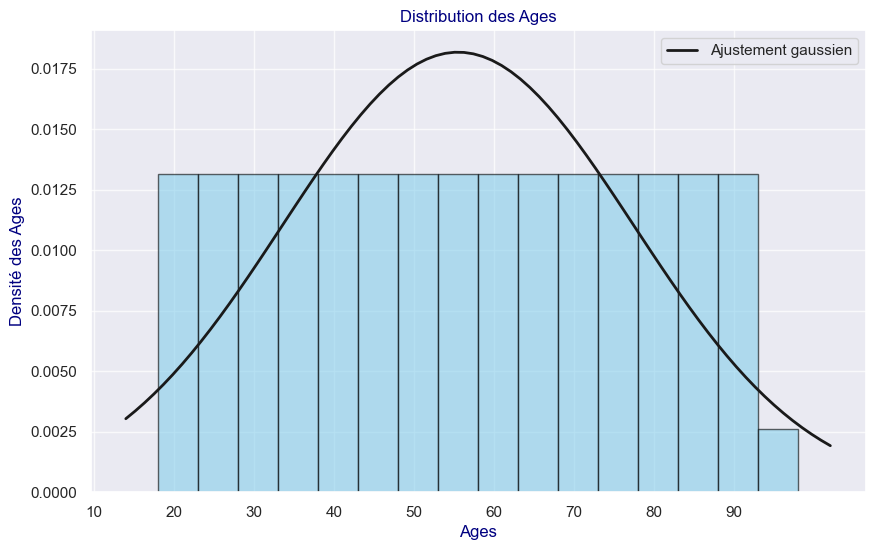

In [149]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=16,range=(18,98), density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Pas étonnannt que les Ages soient distribués de manière monotone : on a au moins une effective par age et donc une ligne par age.

##### **Total Achat**

In [150]:
total_achat.describe()

count      76.000000
mean     1162.369758
std       310.080386
min       618.128750
25%       939.395359
50%      1053.602616
75%      1475.128815
max      1769.851677
Name: total_achat, dtype: float64

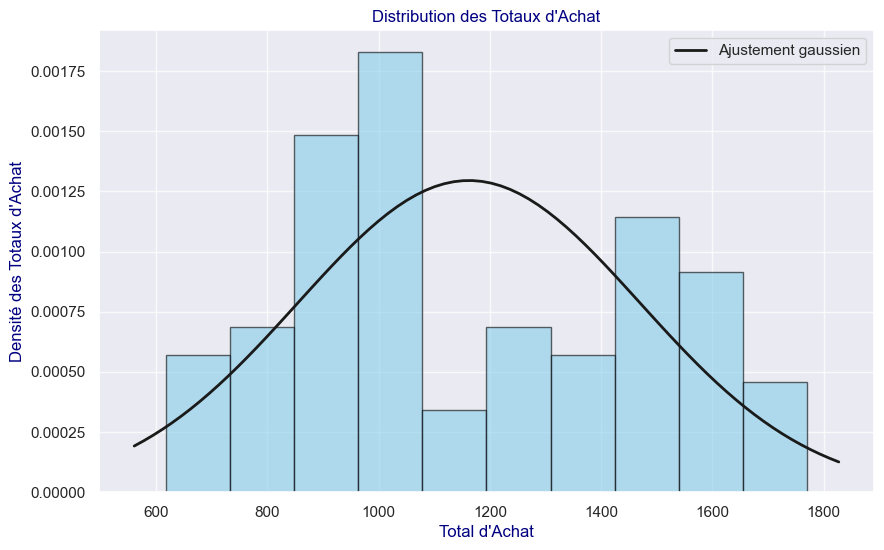

In [151]:
#Visualisation de la distribution des Totaux d'achat :

plt.figure(figsize=(10, 6))
plt.hist(total_achat, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(total_achat)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(total_achat))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution des Totaux d'Achat")
plt.xlabel("Total d'Achat")
plt.ylabel("Densité des Totaux d'Achat")
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

###### **Testons la Normalité : Test de Shapiro : 76 Données Test de Shapiro adapté**

In [152]:
#Testons la Normalité des Ages :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne 'budget voyage annuel'
#age = df['age'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(age)

# Afficher les résultats
print("Taille de mon échantillon:", len(age))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(age))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.9549230726696206
Valeur p : 0.008752885621051844
ShapiroResult(statistic=0.9549230726696206, pvalue=0.008752885621051844)

Les données ne suivent pas une distribution normale (on rejette H0)


In [153]:
#Testons la Normalité des Totaux d'Achat :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne Total d'Achat
#total_achat = df['age'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(total_achat)

# Afficher les résultats
print("Taille de mon échantillon:", len(total_achat))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(total_achat))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.9331919093130201
Valeur p : 0.0006071085431532469
ShapiroResult(statistic=0.9331919093130201, pvalue=0.0006071085431532469)

Les données ne suivent pas une distribution normale (on rejette H0)


Les données de Total d'Achat ne suivent pas un distribution normale !

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 76 (bien inférieur à 2_000) moins précis que Shappiro pour petits effectifs:**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

###### **Visualisation des données avec un Q-Q plot :**

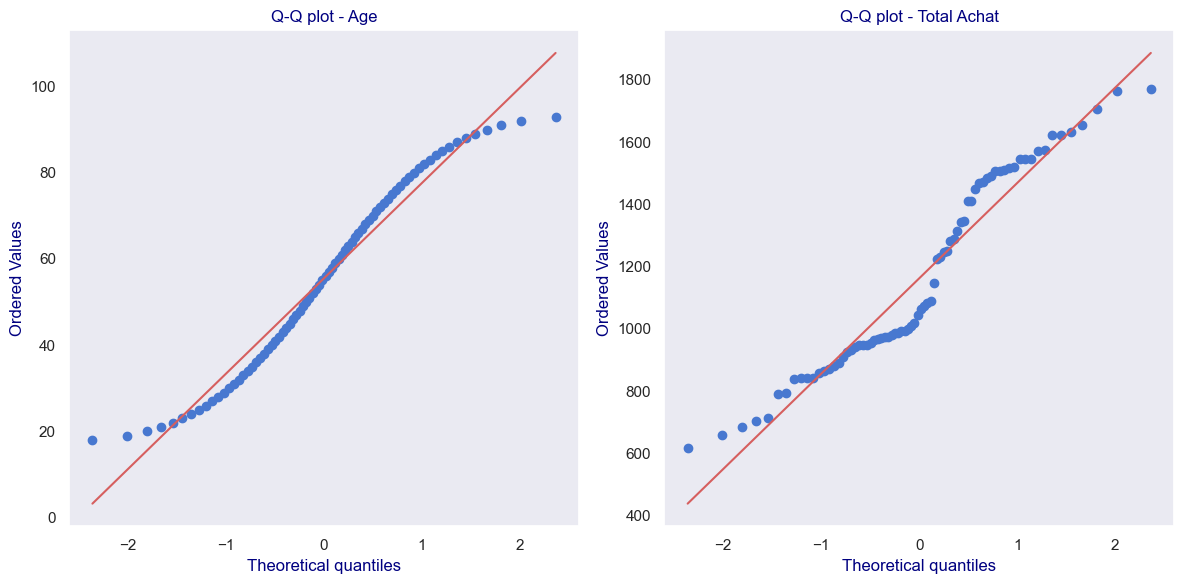

In [154]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age = df_Profil_Client_Achat_1_1_Age_Moyen['age'].dropna()
#total_achat = df_Profil_Client_Achat_1_1_Age_Moyen['total_achat'].dropna()

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age")

# Q-Q plot pour 'total_achat'
st.probplot(total_achat, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Total Achat")

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2bis.2 - Visualisation de la Tendance Total d'Achat par Age :</h4>
</div>

Remarque :  
Il y a trop de points on pourrait regrouper par tranches. 
Mais à ce moment là il ne faut plus faire un scatterplot et une régression linéaire car on ne se base plus sur des vraies points !  
Mieux vaut faire un histogramme?

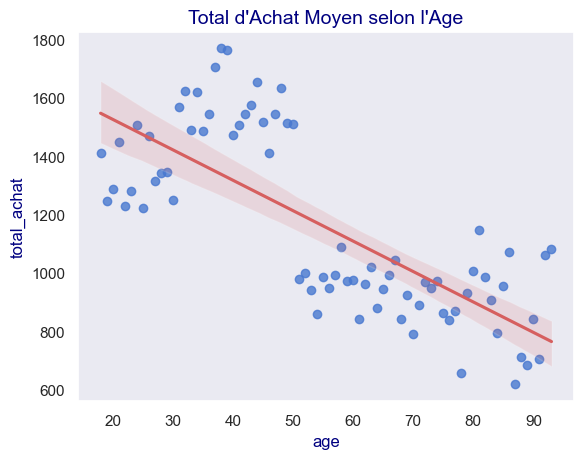

In [155]:
# Visualisation de la tendance
sns.regplot(x=age, y=total_achat, robust=True, line_kws=dict(color="r"))
plt.title("Total d'Achat Moyen selon l'Age",fontdict={'fontsize' : 14, 'color':'navy'})
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2bis.3 - Choix du test :</h4>
</div>

Rappel des conditions pour le Test de Spearman :  
- Les variables doivent être quantitatives : => OK
- Les données doivent être indépendantes : => on peut supposer que une expérience(ligne) client/Totald'Achat est indépendante d'une autre;  
  
- Les données n'ont pas besoin d' une distribution normale=>OK

- La relation entre les variables doit être monotone pas forcément linéaire. (en vrai c'est ce qu'on cherche à vérifier, mais selon la 1ère visualisation, ça part bien).

>Conditions :  
	-2 var quant  
	- expériences indépendantes  
	- Pas de nécessité de Normalité  
	- relation monotone pas forcément linéaire (H0 : pas de correl ; H1 : correl lin)  
  
>calcul de coefficient de corrélation ρ (rho), qui varie entre -1 et 1 :  
•	ρ = 1 : Corrélation positive parfaite.  
•	ρ= −1 : Corrélation négative parfaite.  
•	ρ= 0 : Aucune corrélation.  
  
>p-value inf à 0,05 (H0 rejetée)  

In [156]:
#Test de Spearman

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age
#total_achat

# Visualisation de la tendance déjà fait
#sns.regplot(x=age, y=total_achat, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age, total_achat)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.7276555023923446
Valeur p: 9.644786855635588e-14


##### **OBSERVATIONS :**
la p-value est inférieure à 0.05, et donc l'hypothèse H0 (pas de relation est rejetée).  

Le coefficient de corrélation de Spearman est négatif (-0.72) : ce qui signifie que plus on est agé moins on dépense.  
Le coefficient de corrélation de Spearman est assez fort (0.7 en valeur absolue), donc cette tendance est assez nette.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.2bis.5 - Etude automatisée (2 var quant) :</h4>
</div>

In [157]:
test_correlation_auto(df_Profil_Client_Achat_1_1_Age_Moyen , var_quant_1 = 'age',var_quant_2 = 'total_achat')


--- Analyse de la relation entre age et total_achat ---

age : n = 76 | Test = Shapiro-Wilk | p = 0.0088 => ❌ Non normale
total_achat : n = 76 | Test = Shapiro-Wilk | p = 0.0006 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.7277
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅


var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  total_achat          Spearman    -0.727656  9.644787e-14   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False           0.008753         Shapiro-Wilk       76   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False           0.000607         Shapiro-Wilk       76   

                    conclusion  
0  Corrélation significative ✅


--- Analyse de la relation entre age et total_achat ---

age : n = 76 | Test = Shapiro-Wilk | p = 0.0088 => ❌ Non normale
total_achat : n = 76 | Test = Shapiro-Wilk | p = 0.0006 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.7277
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅

📈 Visualisation de la relation entre les deux variables...



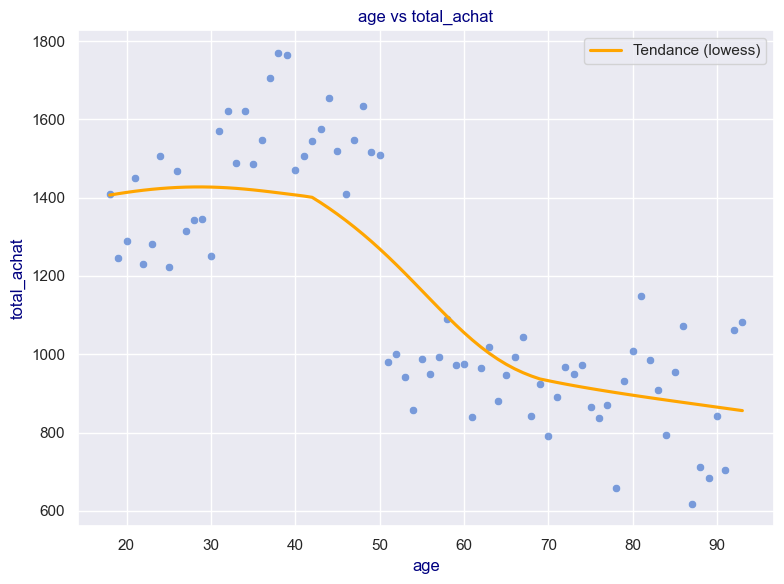

var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  total_achat          Spearman    -0.727656  9.644787e-14   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False           0.008753         Shapiro-Wilk       76   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False           0.000607         Shapiro-Wilk       76   

                    conclusion  
0  Corrélation significative ✅

In [158]:
test_correlation_auto_et_visualisation(df_Profil_Client_Achat_1_1_Age_Moyen , var_quant_1 = 'age',var_quant_2 = 'total_achat')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.3bis - Corrélation Age / fréquence d'Achat EN AGE MOYEN:</h3>
</div>

In [159]:
df_Profil_Client_Achat_1_1_Age_Moyen.head(3)
                              

age  total_achat  nb_sessions  panier_moyen
0   18  1410.567849    20.036613     68.622298
1   19  1246.075103    18.034483     70.850664
2   20  1288.219517    18.386207     66.962174

In [160]:
df_Profil_Client_Achat_1_1_Age_Moyen.shape

(76, 4)

In [161]:
df_Profil_Client_Achat_1_1_Age_Moyen.columns

Index(['age', 'total_achat', 'nb_sessions', 'panier_moyen'], dtype='object')

In [162]:
# Extraire les colonnes pertinentes
#age = df_Profil_Client_Achat_1_1_Age_Moyen['age'] #deja extraite
nb_sessions = df_Profil_Client_Achat_1_1_Age_Moyen['nb_sessions']

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3bis.1 - Etude des distributions Age et Fréquence d'Achat(Nb de sessions) :</h4>
</div>

##### **Age**

In [163]:
age.describe()

count         76.0
mean          55.5
std      22.083176
min           18.0
25%          36.75
50%           55.5
75%          74.25
max           93.0
Name: age, dtype: Float64

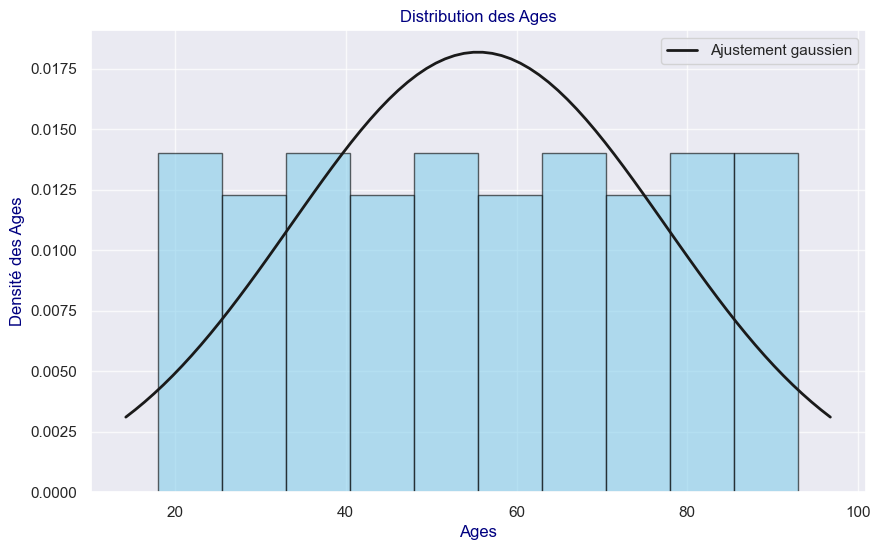

In [164]:
#Visualisation de la distribution des Age:

plt.figure(figsize=(10, 6))
plt.hist(age, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Les dépenses pourraient être distribuées normalement (avec une nuance pour les premières tranches).

##### **Nombre de Sessions**

In [165]:
nb_sessions.describe()

count         76.0
mean      37.23538
std      10.602426
min      17.172185
25%      31.606029
50%      38.982447
75%      45.421698
max       55.82716
Name: nb_sessions, dtype: Float64

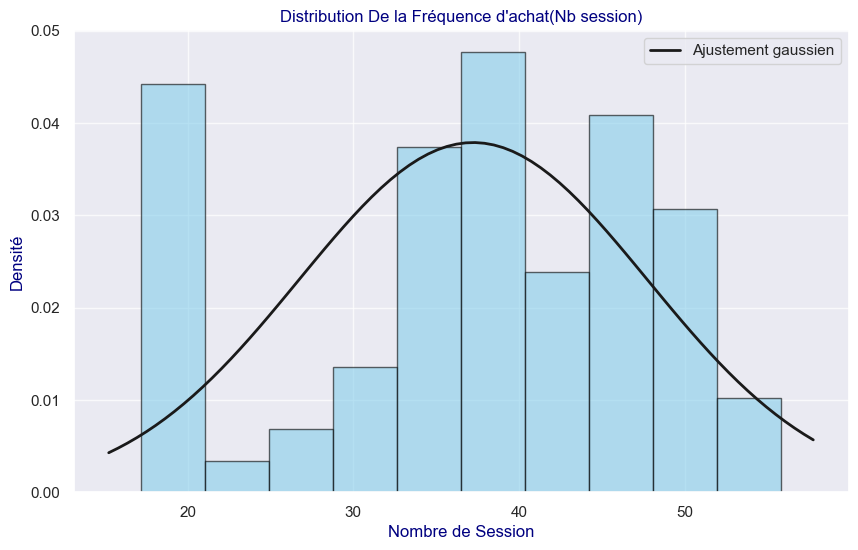

In [166]:
#Visualisation de la distribution des Nbre de sessions :

plt.figure(figsize=(10, 6))
plt.hist(nb_sessions, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(nb_sessions)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(nb_sessions))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution De la Fréquence d'achat(Nb session)")
plt.xlabel("Nombre de Session")
plt.ylabel("Densité")
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

###### **Testons la Normalité : Test de Shapiro : 76 Données Test de Shapiro adapté**

In [167]:
#Testons la Normalité des Ages :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne 'budget voyage annuel'
#age = df['age'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(age)

# Afficher les résultats
print("Taille de mon échantillon:", len(age))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(age))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.9549230726696206
Valeur p : 0.008752885621051844
ShapiroResult(statistic=0.9549230726696206, pvalue=0.008752885621051844)

Les données ne suivent pas une distribution normale (on rejette H0)


In [168]:
#Testons la Normalité du Nbre de Sessions :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne Nbre de sessions
#nb_sessions

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(nb_sessions)

# Afficher les résultats
print("Taille de mon échantillon:", len(nb_sessions))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(nb_sessions))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.9333501966830072
Valeur p : 0.0006182225372292466
ShapiroResult(statistic=0.9333501966830072, pvalue=0.0006182225372292466)

Les données ne suivent pas une distribution normale (on rejette H0)


Les données de Nbre de Sessions ne suivent pas un distribution normale !

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 76 (bien inférieur à 2_000) moins précis que Shappiro pour petits effectifs:**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

POur l'age et pour nb_sessions,  
Nous rejetons H0 et donc la normalité (p_value<0.05)

###### **Visualisation des données avec un Q-Q plot :**

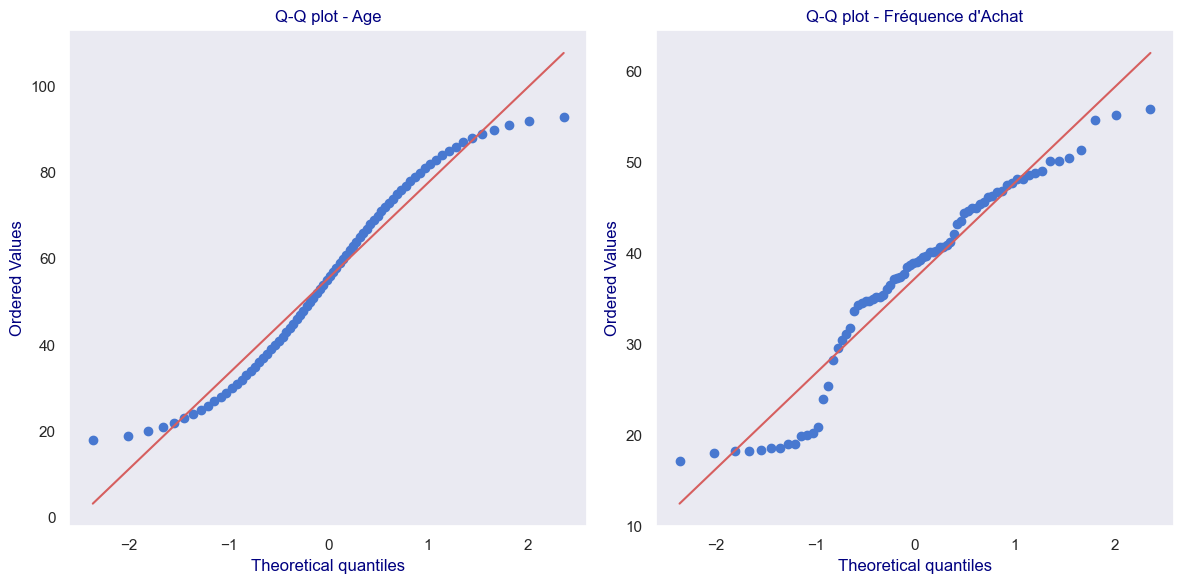

In [169]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age
#nb_sessions

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age")

# Q-Q plot pour 'total_achat'
st.probplot(nb_sessions, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Fréquence d'Achat")

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3bis.2 - Visualisation de la Tendance Fréquence d'Achat par Age :</h4>
</div>

Remarque :  
Il y a trop de points on pourrait regrouper par tranches.  
Mais à ce moment là il ne faut plus faire un scatterplot et une régression linéaire car on ne se base plus sur des vraies points !  
Mieux vaut faire un histogramme?

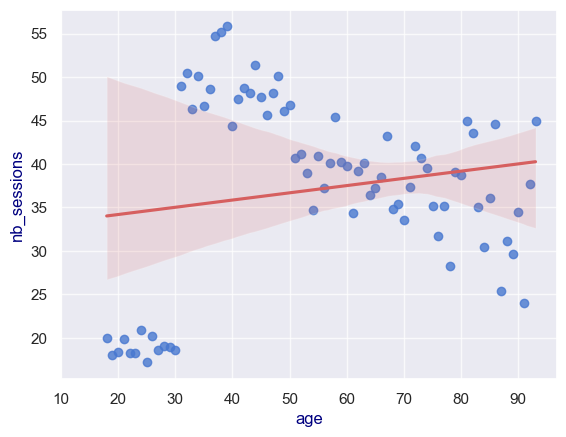

In [170]:
# Visualisation de la tendance
sns.regplot(x=age, y=nb_sessions, robust=True, line_kws=dict(color="r"))
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

##### **OBSERVATIONS :**  
On n'a pas du tout l'impression d'avoir une corrélation (peut être quand même une fréquence d'achat plus élévée entre 30 et 50 ans et diminuant pour eds ages plus élevés.  
On a un phénomène étonnant de seuil après 31 ou 32 ans ou le nb de session explose d'un coup.  
Ce qui peut être expliqué par le fait que c'est un âge ou on commence à être stabilisée et avoir un métier qui nous donne plus de liberté d'achat.  
La présence d'enfant aussi qui implique l'achat pour toute la famille (et notamment de beaucoup de livres d'enfants).  
Les données sont peut-être biaisée, ou peut-ête en étant inventée pour l'exercice il ya une anomalie.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3bis.3 - Choix du test :</h4>
</div>

Rappel des conditions pour le Test de Spearman :  
- Les variables doivent être quantitatives : => OK
- Les données doivent être indépendantes : => on peut supposer que une expérience(ligne) client/Fqce d'Achat est indépendante d'une autre;  
  
- Les données n'ont pas besoin d' une distribution normale=>OK

- La relation entre les variables doit être monotone pas forcément linéaire. (en vrai c'est ce qu'on cherche à vérifier, mais selon la 1ère visualisation, ça part bien).

>Conditions :  
	-2 var quant  
	- expériences indépendantes  
	- Pas de nécessité de Normalité  
	- relation monotone pas forcément linéaire (H0 : pas de correl ; H1 : correl lin)  
  
>calcul de coefficient de corrélation ρ (rho), qui varie entre -1 et 1 :  
•	ρ = 1 : Corrélation positive parfaite.  
•	ρ= −1 : Corrélation négative parfaite.  
•	ρ= 0 : Aucune corrélation.  
  
>p-value inf à 0,05 (H0 rejetée)  

In [171]:
#Test de Spearman

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age
#nb_sessions

# Visualisation de la tendance déjà fait
#sns.regplot(x=age, y=nb_sessions, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age, nb_sessions)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.003144245688697435
Valeur p: 0.978494293789479


##### **OBSERVATIONS :**
Contrairement à l'étude par client (et non regroupée par age),  
la p-value est est de 0.97 , et donc l'hypothèse H0 pas de relation est très probable.(H1 une relation existe est rejetée)  

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.3bis.5 - Etude automatisée (2 var quant) :</h4>
</div>

In [172]:
test_correlation_auto(df_Profil_Client_Achat_1_1_Age_Moyen , var_quant_1 = 'age',var_quant_2 = 'nb_sessions')


--- Analyse de la relation entre age et nb_sessions ---

age : n = 76 | Test = Shapiro-Wilk | p = 0.0088 => ❌ Non normale
nb_sessions : n = 76 | Test = Shapiro-Wilk | p = 0.0006 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.0031
  p-value     : 0.9785
  ➤ Conclusion : Corrélation non significative ❌


var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  nb_sessions          Spearman    -0.003144      0.978494   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False           0.008753         Shapiro-Wilk       76   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False           0.000618         Shapiro-Wilk       76   

                        conclusion  
0  Corrélation non significative ❌


--- Analyse de la relation entre age et nb_sessions ---

age : n = 76 | Test = Shapiro-Wilk | p = 0.0088 => ❌ Non normale
nb_sessions : n = 76 | Test = Shapiro-Wilk | p = 0.0006 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.0031
  p-value     : 0.9785
  ➤ Conclusion : Corrélation non significative ❌

📈 Visualisation de la relation entre les deux variables...



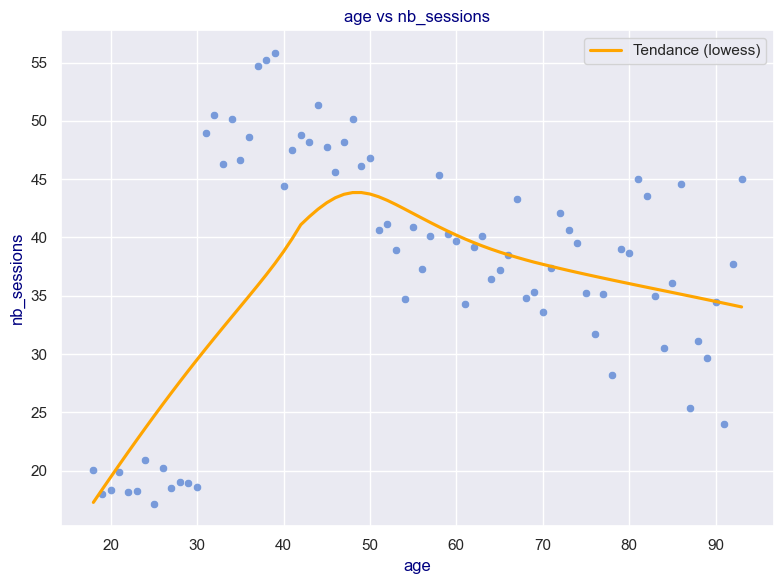

var_1        var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  nb_sessions          Spearman    -0.003144      0.978494   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False           0.008753         Shapiro-Wilk       76   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False           0.000618         Shapiro-Wilk       76   

                        conclusion  
0  Corrélation non significative ❌

In [173]:
test_correlation_auto_et_visualisation(df_Profil_Client_Achat_1_1_Age_Moyen , var_quant_1 = 'age',var_quant_2 = 'nb_sessions')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.4bis - Corrélation Age / Taille du Panier Moyen EN AGE MOYEN:</h3>
</div>

In [174]:
df_Profil_Client_Achat_1_1_Age_Moyen.head(3)

age  total_achat  nb_sessions  panier_moyen
0   18  1410.567849    20.036613     68.622298
1   19  1246.075103    18.034483     70.850664
2   20  1288.219517    18.386207     66.962174

In [175]:
df_Profil_Client_Achat_1_1_Age_Moyen.shape

(76, 4)

In [176]:
df_Profil_Client_Achat_1_1_Age_Moyen.columns

Index(['age', 'total_achat', 'nb_sessions', 'panier_moyen'], dtype='object')

In [177]:
# Extraire les colonnes pertinentes
#age = df_Profil_Client_Achat_1_1_Age_Moyen['age'] #deja extraite
panier_moyen = df_Profil_Client_Achat_1_1_Age_Moyen['panier_moyen']

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4bis.1 - Etude des distributions Age et Taille du Panier Moyen EN AGE MOYEN :</h4>
</div>

##### **Age**

In [178]:
age.describe()

count         76.0
mean          55.5
std      22.083176
min           18.0
25%          36.75
50%           55.5
75%          74.25
max           93.0
Name: age, dtype: Float64

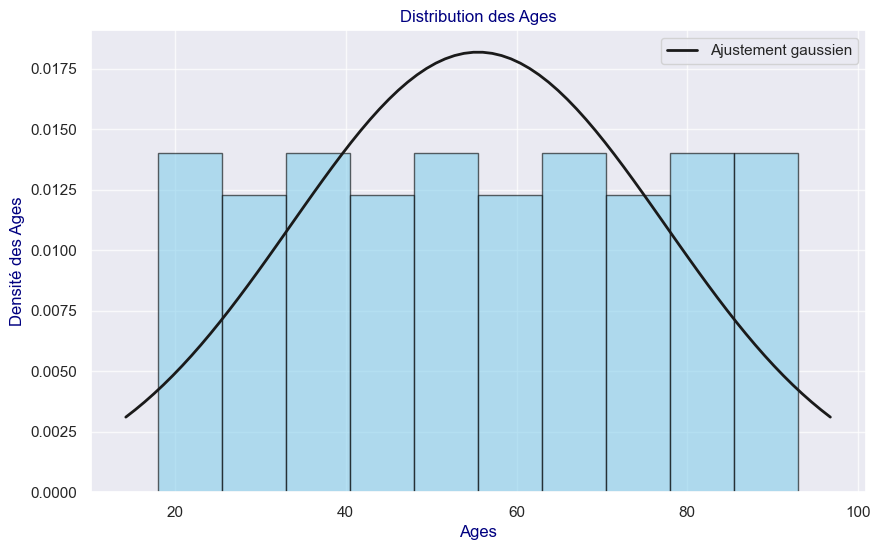

In [179]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(age, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

Les dépenses pourraient être distribuées normalement (avec une nuance pour les premières tranches).

##### **Taille du Panier Moyen**

In [180]:
panier_moyen.describe()

count    76.000000
mean     35.733751
std      15.862147
min      22.539245
25%      26.159419
50%      28.864917
75%      33.331393
max      73.567231
Name: panier_moyen, dtype: float64

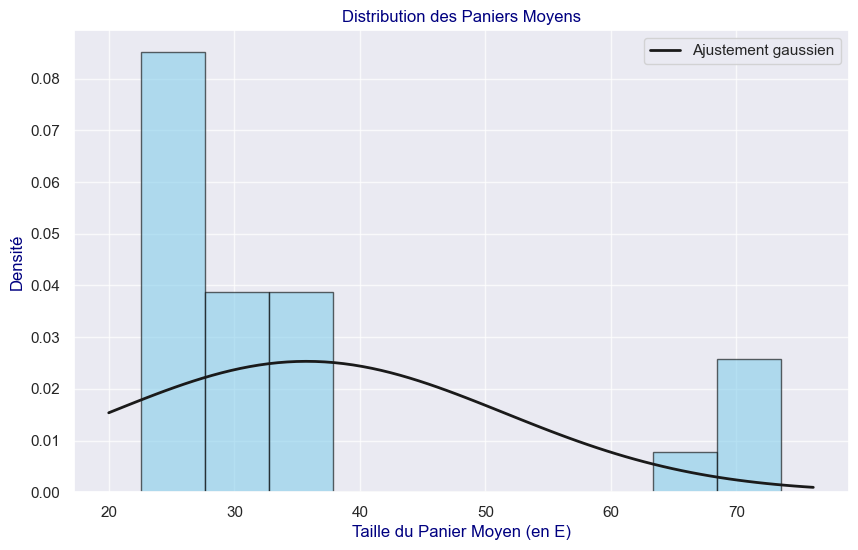

In [181]:
#Visualisation de la distribution des dépense publicitaires :

plt.figure(figsize=(10, 6))
plt.hist(panier_moyen, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(panier_moyen)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(panier_moyen))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution des Paniers Moyens")
plt.xlabel("Taille du Panier Moyen (en E)")
plt.ylabel("Densité")
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

La Taille des paniers moyenrs ne semble pas être distribuée normalement.

###### **Testons la Normalité : Test de Shapiro : 76 Données Test de Shapiro adapté**

In [182]:
#Testons la Normalité des Ages :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne 'budget voyage annuel'
#age = df['age'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(age)

# Afficher les résultats
print("Taille de mon échantillon:", len(age))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(age))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.9549230726696206
Valeur p : 0.008752885621051844
ShapiroResult(statistic=0.9549230726696206, pvalue=0.008752885621051844)

Les données ne suivent pas une distribution normale (on rejette H0)


In [183]:
#Testons la Normalité du panier_moyen :

#IMPORTS :
#import pandas as pd
#from scipy.stats import shapiro #déjà importé

# Extraire la colonne Nbre de sessions
#panier_moyen

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(panier_moyen)

# Afficher les résultats
print("Taille de mon échantillon:", len(panier_moyen))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")
print(shapiro(panier_moyen))
print()
# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.6448574455683059
Valeur p : 2.8767807130761246e-12
ShapiroResult(statistic=0.6448574455683059, pvalue=2.8767807130761246e-12)

Les données ne suivent pas une distribution normale (on rejette H0)


Les données du panier_moyen ne suivent pas un distribution normale !

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 76 (bien inférieur à 2_000) moins précis que Shappiro pour petits effectifs:**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

###### **Visualisation des données avec un Q-Q plot :**

###### **Visualisation des données avec un Q-Q plot :**

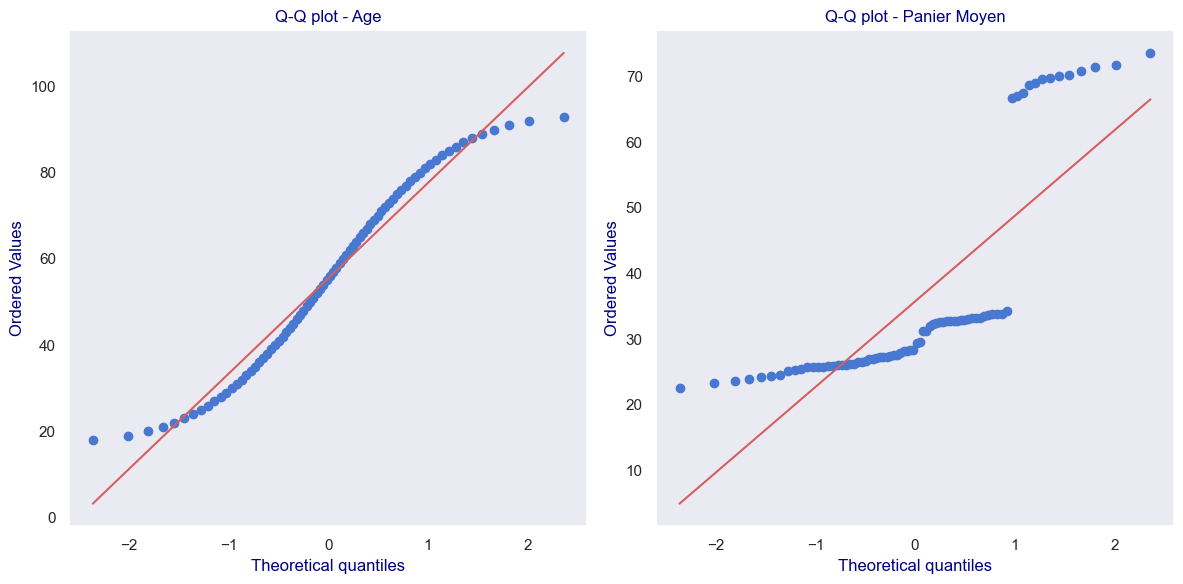

In [184]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Données : age et total_achat
#age = df_Profil_Client_Achat_1_1_Age_Moyen['age'].dropna()
#panier_moyen = df_Profil_Client_Achat_1_1_Age_Moyen['panier_moyen'].dropna()

# Création des Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot pour 'age'
st.probplot(age, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q plot - Age")

# Q-Q plot pour 'total_achat'
st.probplot(panier_moyen, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q plot - Panier Moyen")

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4bis.2 - Visualisation de la Tendance du Panier MOyen :</h4>
</div>

Remarque :  
Il y a trop de points on pourrait regrouper par tranches.  
Mais à ce moment là il ne faut plus faire un scatterplot et une régression linéaire car on ne se base plus sur des vraies points !  
Mieux vaut faire un histogramme?

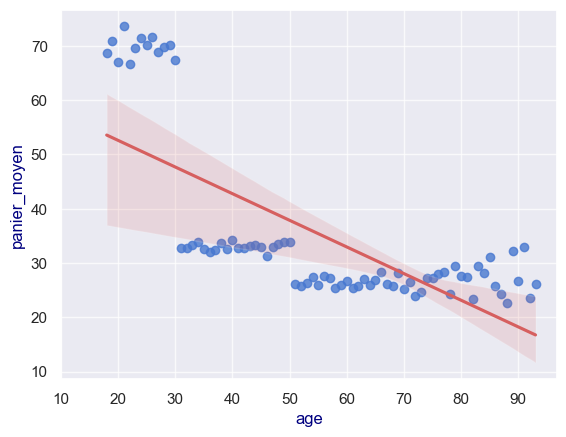

In [185]:
# Visualisation de la tendance
sns.regplot(x=age, y=panier_moyen, robust=True, line_kws=dict(color="r"))
plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

##### **OBSERVATIONS :**  
On a encore une fois un phénomène très différent enrte 18 et 30 ans et entre 30 ans et plus.  
On n'a pas de corrélation globale.  
Peut-être une légère tendance à a voir un panier moyen plus faible lorsque l'age augmente

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4bis.3 - Choix du test :</h4>
</div>

Rappel des conditions pour le Test de Spearman :  
- Les variables doivent être quantitatives : => OK
- Les données doivent être indépendantes : => on peut supposer que une expérience(ligne) client/Fqce d'Achat est indépendante d'une autre;  
  
- Les données n'ont pas besoin d' une distribution normale=>OK

- La relation entre les variables doit être monotone pas forcément linéaire. (en vrai c'est ce qu'on cherche à vérifier, mais selon la 1ère visualisation, ça part bien).

>Conditions :  
	-2 var quant  
	- expériences indépendantes  
	- Pas de nécessité de Normalité  
	- relation monotone pas forcément linéaire (H0 : pas de correl ; H1 : correl lin)  
  
>calcul de coefficient de corrélation ρ (rho), qui varie entre -1 et 1 :  
•	ρ = 1 : Corrélation positive parfaite.  
•	ρ= −1 : Corrélation négative parfaite.  
•	ρ= 0 : Aucune corrélation.  
  
>p-value inf à 0,05 (H0 rejetée)  

In [186]:
#Test de Spearman

#Import si pas déjà fait
#from scipy.stats import spearmanr
#import seaborn as sns

# Extraire les colonnes pertinentes
#age
#panier_moyen

# Visualisation de la tendance déjà fait
#sns.regplot(x=age, y=panier_moyen, robust=True, line_kws=dict(color="r"))

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(age, panier_moyen)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.7534107997265892
Valeur p: 4.086104692108804e-15


##### **OBSERVATIONS :**
la p-value est inférieure à 0.05, et donc l'hypothèse H0 (pas de relation est rejetée).  

Le coefficient de corrélation de Spearman est négatif (-0.75) :  
ce qui signifie que plus on est agé plus la taile du panier est faible.  
Avec une valeur absolue de 0.75 la tendance est assez nette.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4bis.4 - Etude recentrée sur les 30_70 ans :</h4>
</div>

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.4bis.5 - Etude automatisée (2 var quant) :</h4>
</div>

In [187]:
test_correlation_auto(df_Profil_Client_Achat_1_1_Age_Moyen , var_quant_1 = 'age',var_quant_2 = 'panier_moyen')


--- Analyse de la relation entre age et panier_moyen ---

age : n = 76 | Test = Shapiro-Wilk | p = 0.0088 => ❌ Non normale
panier_moyen : n = 76 | Test = Shapiro-Wilk | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.7534
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅


var_1         var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  panier_moyen          Spearman    -0.753411  4.086105e-15   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False           0.008753         Shapiro-Wilk       76   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False       2.876781e-12         Shapiro-Wilk       76   

                    conclusion  
0  Corrélation significative ✅


--- Analyse de la relation entre age et panier_moyen ---

age : n = 76 | Test = Shapiro-Wilk | p = 0.0088 => ❌ Non normale
panier_moyen : n = 76 | Test = Shapiro-Wilk | p = 0.0000 => ❌ Non normale

❗️ Au moins une variable n’est pas normale → Test de Spearman sélectionné.

Test de corrélation : Spearman
  Coefficient : -0.7534
  p-value     : 0.0000
  ➤ Conclusion : Corrélation significative ✅

📈 Visualisation de la relation entre les deux variables...



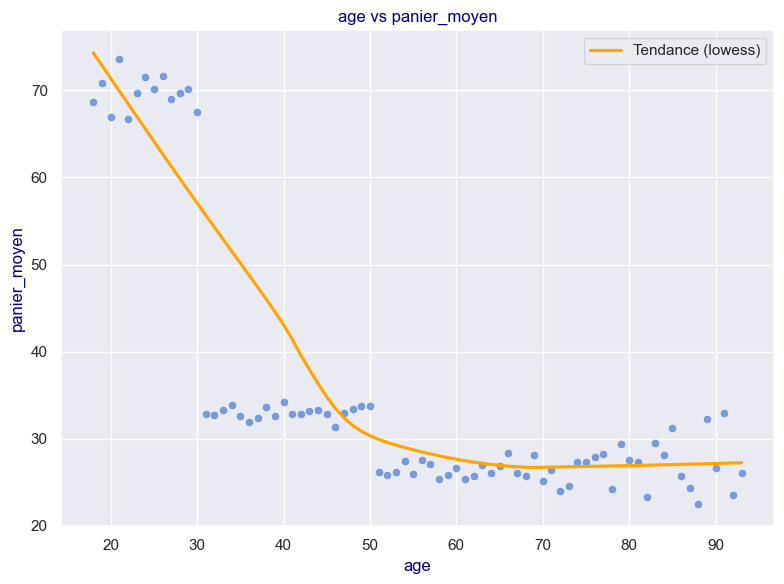

var_1         var_2 test_corr_utilise  correlation  p_value_corr  \
0   age  panier_moyen          Spearman    -0.753411  4.086105e-15   

   var_1_normale  p_var_1_normalite test_var_1_normalite  n_var_1  \
0          False           0.008753         Shapiro-Wilk       76   

   var_2_normale  p_var_2_normalite test_var_2_normalite  n_var_2  \
0          False       2.876781e-12         Shapiro-Wilk       76   

                    conclusion  
0  Corrélation significative ✅

In [188]:
test_correlation_auto_et_visualisation(df_Profil_Client_Achat_1_1_Age_Moyen , var_quant_1 = 'age',var_quant_2 = 'panier_moyen')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.2ter 6.3ter 6.4 ter - Etude par Tranche :</h3>
</div>

In [189]:
df_Profil_Client_Achat_1_1.head(2)

client_id  age  total_achat  nb_sessions  panier_moyen
0       c_1   67       629.02           34     18.500588
1      c_10   66      1353.60           34     39.811765

In [190]:
df_Profil_Client_Achat_1_1.columns

Index(['client_id', 'age', 'total_achat', 'nb_sessions', 'panier_moyen'], dtype='object')

In [191]:
df_Profil_Client_Achat_1_1.shape

(8596, 5)

In [192]:
df_Profil_Client_Achat_1_1.dtypes

client_id       string[python]
age                      Int64
total_achat            float64
nb_sessions              Int64
panier_moyen           float64
dtype: object

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.234ter.1 - Etude par Tranche d'age détaillée (VISUALISATION) :</h4>
</div>

##### **CREATION D'UNE COLONNE tranche_age :**

In [193]:

# Définition des bornes et des labels
bornes = [18, 25, 30, 40, 50, 60, 70, 101]  # Attention : la dernière borne est exclusive
labels = ['18-24', '25-29', '30-39', '40-49', '50-59', '60-69', '70-100']

# Ajout de la colonne tranche d'âge
df_Profil_Client_Achat_1_1['tranche_age'] = pd.cut( df_Profil_Client_Achat_1_1['age'],
                                                   bins=bornes,
                                                   labels=labels,
                                                   right=False,  # [18-25[ bornes inclusives à gauche, exclusives à droite
                                                   )

# afficher les premières lignes pour vérification
df_Profil_Client_Achat_1_1[['client_id', 'age', 'tranche_age']].head()

client_id  age tranche_age
0       c_1   67       60-69
1      c_10   66       60-69
2     c_100   30       30-39
3    c_1000   56       50-59
4    c_1001   40       40-49

In [194]:
df_Profil_Client_Achat_1_1.head(2)

client_id  age  total_achat  nb_sessions  panier_moyen tranche_age
0       c_1   67       629.02           34     18.500588       60-69
1      c_10   66      1353.60           34     39.811765       60-69

##### **CREATION d'un DATAFRAME par TRANCHE D'AGE**

In [195]:
df_Profil_Client_Achat_1_1_Tranche_age = (df_Profil_Client_Achat_1_1.groupby(by=['tranche_age'],observed=False)
                                          .agg(total_achat_moy = pd.NamedAgg(column='total_achat',aggfunc='mean'),
                                               nb_sessions_moy = pd.NamedAgg(column='nb_sessions',aggfunc='mean'),
                                               panier_moyen_moy = pd.NamedAgg(column='panier_moyen',aggfunc='mean')
                                               )
                                          .reset_index()
                                          )

display(df_Profil_Client_Achat_1_1_Tranche_age)

tranche_age  total_achat_moy  nb_sessions_moy  panier_moyen_moy
0       18-24      1357.302120        19.292284         69.401129
1       25-29      1343.200188        18.844417         70.138247
2       30-39      1573.598085        46.948936         36.794185
3       40-49      1540.572765        47.849292         33.090301
4       50-59      1023.925373        40.492403         27.131607
5       60-69       949.719257        38.081269         26.713753
6      70-100       898.039122         36.90755         26.485436

**ATTENTION :**  
Maintenant il faut faire une étude avec 1 var QUAL (tranche age) 1 var QUANT

Une visualisation en attendant pour voir :

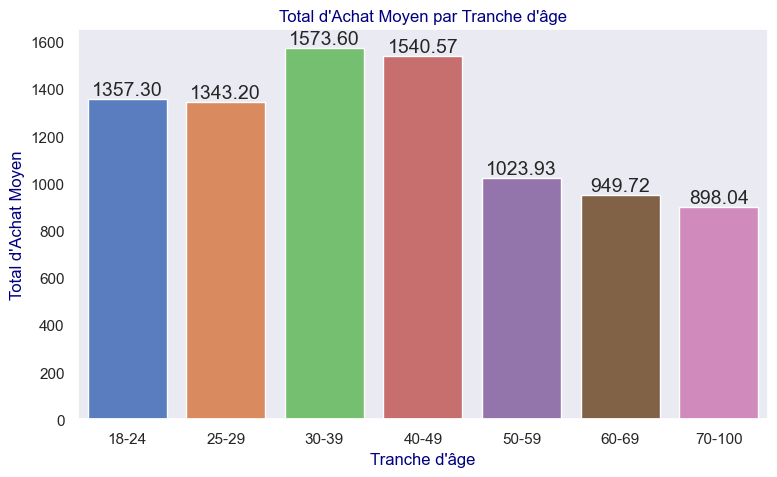

In [196]:
#Total d'Achat moyen par Tranche d'age :
df_graph = df_Profil_Client_Achat_1_1_Tranche_age.loc[:,:]

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_graph, 
                 x="tranche_age", 
                 y="total_achat_moy",
                 hue="tranche_age"#,palette = palette_fixe_categ
                )

for x in range(0,len(df_graph["tranche_age"])) :
    ax.bar_label(ax.containers[x], fmt='%.2f')

plt.title("Total d'Achat Moyen par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Total d'Achat Moyen")
plt.tight_layout()
plt.show()

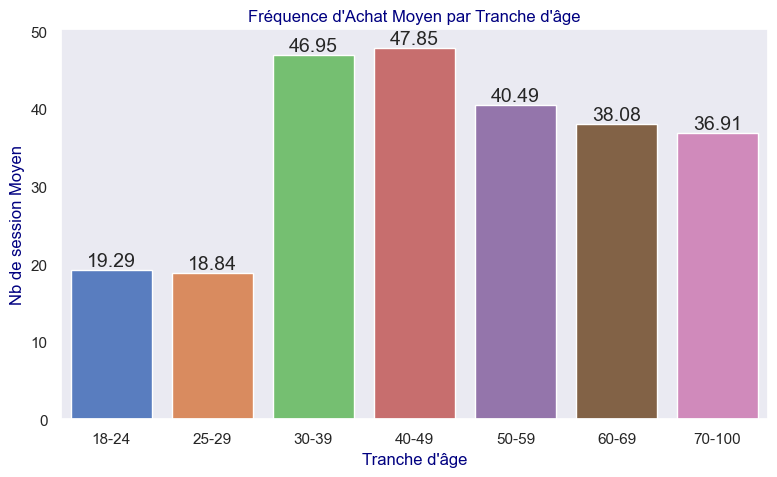

In [197]:
#Fréquence d'Achat moyen par Tranche d'age :
df_graph = df_Profil_Client_Achat_1_1_Tranche_age.loc[:,:]

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_graph, 
                 x="tranche_age", 
                 y="nb_sessions_moy",
                 hue="tranche_age"#,palette = palette_fixe_categ
                )

for x in range(0,len(df_graph["tranche_age"])) :
    ax.bar_label(ax.containers[x], fmt='%.2f')

plt.title("Fréquence d'Achat Moyen par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nb de session Moyen")
plt.tight_layout()
plt.show()

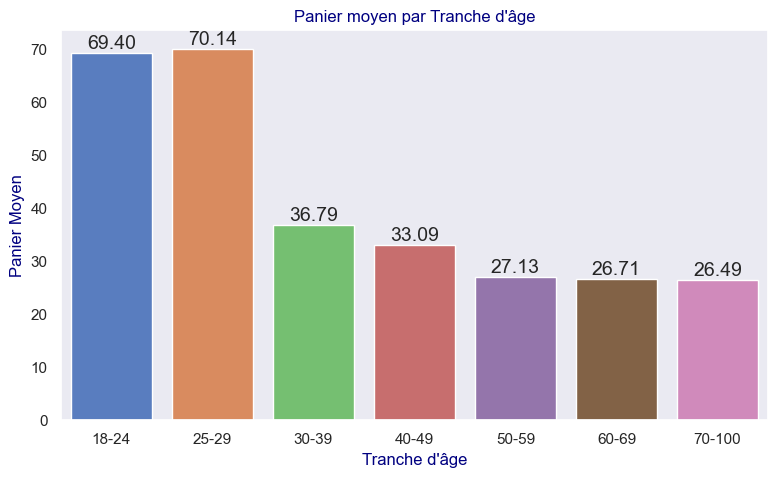

In [198]:
#Panier moyen par Tranche d'age :
df_graph = df_Profil_Client_Achat_1_1_Tranche_age.loc[:,:]

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_graph, 
                 x="tranche_age", 
                 y="panier_moyen_moy",
                 hue="tranche_age"#,palette = palette_fixe_categ
                )

for x in range(0,len(df_graph["tranche_age"])) :
    ax.bar_label(ax.containers[x], fmt='%.2f')

plt.title("Panier moyen par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier Moyen")
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.234ter.2 - Etude par Tranche d'age ciblée après premières analyses :</h4>
</div>

##### **CREATION D'UNE COLONNE tranche_age :**

In [199]:

# Définition des bornes et des labels
bornes = [18, 30, 50, 101]  # Attention : la dernière borne est exclusive
labels = ['18-29', '30-49', '50-100']

# Ajout de la colonne tranche d'âge
df_Profil_Client_Achat_1_1['tranche_age_2'] = pd.cut( df_Profil_Client_Achat_1_1['age'],
                                                   bins=bornes,
                                                   labels=labels,
                                                   right=False,  # [18-25[ bornes inclusives à gauche, exclusives à droite
                                                   )

# afficher les premières lignes pour vérification
df_Profil_Client_Achat_1_1[['client_id', 'age', 'tranche_age_2']].head()

client_id  age tranche_age_2
0       c_1   67        50-100
1      c_10   66        50-100
2     c_100   30         30-49
3    c_1000   56        50-100
4    c_1001   40         30-49

In [200]:
df_Profil_Client_Achat_1_1.head(2)

client_id  age  total_achat  nb_sessions  panier_moyen tranche_age  \
0       c_1   67       629.02           34     18.500588       60-69   
1      c_10   66      1353.60           34     39.811765       60-69   

  tranche_age_2  
0        50-100  
1        50-100

##### **CREATION d'un DATAFRAME par TRANCHE D'AGE**

In [201]:
df_Profil_Client_Achat_1_1_Tranche_age_2 = (df_Profil_Client_Achat_1_1.groupby(by=['tranche_age_2'],observed=False)
                                          .agg(total_achat_moy = pd.NamedAgg(column='total_achat',aggfunc='mean'),
                                               nb_sessions_moy = pd.NamedAgg(column='nb_sessions',aggfunc='mean'),
                                               panier_moyen_moy = pd.NamedAgg(column='panier_moyen',aggfunc='mean')
                                               )
                                          .reset_index()
                                          )

display(df_Profil_Client_Achat_1_1_Tranche_age_2)

tranche_age_2  total_achat_moy  nb_sessions_moy  panier_moyen_moy
0         18-29      1351.898639        19.120673         69.683573
1         30-49      1556.504334        47.414956         34.877072
2        50-100       973.515151        38.960077         26.860847

**ATTENTION :**  
Maintenant il faut faire une étude avec 1 var QUAL (tranche age) 1 var QUANT

Une Visualisation en attendant pour voir :

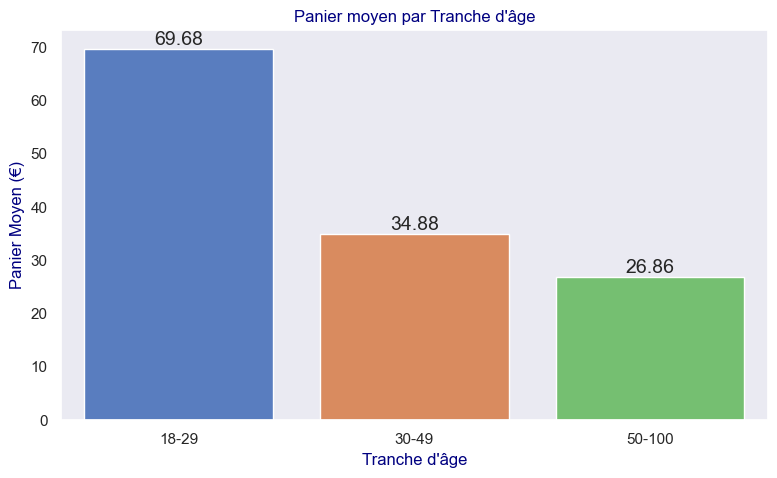

In [202]:
#Panier moyen par Tranche d'age :
df_graph = df_Profil_Client_Achat_1_1_Tranche_age_2.loc[:,:]

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_graph, 
                 x="tranche_age_2", 
                 y="panier_moyen_moy",
                 hue="tranche_age_2"#,palette = palette_fixe_categ
                )

for x in range(0,len(df_graph["tranche_age_2"])) :
    ax.bar_label(ax.containers[x], fmt='%.2f',padding=0)

plt.title("Panier moyen par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Panier Moyen (€)")
plt.tight_layout()
plt.show()

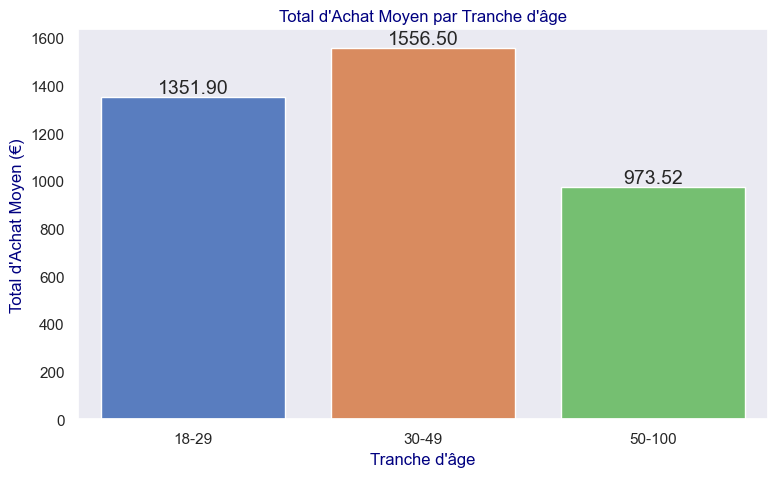

In [203]:
#Total d'Achat moyen par Tranche d'age :
df_graph = df_Profil_Client_Achat_1_1_Tranche_age_2.loc[:,:]

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_graph, 
                 x="tranche_age_2", 
                 y="total_achat_moy",
                 hue="tranche_age_2"#,palette = palette_fixe_categ
                )

for x in range(0,len(df_graph["tranche_age_2"])) :
    ax.bar_label(ax.containers[x], fmt='%.2f',padding=0)

plt.title("Total d'Achat Moyen par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Total d'Achat Moyen (€)")
plt.tight_layout()
plt.show()

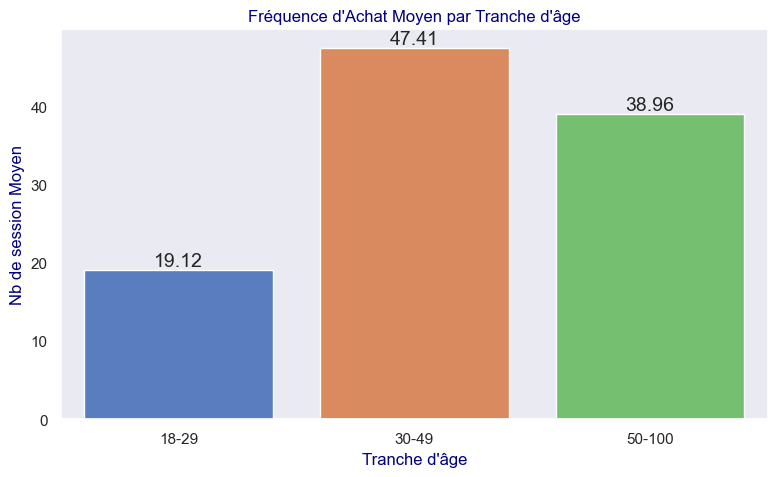

In [204]:
#Fréquence d'Achat moyen par Tranche d'age :
df_graph = df_Profil_Client_Achat_1_1_Tranche_age_2.loc[:,:]

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_graph, 
                 x="tranche_age_2", 
                 y="nb_sessions_moy",
                 hue="tranche_age_2"#,palette = palette_fixe_categ
                )

for x in range(0,len(df_graph["tranche_age_2"])) :
    ax.bar_label(ax.containers[x], fmt='%.2f',padding=0)

plt.title("Fréquence d'Achat Moyen par Tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nb de session Moyen")
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.234ter.3 - Etude par Tranche d'age pertinentes (CORRELATION) :</h4>
</div>

In [205]:
display(df_Profil_Client_Achat_1_1_Tranche_age_2)

tranche_age_2  total_achat_moy  nb_sessions_moy  panier_moyen_moy
0         18-29      1351.898639        19.120673         69.683573
1         30-49      1556.504334        47.414956         34.877072
2        50-100       973.515151        38.960077         26.860847

##### ETUDE CORRELATION TRANCHE d'AGE / Montant Total des Achats

Les données ne sont pas assez nombreuses pour faire des études de corrélations.  
Là il s'agit déjà d'une agrégation faite sur la base des corrélations et observations.  
On ne fait pes des corrélations avec 3 lignes ou chaque ligne représente à elle même une catégorie :  
On affiche simplement.  
Ce regroupement par tranche d'âge est déjà la conséquence d'une étude de carrélation par rapport aux ages.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.5 - Corrélation Age / catégorie des livres achetés (1 VAR QUANT-1 VAR QUAL) :</h3>
</div>

In [206]:
df_analyse_O1_O2_BtC.head(2)

transaction_id session_id                       date        day client_id  \
0         t_1818      s_908 2021-03-02 21:57:33.862118 2021-03-02    c_1004   
1       t_334688   s_167174 2022-02-18 16:40:10.068303 2022-02-18    c_1011   

  sex  birth id_prod  price categ  age  
0   m   1973     0_0   3.75     0   49  
1   f   1999     0_0   3.75     0   23

**Niveau de l'étude de corrélation :**  
Sur le fichier df_analyse_O1_O2_BtC, nous sommes à un niveau de granularité de la transaction.  
On souhaite voir si il y a une Relation entre l'Age (variable quantitative, si non transformée en tranche) et la catégorie de livre (variable qualitative avec 3 catégories : 0, 1 , 2).  

Les tests vont se faire sur chacune des catagories de livres : 0, 1 et 2.  
Dans chaque Groupe d'étude (0, 1 et 2), on aura l'ensemble des transactions avec l'age associé.  
Par exemple dans le Groupe de categ 0, nous allons voir comment sont répartis les âges de ceux qui ont achetés des livres de categories 0.
Avec cette étude nous allons vori le poids transaction par transaction.  
Le regroupement qui pourrait être possible serait éventuellement de faire un regroupement client par client pour donner le même poids à chaque client et non à chaque transaction.  
Mais cela impliquerait que 1 client qui a acheté 10 livres categ 0, 5 livres categ 2, et 1 livre categ 2, compterait pour 1 dans chaque catégorie.  
Cela ne me parait pas pertinent au vu du sens de l'étude qui est d'évaluer la tendance d'une classe d'âge à se porter plutôt sur telle ou telle catégorie, sans que cela n'exclut pas qu'une fois de temps en temps elle puisse acheter exceptionnellement dans une autre catégorie.  

Regrouper par client reviendrait à se poser la question uniquement sous l'angle :  
- est-ce que j'ai déjà acheté une fois de cette catégorie ou jamais.
- au lieu de est-ce que je penche plutôt sur cette catégorie qu'une autre.
Au vu de l'étude que nous faisons, achat de livre, je pense que l'on étudie une tendance d'achat qui peut être nuancée (au moins dans certaines catégories d'âge), qu'un phénomène binaire (du type je n'achète cette catégorie de produit ou je ne l'achète jamais). Car en effet on parle de clients qui ont une tendance à acheter des livres.  Cela aurait été différent si l'on voulait étudier des gens qui achète ou n'achètent jamais de livres.

Je pense donc qu'il est plutôt intéressant de conserver ici le poids des transactions.  
Je vais donc faire l'étude (au moins dans un premier temps) au niveau des transactions et donc directement travailler au niveau transaction sur df_analyse_O1_O2_BtC (et pas sur un regroupement client, age, categ )

In [207]:
df_analyse_O1_O2_BtC.dtypes

transaction_id    string[python]
session_id        string[python]
date              datetime64[ns]
day               datetime64[ns]
client_id         string[python]
sex               string[python]
birth                      Int64
id_prod           string[python]
price                    float64
categ             string[python]
age                        Int64
dtype: object

**Remarque sur le caractère qualitatif  de la variable categ :**  
Je peux transformer categ en string pour m'assurer qu'elle soit bien traité en tant que categ et non en quantitatif.

In [208]:
#plus besoin car changé au niveau du nettoyage
#df_analyse_O1_O2_BtC= df_analyse_O1_O2_BtC.loc[:,:].astype({'categ':'string'})
#df_analyse_O1_O2_BtC.dtypes

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.5.1 - Etude des distributions Age et Catégorie :</h4>
</div>

**Catégorie**

###### **ESSAIS**

###### **FIN ESSAIS**

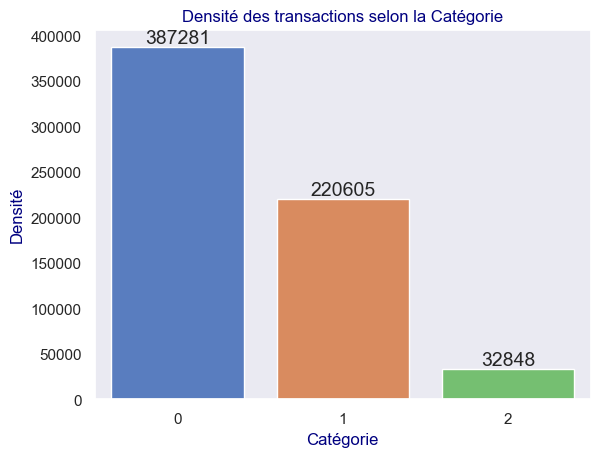

In [209]:
#Distribution de Categ
ax  = sns.countplot(data=df_analyse_O1_O2_BtC,
                   x='categ',
                   hue='categ',
                   #hue_order= Ordre_categ,
                   palette = palette_fixe_categ
                   )

for x in range(0,len(ax.containers)) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.ylabel("Densité")
plt.xlabel("Catégorie")
plt.title("Densité des transactions selon la Catégorie")
plt.show()

##### **Age :**

In [210]:
age_transactions = df_analyse_O1_O2_BtC['age']

In [211]:
df_analyse_O1_O2_BtC['age'].describe()

count     640734.0
mean     44.207976
std      13.879682
min           18.0
25%           35.0
50%           43.0
75%           51.0
max           93.0
Name: age, dtype: Float64

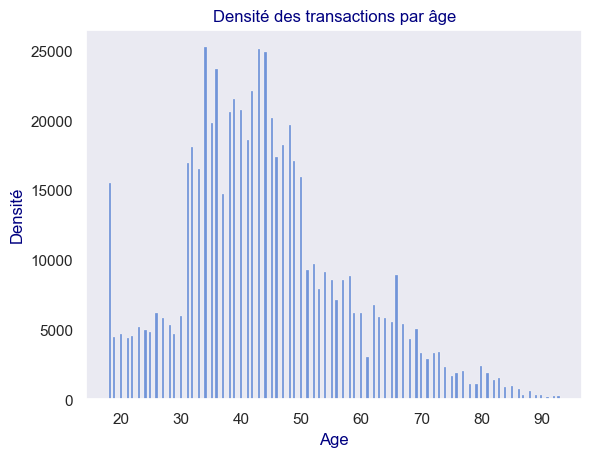

In [212]:
#Distribution des Ages
sns.histplot(data=df_analyse_O1_O2_BtC,
             x='age',
             #hue='age'
            )

plt.ylabel("Densité")
plt.xlabel("Age")
plt.title("Densité des transactions par âge")
plt.show()

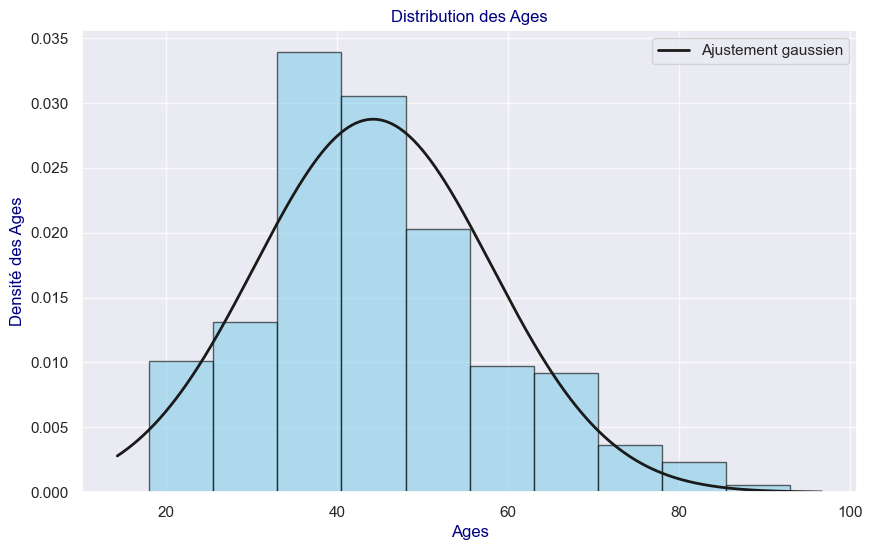

In [213]:
#Visualisation de la distribution des dépense publicitaires :

distrib_age = age_transactions

plt.figure(figsize=(10, 6))
plt.hist(distrib_age,
         bins=10, 
         density=True, 
         color='skyblue', 
         edgecolor='black', 
         alpha=0.6)

mu, std = norm.fit(distrib_age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(distrib_age))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des Ages')
plt.xlabel('Ages')
plt.ylabel('Densité des Ages')
#plt.xticks(range(10,100,10))
plt.grid( alpha=0.75)

La répartition des ages des transactions pourrait suivre une loi Normale

###### **Testons la Normalité : Test de Shapiro : Données supérieurs à 2_000 Test de Shapiro pas adapté**

**ATTENTION :  
plus de 2000 données => Shapiro pas adapté.   
1var qual+1var quant => ce qui nous intéresse c'est la normalité de la distributioin groupe par groupe**

###### **Testons la Normalité : Test de Kolmogorov smirnov Taille de l'échantillon de 640-000 données (bien supérieur à 2_000) :**

**ATTENTION :  
plus de 2000 données => Kolmogorov-Smirnov.   
1var qual+1var quant => ce qui nous intéresse c'est la normalité de la distribution GROUPE PAR GROUPE  
Ici c'est juste pour voir par curiosité**

Le test de Kolmogorov-Smirnov (K-S test) permet en effet de comparer une distribution empirique à une distribution théorique, comme ici la loi normale.

Cependant, pour tester la normalité d’une série de données avec ce test, il est recommandé de centrer et réduire les données avant de les comparer à la loi normale standard (𝒩(0,1)).

In [214]:
from scipy.stats import kstest, zscore

# Chargement des données
#age_transactions 

# Centrage-réduction des séries (normalisation)
age_transactions_norm = zscore(age_transactions)

# Test de Kolmogorov-Smirnov pour la normalité (comparaison à N(0,1))
ks_stat_age_transactions, p_value_age_transactions = kstest(age_transactions_norm, 'norm')

# Affichage des résultats
print("Test K-S pour 'age' :")
print(f"  KS statistic = {ks_stat_age_transactions:.4f}, p-value = {p_value_age_transactions:.4f}")
if p_value_age < 0.05:
    print("  ↪️ Distribution significativement différente de la normale.")
else:
    print("  ↪️ Pas de preuve contre la normalité.")


Test K-S pour 'age' :
  KS statistic = 0.0802, p-value = 0.0000
  ↪️ Distribution significativement différente de la normale.


POur l'age,
Nous rejetons H0 et donc la normalité (p_value<0.05)

###### **Visualisation des données avec un Q-Q plot :**

<u>Qu’est-ce qu’un Q-Q plot (Quantile-Quantile plot) ?</u>  
Un Q-Q plot est une visualisation graphique utilisée pour comparer la distribution d’un échantillon à une distribution théorique (généralement une loi normale).  

**Principe :**  
Chaque point du graphique représente un quantile de ta distribution observée en fonction du quantile correspondant de la distribution théorique (ici la normale).  
Si tes données suivent la loi normale : les points doivent s’aligner approximativement sur une droite diagonale (la ligne de référence).  
Les écarts à la ligne signalent une déviation par rapport à la loi normale.  
👉 C’est un outil visuel complémentaire aux tests statistiques (comme Shapiro ou K-S).  

**Exemple de lecture :**
Si les points s'écartent en S de la diagonale → distribution asymétrique.  
Si les queues s’éloignent (en haut ou bas) → présence d’outliers ou de leptokurtose.  
Si tout est aligné → distribution proche de la normale.

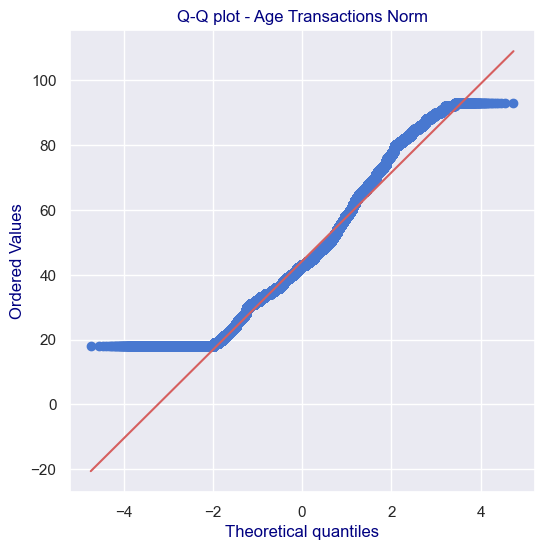

In [215]:
#import pandas as pd
#import scipy.stats as st
#import matplotlib.pyplot as plt
#import seaborn as sns

# Q-Q plot :

# Exemple de récupération de la variable (en t'assurant de retirer les NaN si besoin)
#age_transactions = df_analyse_O1_O2_BtC['age'].dropna()

# Création du Q-Q plot
plt.figure(figsize=(6, 6))  
st.probplot(age_transactions, dist="norm", plot=plt)
plt.title("Q-Q plot - Age Transactions Norm")
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.5.2 - Visualisation de la Tendance Catégorie par Age :</h4>
</div>

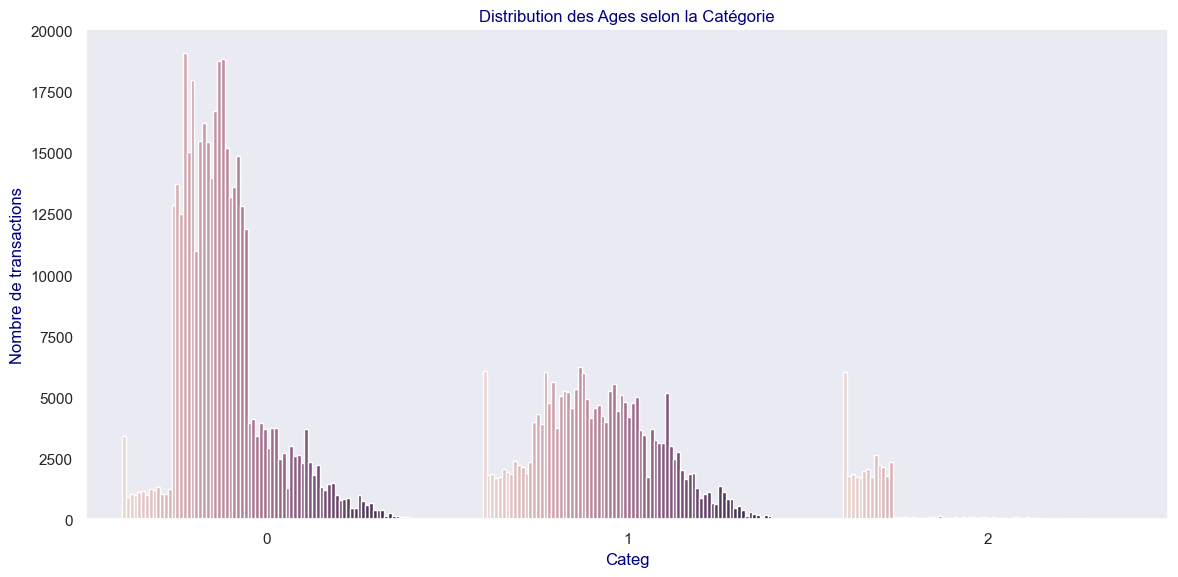

In [216]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_analyse_O1_O2_BtC, 
              x='categ', 
              hue='age',
              legend=False
             )
plt.title('Distribution des Ages selon la Catégorie')
plt.xlabel('Categ')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=0)
#plt.legend(title='',bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

**OBSERVATIONS :**  
On prévoit une différence assez nette notamment pour la catégorie 2.

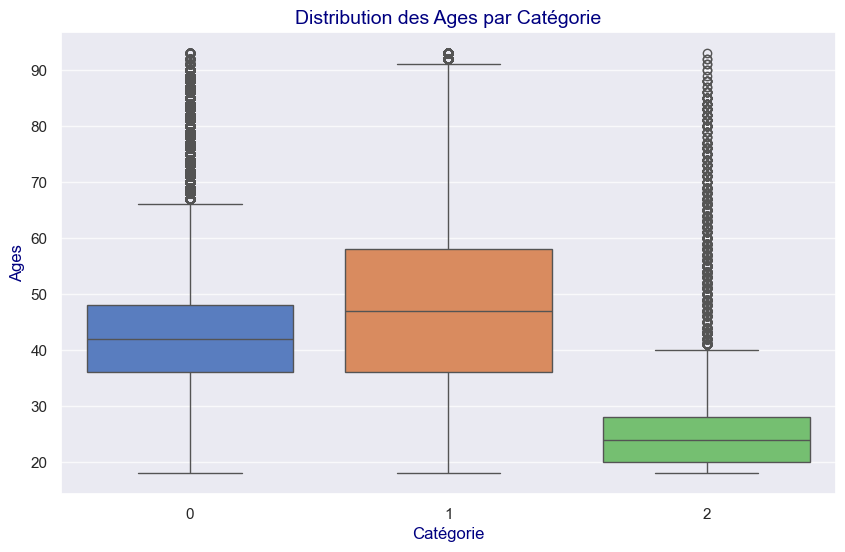

In [217]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analyse_O1_O2_BtC, 
            y='age', 
            x='categ',
            hue='categ'
           )
plt.title('Distribution des Ages par Catégorie',fontdict={'fontsize' : 14, 'color':'navy'})
plt.xlabel('Catégorie',fontdict={'color':'navy'})
plt.ylabel('Ages',fontdict={'color':'navy'})
plt.grid(axis='y', alpha=0.75)

Les variances ne devraient pas être comparables => (donc pas de test T ou d'ANOVA, même si on a une normalité dans la distribution par groupe).  
On devrait donc être sur un test Kruskal Wallis car 3 groupes (sans normalité+variances équivalentes dans les groupes) 
(Mann-Whitney pour 2 groupes sans normalité+variances équivalentes dans les groupes)

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.5.3- Choix du test :</h4>
</div>

##### **FONCTIONS DE CHOIX :**

##### **FONCTIONS DE CHOIX ADAPTEE A PLUS OU MOINS DE 5000 DONNEES :**

In [218]:
#Adapté à + ou - de 5000 données
#FONCTION POUR VERIFIER SI LES CONDITIONS REQUISES (NORMALITE des groupes, Homogénéités des variances)
#POUR 1 VAR QUAL + 1 VAR QUANT
#POUR UN TEST T (2 groupes) ou une ANOVA (plsu de 2 groupes) sont respectées :

#import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
#import matplotlib.pyplot as plt
#import seaborn as sns

def controle_conditions_test_t_anova(df, var_quantitative, var_categorielle, alpha=0.05):
    """
    Vérifie normalité et égalité des variances avant un test t ou ANOVA.
    S'adapte à la taille des échantillons : Shapiro (N≤5000), Kolmogorov-Smirnov (N>5000).
    
    df : DataFrame pandas
    var_quantitative : str, nom de la variable quantitative
    var_categorielle : str, nom de la variable catégorielle (groupes)
    alpha : seuil de test (par défaut 0.05)
    """

    print(f"\n--- Contrôle avant Test T / ANOVA sur {var_quantitative} selon {var_categorielle} ---\n")
    
    # 1. Test de normalité dans chaque groupe
    groupes = df[var_categorielle].dropna().unique()
    normalite = {}

    print("Test de normalité (Shapiro ou Kolmogorov-Smirnov par groupe) :")
    for g in groupes:
        data_groupe = df[df[var_categorielle] == g][var_quantitative].dropna()
        n = len(data_groupe)
        
        if n <= 5000:
            stat, p = stats.shapiro(data_groupe)
            test_nom = "Shapiro-Wilk"
        else:
            # Normalisation des données avant KS-test
            mean = data_groupe.mean()
            std = data_groupe.std()
            data_norm = (data_groupe - mean) / std
            stat, p = stats.kstest(data_norm, 'norm')
            test_nom = "Kolmogorov-Smirnov"
        
        normalite[g] = (stat, p)
        
        if p > alpha:
            print(f"  Groupe {g} ({test_nom}) : p = {p:.4f} -> Normalité OK ✅")
        else:
            print(f"  Groupe {g} ({test_nom}) : p = {p:.4f} -> Normalité rejetée ❌")

    # 2. Test d'homogénéité des variances
    toutes_normales = all(p > alpha for stat, p in normalite.values())
    datas_groupes = [df[df[var_categorielle] == g][var_quantitative].dropna() for g in groupes]

    print("\nTest d'égalité des variances :")
    if toutes_normales:
        stat_var, p_var = stats.bartlett(*datas_groupes)
        test_variance = "Bartlett (normalité OK)"
    else:
        stat_var, p_var = stats.levene(*datas_groupes, center='median')
        test_variance = "Levene (normalité non garantie)"
    
    if p_var > alpha:
        print(f"  {test_variance} : p = {p_var:.4f} -> Variances homogènes ✅")
    else:
        print(f"  {test_variance} : p = {p_var:.4f} -> Variances hétérogènes ❌")

    # 3. Conclusion
    print("\n--- Conclusion sur les conditions ---")
    if toutes_normales and p_var > alpha:
        print("Conditions OK pour test T Student ou ANOVA classique ✅")
    elif toutes_normales and p_var <= alpha:
        print("Normalité OK mais variances inégales : Test T Welch recommandé (ou ANOVA Welch) ⚠️")
    else:
        print("Normalité non respectée : Test non-paramétrique recommandé (Mann-Whitney, Kruskal-Wallis) ❗️")

    # 4. Visualisation rapide
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=var_categorielle, y=var_quantitative)
    plt.title(f"Distribution de {var_quantitative} selon {var_categorielle}")
    plt.show()


In [219]:
#Adapté à plus et moins de 5000 données
#FONCTION POUR VERIFIER SI LES CONDITIONS REQUISES (NORMALITE des groupes, Homogénéités des variances)
#POUR UN TEST T (2 groupes) ou une ANOVA (plsu de 2 groupes) sont respectées :
#POUR 1 VAR QUAL + 1 VAR QUANT
# +qui indique le Test a choisir et le fait

#import pandas as pd
#import scipy.stats as stats
#import statsmodels.api as sm
#import seaborn as sns
#import matplotlib.pyplot as plt

def analyse_automatique_test(df, var_quantitative, var_categorielle, alpha=0.05):
    """
    Analyse automatique :
    - Vérification normalité et homogénéité
    - Choix automatique du bon test
    - Exécution du test
    """
    print(f"\n--- Analyse automatique pour {var_quantitative} selon {var_categorielle} ---\n")
    
    # 1. Préparation des données
    groupes = df[var_categorielle].dropna().unique()
    datas_groupes = [df[df[var_categorielle] == g][var_quantitative].dropna() for g in groupes]

    # 2. Normalité par groupe (Shapiro ou Kolmogorov-Smirnov selon effectif)
    normalite = {}
    for g, data in zip(groupes, datas_groupes):
        n = len(data)
        if n <= 5000:
            stat, p = stats.shapiro(data)
            test_norme = "Shapiro-Wilk"
        else:
            stat, p = stats.kstest((data - data.mean()) / data.std(ddof=0), 'norm')
            test_norme = "Kolmogorov-Smirnov"
        normalite[g] = (stat, p, test_norme)

    toutes_normales = all(p > alpha for stat, p, test_norme in normalite.values())

    # 3. Homogénéité des variances (Bartlett ou Levene)
    if toutes_normales:
        stat_var, p_var = stats.bartlett(*datas_groupes)
        test_var = "Bartlett"
    else:
        stat_var, p_var = stats.levene(*datas_groupes, center='median')
        test_var = "Levene"

    variances_homogenes = p_var > alpha

    # 4. Choix et exécution du test
    print("--- Résultats des contrôles ---")
    for g, (stat, p, test_norme) in normalite.items():
        print(f"Normalité ({test_norme}) - Groupe {g} : p = {p:.4f}")
    print(f"Test des variances ({test_var}) : p = {p_var:.4f}")

    print("\n--- Choix du test ---")
    if toutes_normales:
        if len(groupes) == 2:
            if variances_homogenes:
                print("→ Test t de Student (2 groupes, normalité OK, variances homogènes)")
                stat_test, p_test = stats.ttest_ind(datas_groupes[0], datas_groupes[1], equal_var=True)
            else:
                print("→ Test t de Welch (2 groupes, normalité OK, variances inégales)")
                stat_test, p_test = stats.ttest_ind(datas_groupes[0], datas_groupes[1], equal_var=False)
        else:
            if variances_homogenes:
                print("→ ANOVA classique (plus de 2 groupes, normalité OK, variances homogènes)")
                stat_test, p_test = stats.f_oneway(*datas_groupes)
            else:
                print("→ ANOVA de Welch (plus de 2 groupes, normalité OK, variances inégales)")
                model = sm.stats.anova_lm(sm.OLS.from_formula(f'{var_quantitative} ~ C({var_categorielle})', data=df).fit(), typ=2)
                print(model)
                return  # Fin après affichage ANOVA Welch
    else:
        if len(groupes) == 2:
            print("→ Test de Mann-Whitney U (2 groupes, normalité NON OK)")
            stat_test, p_test = stats.mannwhitneyu(datas_groupes[0], datas_groupes[1], alternative='two-sided')
        else:
            print("→ Test de Kruskal-Wallis (plus de 2 groupes, normalité NON OK)")
            stat_test, p_test = stats.kruskal(*datas_groupes)

    # 5. Résultat final
    print(f"\n--- Résultat du test ---")
    print(f"Statistique de test : {stat_test:.4f}")
    print(f"Valeur p : {p_test:.4g}")
    if p_test < alpha:
        print(f"Conclusion : Différence significative détectée ✅ (p < {alpha})")
    else:
        print(f"Conclusion : Aucune différence significative ❌ (p ≥ {alpha})")
    
    # 6. Visualisation rapide
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=var_categorielle, y=var_quantitative)
    plt.title(f"Distribution de {var_quantitative} selon {var_categorielle}")
    plt.show()


In [220]:
#Adapté à plus et moins de 5000 données
#POUR 1 VAR QUAL +1 VAR QUANT
#FONCTION POUR VERIFIER SI LES CONDITIONS REQUISES (NORMALITE des groupes, Homogénéités des variances)
#POUR UN TEST T (2 groupes) ou une ANOVA (plsu de 2 groupes) sont respectées :
# +qui indique le Test a choisir
#+qui fait le Test
#+Resultat structuré en DataFrame

#import pandas as pd
#import scipy.stats as stats
#import statsmodels.api as sm
#import seaborn as sns
#import matplotlib.pyplot as plt

def analyse_automatique_test_structured(df, var_quantitative, var_categorielle, alpha=0.05, show_plot=False):
    """
    Analyse automatique structurée :
    - Vérification normalité et homogénéité
    - Choix automatique du bon test
    - Retour d'un DataFrame avec tous les résultats
    
    Paramètres :
    - df : DataFrame pandas
    - var_quantitative : str, variable quantitative
    - var_categorielle : str, variable catégorielle
    - alpha : seuil (par défaut 0.05)
    - show_plot : bool, pour afficher ou non un boxplot
    """

    groupes = df[var_categorielle].dropna().unique()
    datas_groupes = [df[df[var_categorielle] == g][var_quantitative].dropna() for g in groupes]

    # Test de normalité
    normalite = {}
    for g, data in zip(groupes, datas_groupes):
        n = len(data)
        if n <= 5000:
            stat, p = stats.shapiro(data)
            test_norme = "Shapiro-Wilk"
        else:
            # Centrage et réduction pour tester contre N(0,1)
            data_standard = (data - data.mean()) / data.std(ddof=0)
            stat, p = stats.kstest(data_standard, 'norm')
            test_norme = "Kolmogorov-Smirnov"
        normalite[g] = (stat, p, test_norme)

    toutes_normales = all(p > alpha for stat, p, test_norme in normalite.values())

    # Test d'homogénéité des variances
    if toutes_normales:
        stat_var, p_var = stats.bartlett(*datas_groupes)
        test_var = "Bartlett"
    else:
        stat_var, p_var = stats.levene(*datas_groupes, center='median')
        test_var = "Levene"

    variances_homogenes = p_var > alpha

    # Choix du test et exécution
    if toutes_normales:
        if len(groupes) == 2:
            if variances_homogenes:
                test_type = "t-Student"
                stat_test, p_test = stats.ttest_ind(datas_groupes[0], datas_groupes[1], equal_var=True)
            else:
                test_type = "t-Welch"
                stat_test, p_test = stats.ttest_ind(datas_groupes[0], datas_groupes[1], equal_var=False)
        else:
            if variances_homogenes:
                test_type = "ANOVA classique"
                stat_test, p_test = stats.f_oneway(*datas_groupes)
            else:
                test_type = "ANOVA Welch"
                model = sm.OLS.from_formula(f'{var_quantitative} ~ C({var_categorielle})', data=df).fit()
                table = sm.stats.anova_lm(model, typ=2)
                stat_test = table['F'][0]
                p_test = table['PR(>F)'][0]
    else:
        if len(groupes) == 2:
            test_type = "Mann-Whitney U"
            stat_test, p_test = stats.mannwhitneyu(datas_groupes[0], datas_groupes[1], alternative='two-sided')
        else:
            test_type = "Kruskal-Wallis"
            stat_test, p_test = stats.kruskal(*datas_groupes)

    # Résumé
    conclusion = "Significatif" if p_test < alpha else "Non significatif"

    resultats = pd.DataFrame({
        "variable_quantitative": [var_quantitative],
        "variable_categorielle": [var_categorielle],
        "test_selectionne": [test_type],
        "statistique_test": [stat_test],
        "p_value": [p_test],
        "normalite_OK": [toutes_normales],
        "variances_homogenes": [variances_homogenes],
        "test_variance_utilise": [test_var],
        "p_value_variance_test": [p_var],
        "conclusion": [conclusion]
    })

    # Visualisation optionnelle
    if show_plot:
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df, x=var_categorielle, y=var_quantitative)
        plt.title(f"Distribution de {var_quantitative} selon {var_categorielle}")
        plt.show()

    return resultats


##### **APPLIQUONS NOS FONCTIONS DE TEST DU BON TEST POUR 1 VAR QUAL-1VAR QUANT :**


--- Contrôle avant Test T / ANOVA sur age selon categ ---

Test de normalité (Shapiro ou Kolmogorov-Smirnov par groupe) :
  Groupe 0 (Kolmogorov-Smirnov) : p = 0.0000 -> Normalité rejetée ❌
  Groupe 1 (Kolmogorov-Smirnov) : p = 0.0000 -> Normalité rejetée ❌
  Groupe 2 (Kolmogorov-Smirnov) : p = 0.0000 -> Normalité rejetée ❌

Test d'égalité des variances :
  Levene (normalité non garantie) : p = 0.0000 -> Variances hétérogènes ❌

--- Conclusion sur les conditions ---
Normalité non respectée : Test non-paramétrique recommandé (Mann-Whitney, Kruskal-Wallis) ❗️


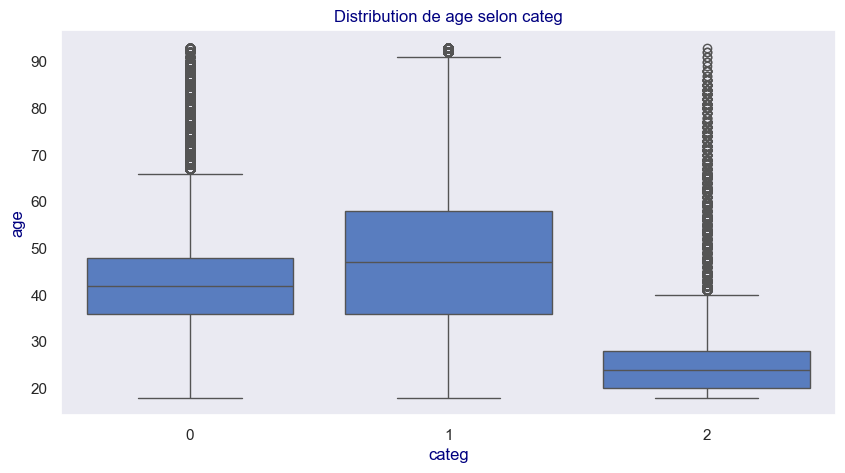

In [221]:
controle_conditions_test_t_anova(df=df_analyse_O1_O2_BtC,var_quantitative='age' , var_categorielle='categ' )


--- Analyse automatique pour age selon categ ---

--- Résultats des contrôles ---
Normalité (Kolmogorov-Smirnov) - Groupe 0 : p = 0.0000
Normalité (Kolmogorov-Smirnov) - Groupe 1 : p = 0.0000
Normalité (Kolmogorov-Smirnov) - Groupe 2 : p = 0.0000
Test des variances (Levene) : p = 0.0000

--- Choix du test ---
→ Test de Kruskal-Wallis (plus de 2 groupes, normalité NON OK)

--- Résultat du test ---
Statistique de test : 71359.7341
Valeur p : 0
Conclusion : Différence significative détectée ✅ (p < 0.05)


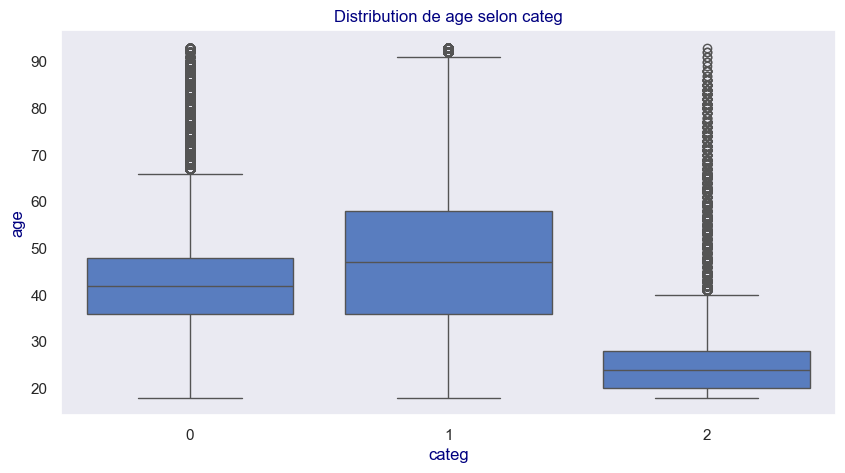

In [222]:
analyse_automatique_test(df=df_analyse_O1_O2_BtC,var_quantitative='age' , var_categorielle='categ' )

In [223]:
analyse_automatique_test_structured(df=df_analyse_O1_O2_BtC,var_quantitative='age' , var_categorielle='categ' )

variable_quantitative variable_categorielle test_selectionne  \
0                   age                 categ   Kruskal-Wallis   

   statistique_test  p_value  normalite_OK  variances_homogenes  \
0      71359.734121      0.0         False                False   

  test_variance_utilise  p_value_variance_test    conclusion  
0                Levene                    0.0  Significatif

<u>**Rappel sur le Test de Kruskal-Wallis (H-test) :**</u>  

principe : comparer les moyennes de 3 groupes ou plus  

>Conditions:  
	-1 donnée Quant 1 donnée Qual  
	-données indépendantes  
	-3 groupes ou plus à comparer  
	- les  groupes n'ont PAS BESOIN de suivre une DISTRIBUTION NORMALE  
	-PAS BESOIN DE VARIANCE EGALE (mais c'est mieux que les groupes est distribution semblables même si pas normale, p ex le test est moins fort si un groupe a une distrib symétrique et l'autre non)  
	-recherche d'association (H0 pas de diff de moyenne entre les 2 grpes, H1 : diff de moyenne entre les 2 grpes)  

>la statistique de test H mesure la différence entre les moyennes des 2 groupes p/ à la variation observée  
  
>Vérifier p-value inf à 0,05 (H0 rejetée; H1 validé =>relation)  

##### **OBSERVATIONS :**  
Par groupe de catégorie :  
- les données d'âge n'ont pas une distribution normale.
- les variances des groupes ne sont pas homogènes.
=>pour ces 2 raisons le tes T et le test ANOVA ne sont pas adaptés.
Il faut faire un test de Mann-Whitney (si 2 catégories qual), ou de Kruskal-Wallis (si plus de 2 catégories qual).

De plus il y a 3 catégories de livres.  
=>Donc le test recommandé est celui de Kruskal-Wallis.  

<u>**Résultats du test de Kruskal-Wallis :**</u>   
Statistique de test : 71359.7341  
Valeur p :   0
p-value < 0.05, donc H0 est rejetée et il existe donc une différence significative entre les groupes de catégorie.  
Rappel : le test de Kruskal-Wallise compare les moyennes.  
Donc cela veut dire que les moyennes sont signifcativement différentes.  
Cela confirme bien l'impression nette données par les boxplots.  
Mais là c'est objectivé par un test chiffré.  
(cela confirme bien par exemple que la différence n'est pas lié à seulement 2 personnes que auraient acheté des livres de categ 2 et qui ne permettent pas de faire une différence singificative).5)

##### **LES STATS POUR CHAQUE CATEGORIES :**

In [224]:
# Sélectionner les colonnes pertinentes pour chaque Catégories
age_categ_0 = df_analyse_O1_O2_BtC[df_analyse_O1_O2_BtC['categ'] == '0']['age'].dropna()
age_categ_1 = df_analyse_O1_O2_BtC[df_analyse_O1_O2_BtC['categ'] == '1']['age'].dropna()
age_categ_2 = df_analyse_O1_O2_BtC[df_analyse_O1_O2_BtC['categ'] == '2']['age'].dropna()


In [225]:
print("catégorie 0 :")
print(age_categ_0.describe())
print("")
print("catégorie 1 :")
print(age_categ_1.describe())
print("")
print("catégorie 2 :")
print(age_categ_2.describe())

catégorie 0 :
count     387281.0
mean     43.794563
std       11.51611
min           18.0
25%           36.0
50%           42.0
75%           48.0
max           93.0
Name: age, dtype: Float64

catégorie 1 :
count     220605.0
mean     47.650035
std      15.824496
min           18.0
25%           36.0
50%           47.0
75%           58.0
max           93.0
Name: age, dtype: Float64

catégorie 2 :
count      32848.0
mean     25.965508
std       9.899864
min           18.0
25%           20.0
50%           24.0
75%           28.0
max           93.0
Name: age, dtype: Float64


**VISUALISATION BOXPLOT AVEC MOYENNES :**

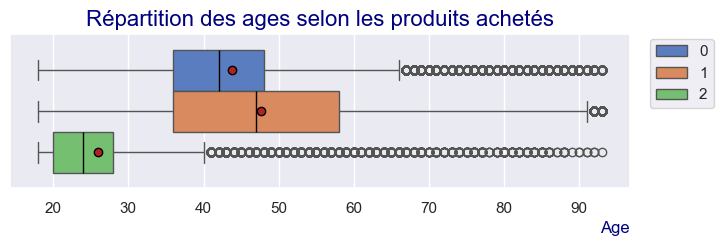

In [226]:
plt.figure(figsize=(8,2))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})

sns.set_theme(style='dark', palette='muted')
sns.boxplot(data=df_analyse_O1_O2_BtC,
            x='age',
            hue='categ',
            medianprops = {'color':"black"},#caract de l'indice de la médiane
            meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'},
            #caract de l'indice de la moyenne
            showmeans =True, #c'est ce qui permet de faire apparaitre la moyenne,
            palette = palette_fixe_categ
            #hue_order= ...
           )
#plt.xlim(0,250)
plt.grid(axis='x')
plt.xlabel('Age',fontdict={'fontsize' : 12, 'color':'navy'},loc='right')
plt.legend(bbox_to_anchor=(1.02,1.02))
plt.title("Répartition des ages selon les produits achetés",fontdict={'fontsize' : 16, 'color':'navy'})
plt.show()

**Commentaire sur la distribution des ages selon les catégories :**  
- la médiane(24) et la moyenne(26) des clients achetant des livres de catégories 2 sont plus basses que celles des autres catégoriers 
- la médiane(47) et la moyenne(47) des clients achetant des livres de catégories 1 sont plus hautes que celles des autres catégories
- la médiane(42) et la moyenne(44) des clients achetant des livres de catégories 0 sont intermédiaires.

**COEUR DE CIBLE :**
La catégorie 1 est celle qui a le public le plus hétéroclite (50% étalé sur 36-58ans)  
La catégorie la plus typée, est la catégorie 2 avec un age plus bas, et un écart interquartile plus restreint 18-28ans).  
La catégorie 0 elle cible plus les 36-48 ans.

<div style="border: 1px solid RGB(88, 132, 241);" >
<h4 style="margin: auto; padding: 20px; color: RGB(88, 132, 241); "> 6.5.4 COMPLEMENT D'INFOS SUR LES CATEGORIES pour le BtC:</h4>
</div>

In [227]:
#Groupby categ:
df_BtC_Produits_2ans_par_categ = (df_analyse_O1_O2_BtC.groupby(['categ'])
                              .agg(nb_transactions=pd.NamedAgg(column='transaction_id',aggfunc='count'),
                                   CA_categ=pd.NamedAgg(column='price',aggfunc='sum'),
                                   nb_clients_distincts=pd.NamedAgg(column='client_id',aggfunc='nunique'),
                                  nb_references_distincts=pd.NamedAgg(column='id_prod',aggfunc='nunique'))
                              .reset_index()
                              )

df_BtC_Produits_2ans_par_categ.set_index(keys='categ',inplace=True)
df_BtC_Produits_2ans_par_categ

nb_transactions    CA_categ  nb_clients_distincts  \
categ                                                      
0               387281  4119200.69                  7892   
1               220605  4520101.86                  8455   
2                32848  2504064.46                  3593   

       nb_references_distincts  
categ                           
0                         2290  
1                          737  
2                          235

In [228]:
df_BtC_Produits_2ans_par_categ['nb_transactions_Milliers'] = df_BtC_Produits_2ans_par_categ['nb_transactions']/1_000
df_BtC_Produits_2ans_par_categ['CA_categ_Millions'] = df_BtC_Produits_2ans_par_categ['CA_categ']/1_000_000
df_BtC_Produits_2ans_par_categ

nb_transactions    CA_categ  nb_clients_distincts  \
categ                                                      
0               387281  4119200.69                  7892   
1               220605  4520101.86                  8455   
2                32848  2504064.46                  3593   

       nb_references_distincts  nb_transactions_Milliers  CA_categ_Millions  
categ                                                                        
0                         2290                   387.281           4.119201  
1                          737                   220.605           4.520102  
2                          235                    32.848           2.504064

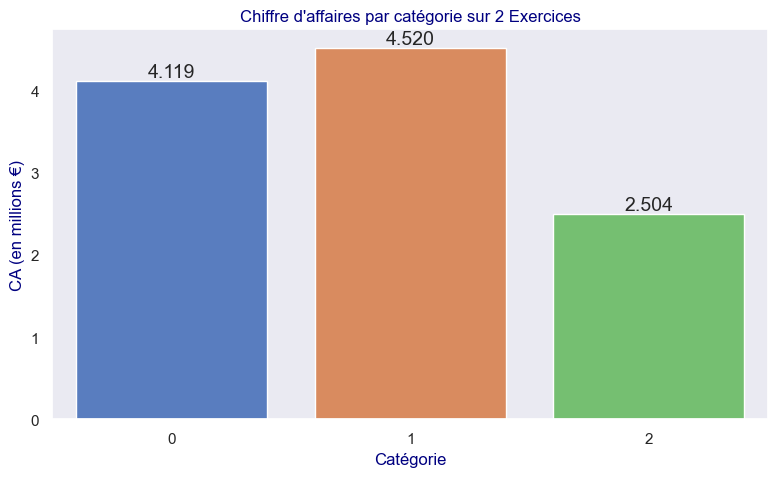

In [229]:
#BILAN sur 2 ans :

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_BtC_Produits_2ans_par_categ, 
                 x="categ", 
                 y="CA_categ_Millions",
                 hue="categ",
                palette = palette_fixe_categ)

for x in range(0,3) :
    ax.bar_label(ax.containers[x], fmt='%.3f')

plt.title("Chiffre d'affaires par catégorie sur 2 Exercices")
plt.xlabel("Catégorie")
plt.ylabel("CA (en millions €)")
plt.tight_layout()
plt.show()

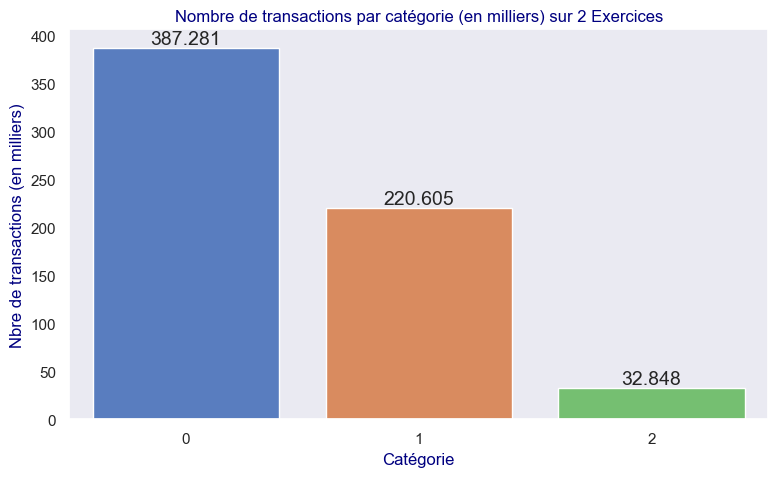

In [230]:
#BILAN sur 2 ans :

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_BtC_Produits_2ans_par_categ, 
                 x="categ", 
                 y="nb_transactions_Milliers",
                 hue="categ",
                palette = palette_fixe_categ)

for x in range(0,3) :
    ax.bar_label(ax.containers[x], fmt='%.3f')

plt.title("Nombre de transactions par catégorie (en milliers) sur 2 Exercices")
plt.xlabel("Catégorie")
plt.ylabel("Nbre de transactions (en milliers)")
plt.tight_layout()
plt.show()

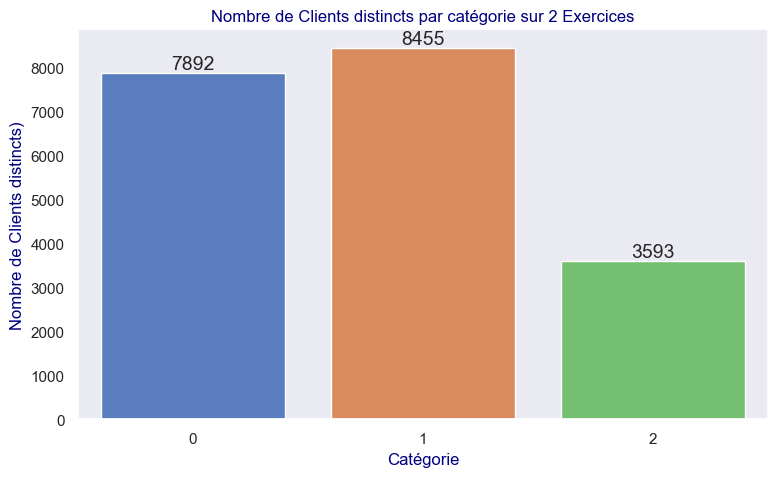

In [231]:
#BILAN sur 2 ans :

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_BtC_Produits_2ans_par_categ, 
                 x="categ", 
                 y="nb_clients_distincts",
                 hue="categ",
                palette = palette_fixe_categ)

for x in range(0,3) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title("Nombre de Clients distincts par catégorie sur 2 Exercices")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de Clients distincts)")
plt.tight_layout()
plt.show()

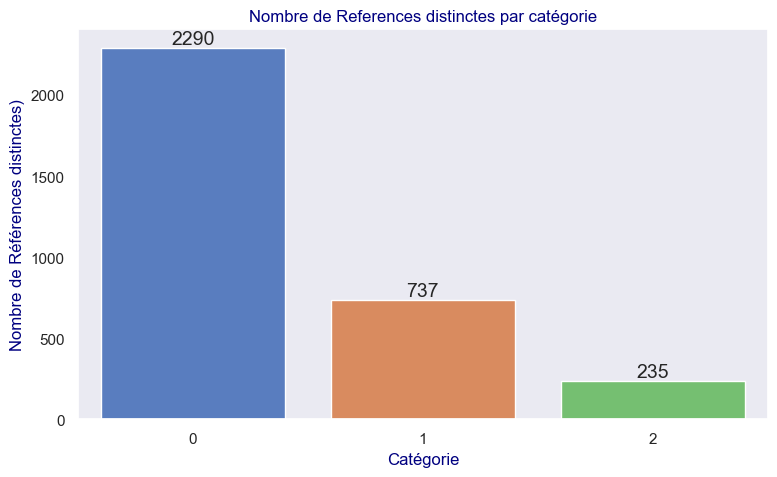

In [232]:
#BILAN sur 2 ans :

plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})
ax = sns.barplot(data=df_BtC_Produits_2ans_par_categ, 
                 x="categ", 
                 y="nb_references_distincts",
                 hue="categ",
                palette = palette_fixe_categ)

for x in range(0,3) :
    ax.bar_label(ax.containers[x], fmt='%.0f')

plt.title("Nombre de References distinctes par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de Références distinctes)")
plt.tight_layout()
plt.show()

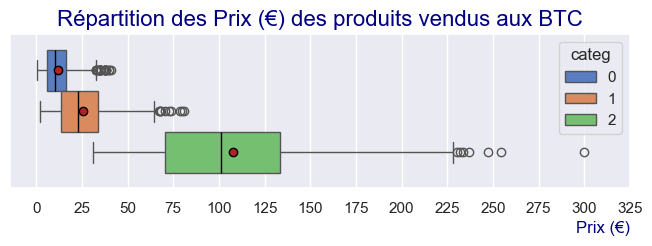

analyse des prix des produits de categorie 0 :
count    2290.000000
mean       11.712576
std         7.525119
min         0.620000
25%         5.635000
50%        10.305000
75%        16.462500
max        40.990000
Name: price, dtype: float64
analyse des prix des produits de categorie 1 :
count    737.000000
mean      25.503623
std       15.435471
min        2.000000
25%       13.350000
50%       22.990000
75%       33.990000
max       80.990000
Name: price, dtype: float64
analyse des prix des produits de categorie 2 :
count    235.000000
mean     107.487319
std       49.307598
min       30.990000
25%       70.460000
50%      100.990000
75%      133.545000
max      300.000000
Name: price, dtype: float64


In [234]:
plt.figure(figsize=(8,2))
plt.rcParams.update({'font.size' : 14,'axes.labelcolor':'navy','axes.titlecolor':'navy','figure.titlesize':16})

df_graph = df_analyse_O1_O2_BtC[['id_prod','price','categ']].drop_duplicates()#ATTENTION il ne faut garder qu'une ligne par produit


sns.set_theme(style='dark', palette='muted')
sns.boxplot(data=df_graph,
            x='price',
            hue='categ',
            medianprops = {'color':"black"},#caract de l'indice de la médiane
            meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'},
            #caract de l'indice de la moyenne
            showmeans =True, #c'est ce qui permet de faire apparaitre la moyenne,
            palette = palette_fixe_categ
            #hue_order= ...
           )
#plt.xlim(0,250)
plt.grid(axis='x')
plt.xticks(range(0,330,25))
plt.xlabel('Prix (€)',fontdict={'fontsize' : 12, 'color':'navy'},loc='right')
#plt.legend()
plt.title("Répartition des Prix (€) des produits vendus aux BTC",fontdict={'fontsize' : 16, 'color':'navy'})
plt.show()

print ("analyse des prix des produits de categorie 0 :")
print(df_graph.loc[df_graph['categ']=='0',:]['price'].describe())

print ("analyse des prix des produits de categorie 1 :")
print(df_graph.loc[df_graph['categ']=='1',:]['price'].describe())

print ("analyse des prix des produits de categorie 2 :")
print(df_graph.loc[df_graph['categ']=='2',:]['price'].describe())

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">X2.6 - Autre Corrélation X / Y Pertinente ? :</h3>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape Y - ANNEXES </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Y.1 - Lexiques des principaux DataFrame </h3>
</div>

#### <font color='green'><u>**LEXIQUE DES PRINCIPAUX DATAFRAMES :**<u></font>

##### <font color='blue'><u>**DATAFRAME POUR ANALYSE PROFIL CLIENT :**</u></font>  

<u>**FICHIERS POUR PROFIL CLIENT**</u>  
`df_analyse_O1_O2_BtC` :  
DataFrame contenant **l'ensemble des transactions**,  
incluant **uniquement les clients ayant achetés**; et les **produits ayant été achetés**,  
**restreint aux clients classiques BtC=BusinessToCustomer** (exclusion donc des transactions concernant les 4 gros clients BTB)  

`df_Profil_Client_Achat_1_1`:    
DataFrame regroupé **par client (avec son age)**,  
indiquant notamment les bilans sur 2 ans : **Total d'Achat, Nombre de Sessions, Panier Moyen**

`df_Profil_Client_Achat_1_1_Age_Moyen`:    
idem `df_Profil_Client_Achat_1_1` mais données moyennes regroupés **par age** (et non par (client,age) )

`df_Profil_Client_Achat_1_1_Tranche_age`:  
idem `df_Profil_Client_Achat_1_1` mais données moyennes regroupées **par Tranches d'age fines** (et non par (client,age) ) :  
['18-24', '25-29', '30-39', '40-49', '50-59', '60-69', '70-100']  

`df_Profil_Client_Achat_1_1_Tranche_age_2`:  
idem `df_Profil_Client_Achat_1_1` mais données moyennes regroupées **par Tranche d'age pertinentes** (et non par (client,age) )  
['18-29', '30-49', '50-100']



In [235]:
df_analyse_O1_O2_BtC.head()

transaction_id session_id                       date        day client_id  \
0         t_1818      s_908 2021-03-02 21:57:33.862118 2021-03-02    c_1004   
1       t_334688   s_167174 2022-02-18 16:40:10.068303 2022-02-18    c_1011   
2       t_362246   s_180968 2022-03-18 16:40:10.068303 2022-03-18    c_1011   
3       t_391460   s_195932 2022-04-18 16:40:10.068303 2022-04-18    c_1011   
4       t_677849   s_343439 2023-02-18 16:40:10.068303 2023-02-18    c_1011   

  sex  birth id_prod  price categ  age  
0   m   1973     0_0   3.75     0   49  
1   f   1999     0_0   3.75     0   23  
2   f   1999     0_0   3.75     0   23  
3   f   1999     0_0   3.75     0   23  
4   f   1999     0_0   3.75     0   23

In [236]:
df_Profil_Client_Achat_1_1.head()

client_id  age  total_achat  nb_sessions  panier_moyen tranche_age  \
0       c_1   67       629.02           34     18.500588       60-69   
1      c_10   66      1353.60           34     39.811765       60-69   
2     c_100   30       254.85            5     50.970000       30-39   
3    c_1000   56      2291.88           94     24.381702       50-59   
4    c_1001   40      1823.85           47     38.805319       40-49   

  tranche_age_2  
0        50-100  
1        50-100  
2         30-49  
3        50-100  
4         30-49

In [237]:
df_Profil_Client_Achat_1_1_Age_Moyen.head()

age  total_achat  nb_sessions  panier_moyen
0   18  1410.567849    20.036613     68.622298
1   19  1246.075103    18.034483     70.850664
2   20  1288.219517    18.386207     66.962174
3   21  1449.868560       19.904     73.567231
4   22  1230.794706    18.205882     66.718397

In [238]:
df_Profil_Client_Achat_1_1_Tranche_age.head(10)

tranche_age  total_achat_moy  nb_sessions_moy  panier_moyen_moy
0       18-24      1357.302120        19.292284         69.401129
1       25-29      1343.200188        18.844417         70.138247
2       30-39      1573.598085        46.948936         36.794185
3       40-49      1540.572765        47.849292         33.090301
4       50-59      1023.925373        40.492403         27.131607
5       60-69       949.719257        38.081269         26.713753
6      70-100       898.039122         36.90755         26.485436

In [239]:
df_Profil_Client_Achat_1_1_Tranche_age_2.head()

tranche_age_2  total_achat_moy  nb_sessions_moy  panier_moyen_moy
0         18-29      1351.898639        19.120673         69.683573
1         30-49      1556.504334        47.414956         34.877072
2        50-100       973.515151        38.960077         26.860847

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape Z - COMPLEMENTS PERSOS </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Z.1 -REMETTRE EN PLACE LES WARNINGS, SI WARNINGS DESACTIVES</h3>
</div>

In [240]:
#Restore the warning behaviour to default : Show all warnings (even those ignored by default)
#warnings.filterwarnings('ignore')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Z.2 - DOCUMENTATIONS </h3>
</div>

#### <u>**Z.2.1 COPY :**</u>

**ATTENTION AUX SHALLOW COPY et DEEP COPY :  
Une shallow copy crée un nouvel objet mais qui poionte vers les même données que le premier=> une modification sur l'une modifie l'autre.
Il faut faire un DEEP COPY si on veut que les données soient indépendantes également**  

source : https://medium.com/@mathieuvdp/attention-au-deep-copy-de-pandas-8ebbdd5b0b92  

Bien_2 = Bien_1.copy(deep=False) =>shallow copy  
Bien_2 = Bien_1.copy(deep=True) => deep_copy

**Faire attention aux copy(deep=True)**  
**NE PAS EN ABUSER**, surtout sur des fichiers lourds.  
Au pire daire des copy(deep=True) dans le travail d'exploration.  
Puis les remplacer par des cop(deep=False), une fois que le travail est validé.  
Ou travailler sur le fichier en cours de modif quitte à relancer le Kernel si erreur.

<u>Remarque : Source utile pours la réalisation des tests statistique :</u>  
 le tableau récapitulatif d’XLSTA :  
https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use 



#### <u>**Z.2.2 SUPPRESSION DE LIGNES VIDES / source Nettoyage CNAM :**</u> 

<u>**SUPPRESSION DE LIGNES VIDES / source Nettoyage CNAM :**</u>  

https://jhub.cnam.fr/doc/notebooks/Nettoyage_de_donnees_Python_Pandas.html  

Dans un premier temps, il peut être souhaitable de filtrer/retirer les valeurs manquantes dans le dataframe.  

Pour cela on utilise la fonction dropna().  
Cette fonction possède plusieurs arguments, permettant de moduler le niveau de filtrage des valeurs manquantes :  

axis= (0 ou 1) : filtrage des valeurs manquantes selon les lignes (axis = 0) ou les colonnes (axis=1). Valeur par défaut : axis=0.
how=all : argument permettant de ne retirer que les lignes (pour axis=0) ou toutes les colonnes (pour axis=1) du dataframe pour lequelles toutes les valeurs sont manquantes.  

Attention : si cet argument n'est pas spécifié, chaque ligne (resp. chaque colonne) contenant au moins une donnée manquante sera supprimée !  

inplace=True : applique directement la modification dans le dataframe (sans créer un autre dataframe).  
thresh= (nombre entier n) : permet de ne conserver que les lignes (resp. les colonnes) contenant au moins n valeurs non manquantes.


#### <u>**Z.2.3 Reordonner des colonnes :**</u> 

**CNAM (même source que pour les lignes vides) :**  


pour REORDONNER DES COLONNES, on peut utiliser df.reindex :  

ordre_colonnes = ["country", "year", "sex", "age", "cases"]  
tub = tub.reindex(columns=ordre_colonnes    


Après Lecture de la documentation, et essais,  
Cela n'a pas l'air d'être mieux que mon classique :
tub = tub[['D','B','C','A']]  
(ou A, B C D sont les colonnes d'origines).  

En effet il semble que reindex fait également un nouvel objet.)

#### **<u>Z.2.4 Travail sur les séries temporelles :</u>**

<u>Source intéressante :</u>    
https://moncoachdata.com/blog/methodes-de-series-temporelles-avec-pandas/

<u>Comprendre l'utilité des séries temporelles :</u>  
- Facilité d'usage des données de type datetime et timestamp.
- Prioriser l'utilisation de la Série en Index, donne un type Datetimeindex (qui donne plsu de fonctiosn sur le traitement temporel)
- Maitriser les fonctionnalités :
. resample : un équivalent de groupby spécifique qui ne s'applique qu'aux datetime
  pd.Grouper : permet de donner des instructions particulières d'aggrégation pour une série temporelle incluse dans un groupby classique, avec d'autres colonnes.

<u>Remarque :</u>  
Le .resample qu'à un datetime ; mais on ne peut pas faire un resample sur date+col_non_date (p ex ici date+categ)  
Pour faire un groupby sur date+categ, en gardant les caractéristiques de la date (comme sur un resample), on utilise :  
groupby(pd.grouper(conditions de resample sur date),categ).  

Exemples :  

#### <u>**Z.2.5 Travail sur la saisonnalité :**</u>

Source STATOSCOP :  
https://blog.statoscop.fr/timeseries-4.html  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Z.3 - DOCUMENTATIONS DU THEME</h3>
</div>

ETUDE INTERESSANTE SUR LA LECTURE :  
https://centrenationaldulivre.fr/sites/default/files/2023-04/Les%20Fran%C3%A7ais%20et%20la%20lecture%20Rapport%20complet%202023-04-12%20OK.pdf
